In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
FILE_DIR = r'C:\Users\k\Nutstore\1\毕设-EHR\Db'
FILE_LIST = os.listdir(FILE_DIR)

In [3]:
'''
    @Utils
'''

def leave_percentile(data: np.ndarray) -> np.ndarray:
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    return  data[(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)]

In [ ]:
print(FILE_LIST)

In [ ]:
# Albumin_Death.csv

df = pd.read_csv(os.path.join(FILE_DIR, FILE_LIST[0]))
grouped = df.groupby('subject_id')

stats = grouped.agg({
    'valuenum': ['mean']
})
print(df.head())

stats

In [ ]:
# Unit Count
df['label'].value_counts()

# AST_Death.csv

In [65]:
df = pd.read_csv(os.path.join(FILE_DIR, 'AST_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  dod
0    10098672  2140-05-19 11:25:00  2140-05-19 15:08:00      58.0  NaN
1    10098672  2140-11-14 12:48:00  2140-11-14 13:58:00      26.0  NaN
2    10098672  2142-01-20 21:00:00  2142-01-21 00:05:00      16.0  NaN
3    10098672  2142-05-15 17:18:00  2142-05-15 17:55:00      39.0  NaN
4    10098672  2141-04-14 07:55:00  2141-04-14 09:42:00      30.0  NaN

In [67]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                 dod
                  mean   min     max count
subject_id                                
10007174     16.500000  16.0    17.0     0
10018852     17.000000  14.0    20.0     0
10024331    131.148936  14.0  1428.0    94
10025647    103.043478  53.0   205.0    46
10027957     17.270833  10.0    72.0     0

In [ ]:
death = stats[stats['dod']['count'] > 0]
live = stats[stats['dod']['count'] == 0]

data = np.array(death['valuenum']['mean'])
data2 = np.array(live['valuenum']['mean'])

data = leave_percentile(data)
data2 = leave_percentile(data2)

hist, bins = np.histogram(data, bins=100)
hist2, bins2 = np.histogram(data2, bins=100)

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
plt.xlabel('mean valuenum of AST')
plt.ylabel('count')
plt.legend()
plt.show()

# BloodPressure_Death.csv

In [ ]:
df = pd.read_csv(os.path.join(FILE_DIR, 'BloodPressure_Death.csv'))
df.head()

In [ ]:
handle_result_value = lambda s: [int(s.split('/')[0]), int(s.split('/')[1])]
handle_result_value_lb = lambda s: int(s.split('/')[0])
handle_result_value_ub = lambda s: int(s.split('/')[1])

In [ ]:
df['lb'] = df['result_value'].apply(handle_result_value_lb)
df['ub'] = df['result_value'].apply(handle_result_value_ub)

df.head()

In [ ]:
stats = df.groupby('subject_id').agg({
    'lb': ['mean', 'min', 'max'],
    'ub': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

In [ ]:
for _ in ['lb', 'ub']:
    death = stats[stats['dod']['count'] > 0]
    live = stats[stats['dod']['count'] == 0]

    data = np.array(death[_]['mean'])
    data2 = np.array(live[_]['mean'])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=50)
    hist2, bins2 = np.histogram(data2, bins=50)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'mean value of {_} of blood pressure')
    plt.ylabel('count')
    plt.legend()
    plt.show()

# TT_Death.csv

In [ ]:
df = pd.read_csv(os.path.join(FILE_DIR, 'TT_Death.csv'))
df.head()

In [ ]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

In [ ]:
death = stats[stats['dod']['count'] > 0]
live = stats[stats['dod']['count'] == 0]

data = np.array(death['valuenum']['mean'])
data2 = np.array(live['valuenum']['mean'])

data = leave_percentile(data)
data2 = leave_percentile(data2)

hist, bins = np.histogram(data, bins=8)
hist2, bins2 = np.histogram(data2, bins=8)

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
plt.xlabel('mean valuenum of TT')
plt.ylabel('count')
plt.legend()
plt.show()

# WBCCount_Death.csv

In [ ]:
df = pd.read_csv(os.path.join(FILE_DIR, 'WBCCount_Death.csv'))
df.head()

In [ ]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

In [ ]:
death = stats[stats['dod']['count'] > 0]
live = stats[stats['dod']['count'] == 0]

data = np.array(death['valuenum']['min'])
data2 = np.array(live['valuenum']['min'])

data = leave_percentile(data)
data2 = leave_percentile(data2)

hist, bins = np.histogram(data, bins=10)
hist2, bins2 = np.histogram(data2, bins=10)

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
plt.xlabel('mean valuenum of TT')
plt.ylabel('count')
plt.legend()
plt.show()

# PLTCount_Death.csv

In [ ]:
df = pd.read_csv(os.path.join(FILE_DIR, 'PLTCount_Death.csv'))
df.head()

In [ ]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

In [ ]:
death = stats[stats['dod']['count'] > 0]
live = stats[stats['dod']['count'] == 0]

data = np.array(death['valuenum']['mean'])
data2 = np.array(live['valuenum']['mean'])

data = leave_percentile(data)
data2 = leave_percentile(data2)

hist, bins = np.histogram(data, bins=20)
hist2, bins2 = np.histogram(data2, bins=20)

plt.figure(figsize=(16, 9), dpi=300)
plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
plt.xlabel('mean valuenum of TT')
plt.ylabel('count')
plt.legend()
plt.show()

# Sodium_Death.csv

In [ ]:
df = pd.read_csv(os.path.join(FILE_DIR, 'Sodium_Death.csv'))
df.head()

In [ ]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

In [ ]:
death = stats[stats['dod']['count'] > 0]
live = stats[stats['dod']['count'] == 0]



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of sodium')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# Triglycerides_Death.csv

In [4]:
df = pd.read_csv(os.path.join(FILE_DIR, 'Triglycerides_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  \
0    10098672  2142-05-17 06:45:00  2142-05-17 08:16:00     357.0   
1    10098672  2142-05-17 08:00:00  2142-05-17 09:59:00     361.0   
2    10098672  2142-05-08 05:59:00  2142-05-08 07:10:00     206.0   
3    10098672  2142-05-09 07:35:00  2142-05-09 08:50:00     264.0   
4    10098672  2140-11-02 06:00:00  2140-11-02 14:26:00     156.0   

           label  dod  
0  Triglycerides  NaN  
1  Triglycerides  NaN  
2  Triglycerides  NaN  
3  Triglycerides  NaN  
4  Triglycerides  NaN

In [5]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                 dod
                  mean    min    max count
subject_id                                
10024331    170.750000  100.0  271.0     8
10025647    184.882353  123.0  236.0    34
10027957    166.666667  133.0  227.0     0
10030412    217.000000  217.0  217.0     0
10037975    482.000000  482.0  482.0     1

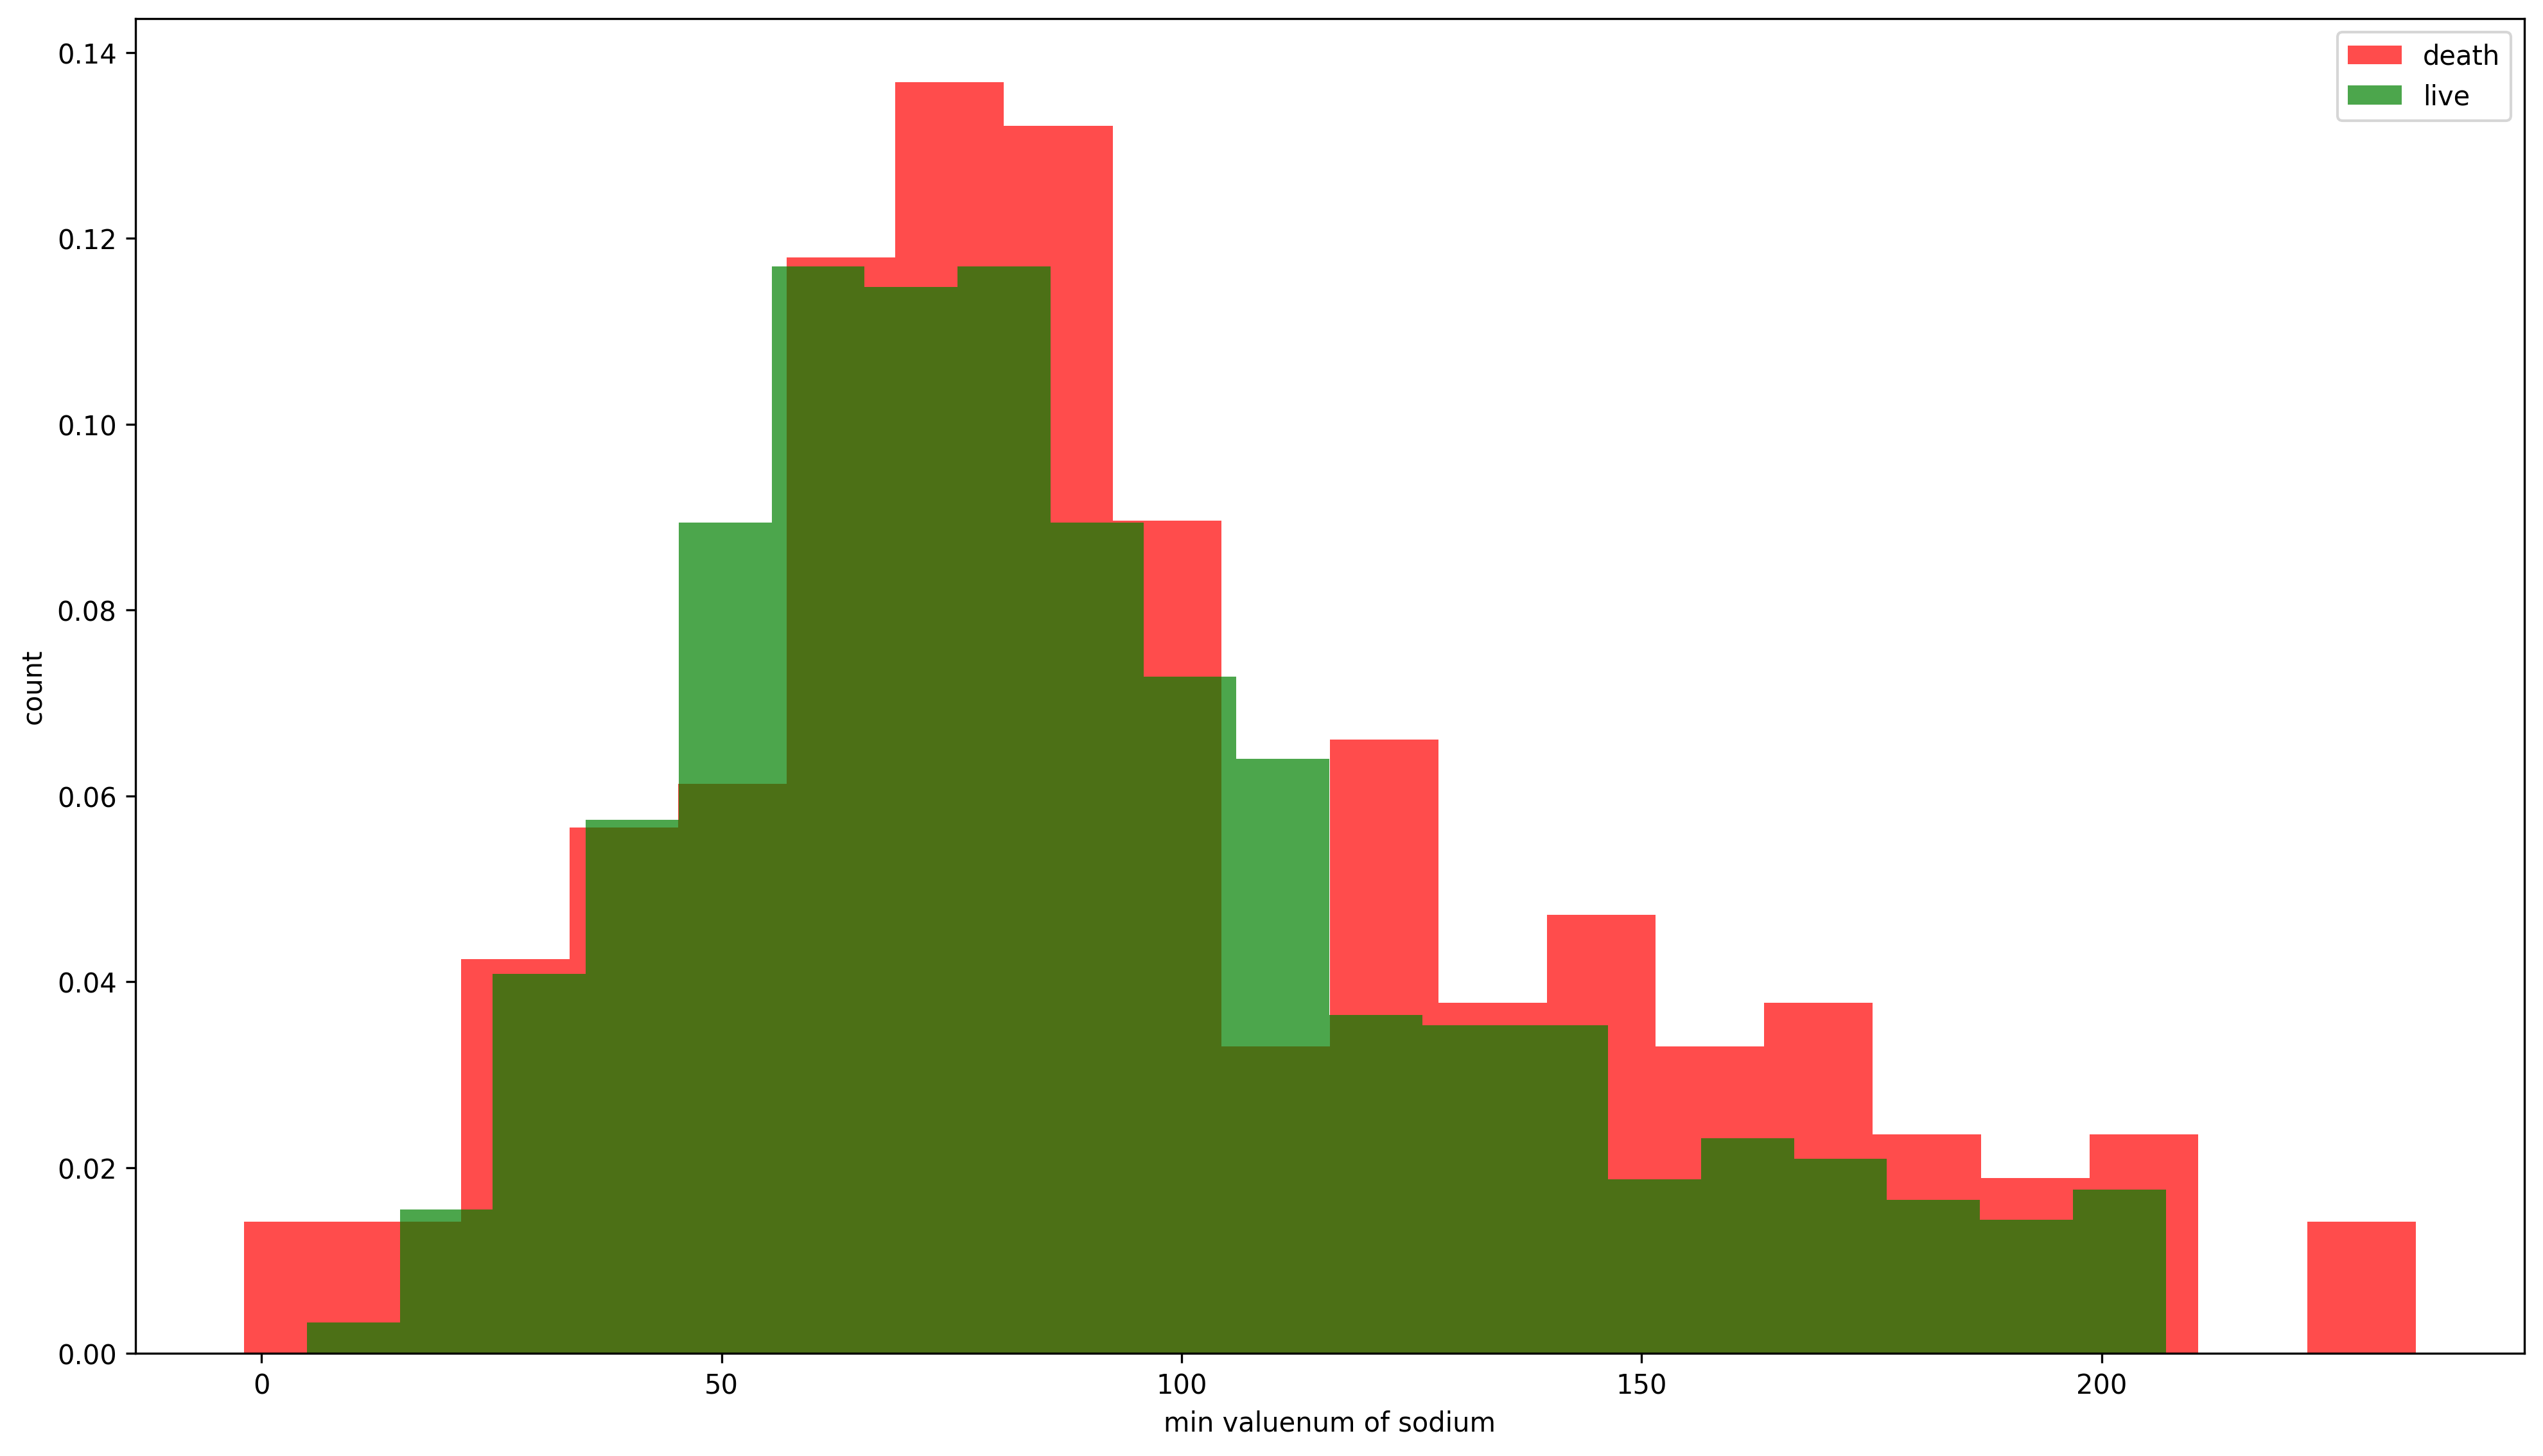

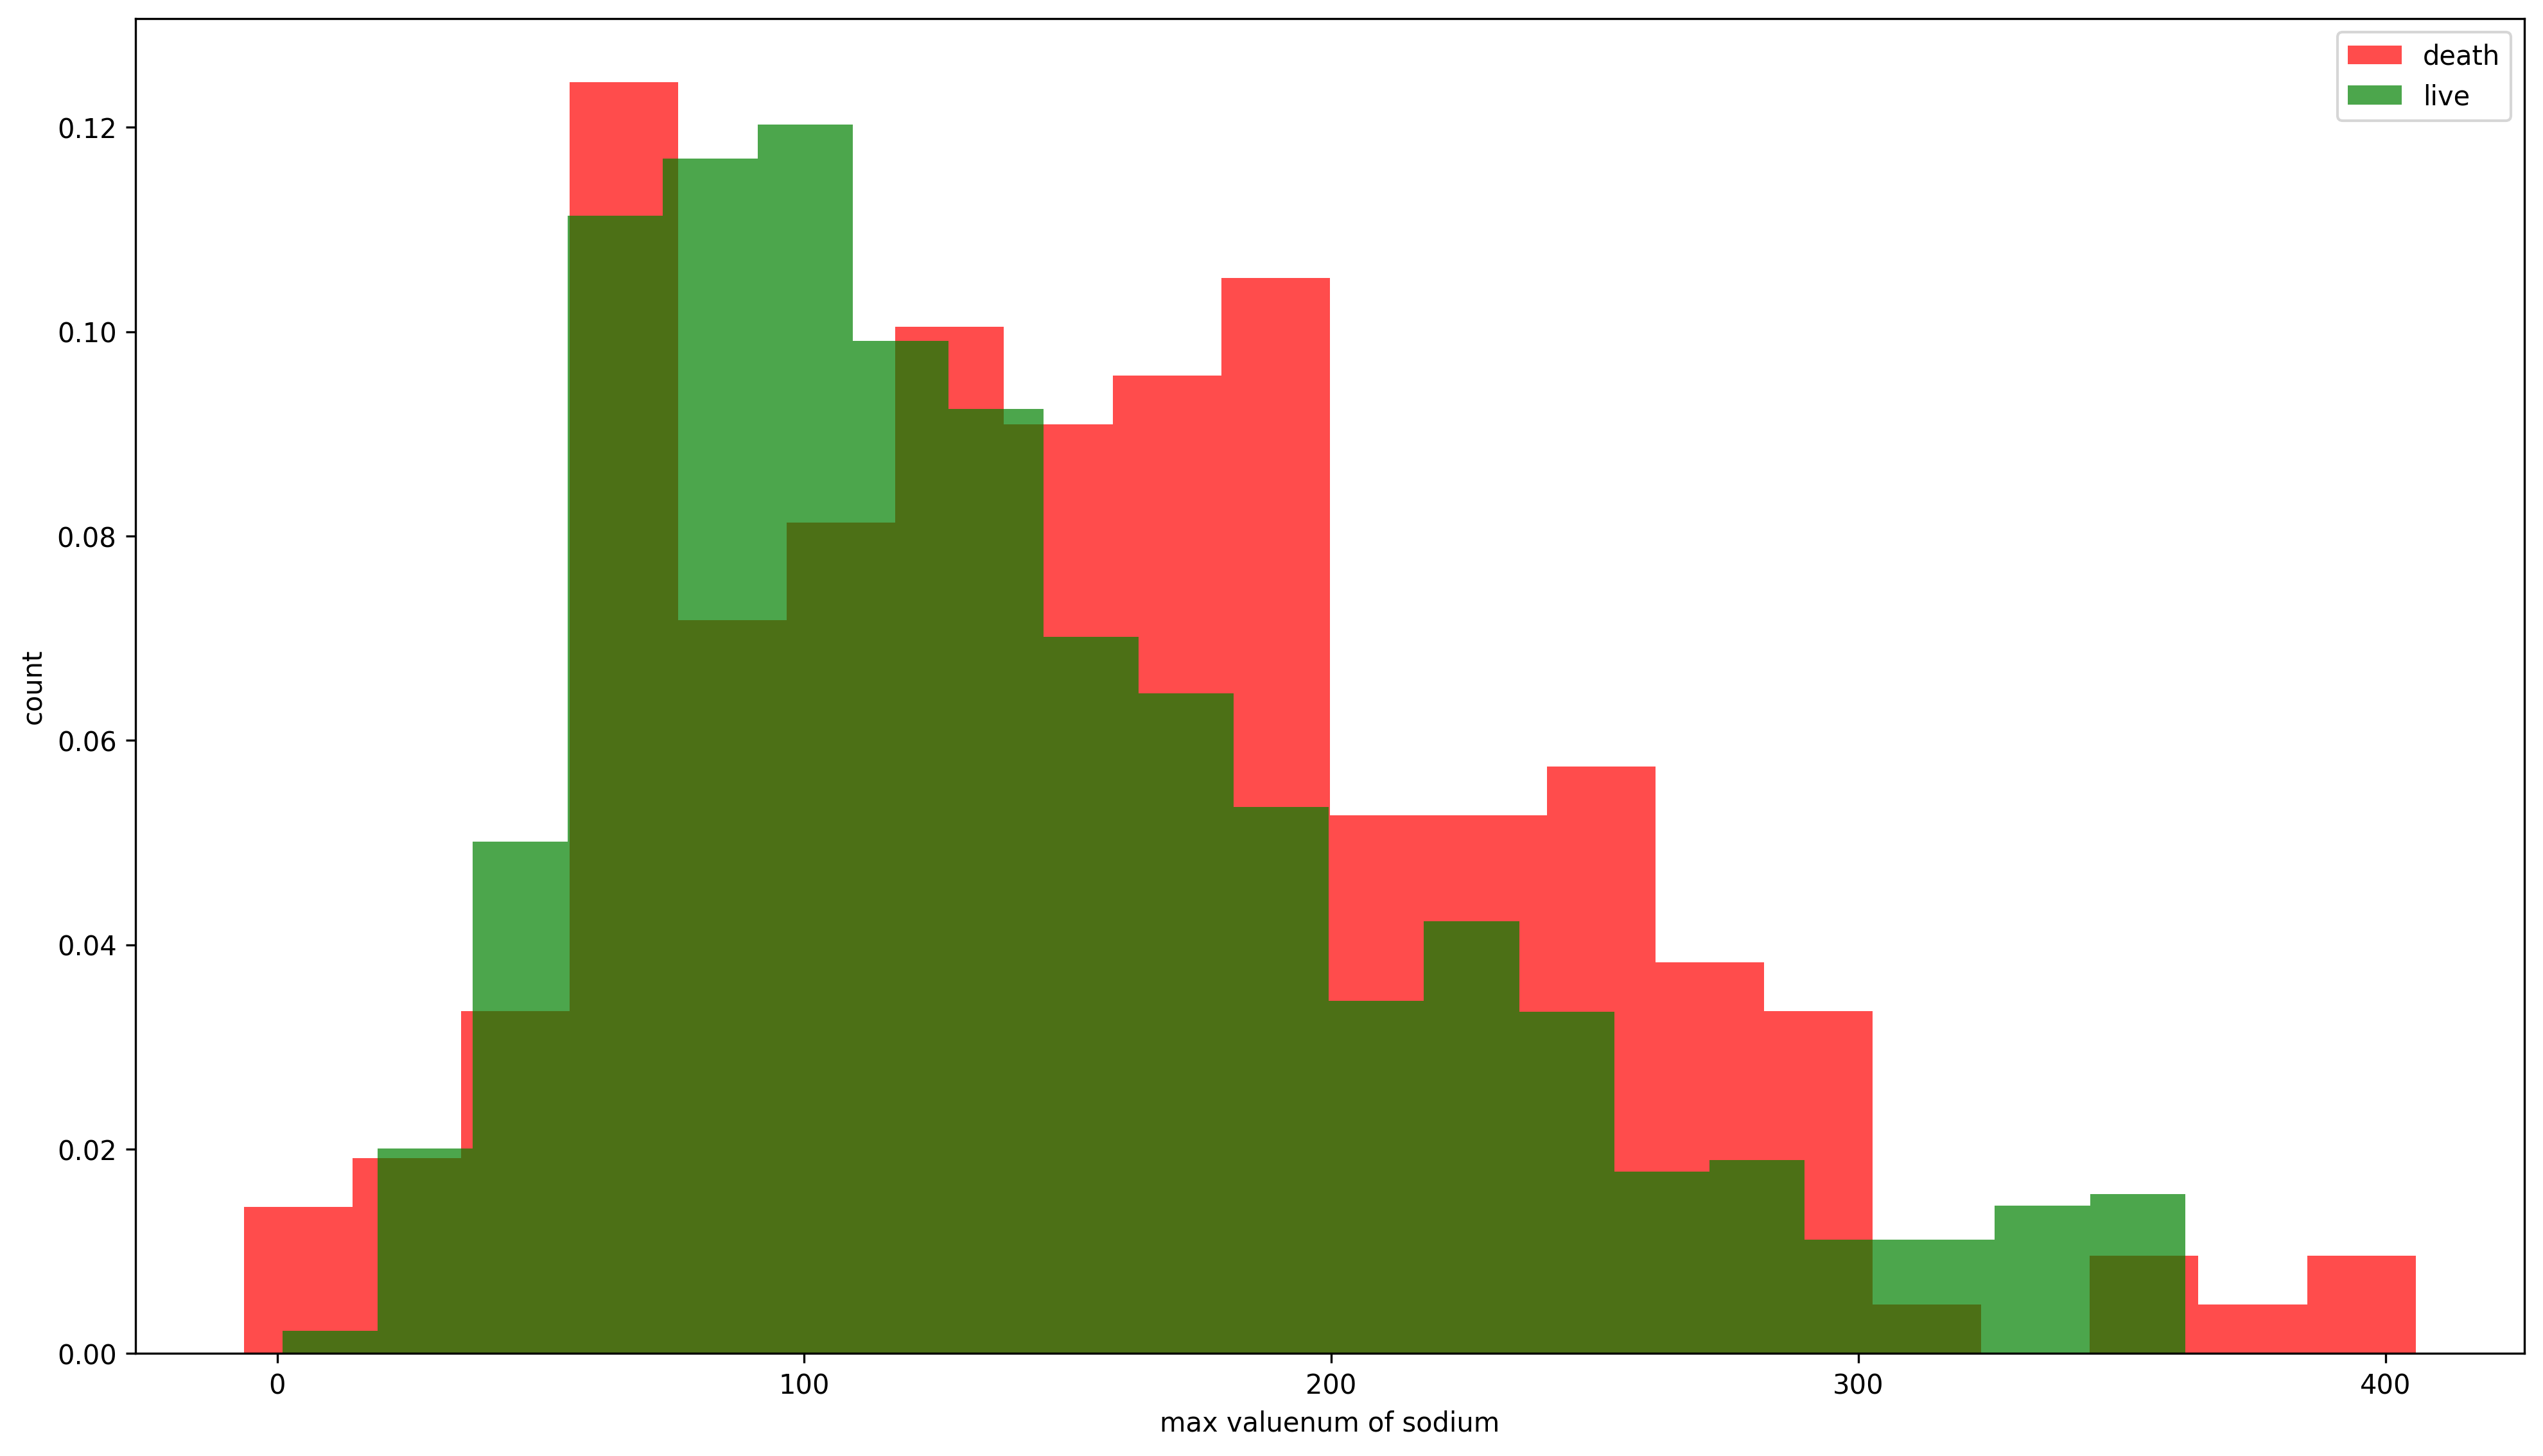

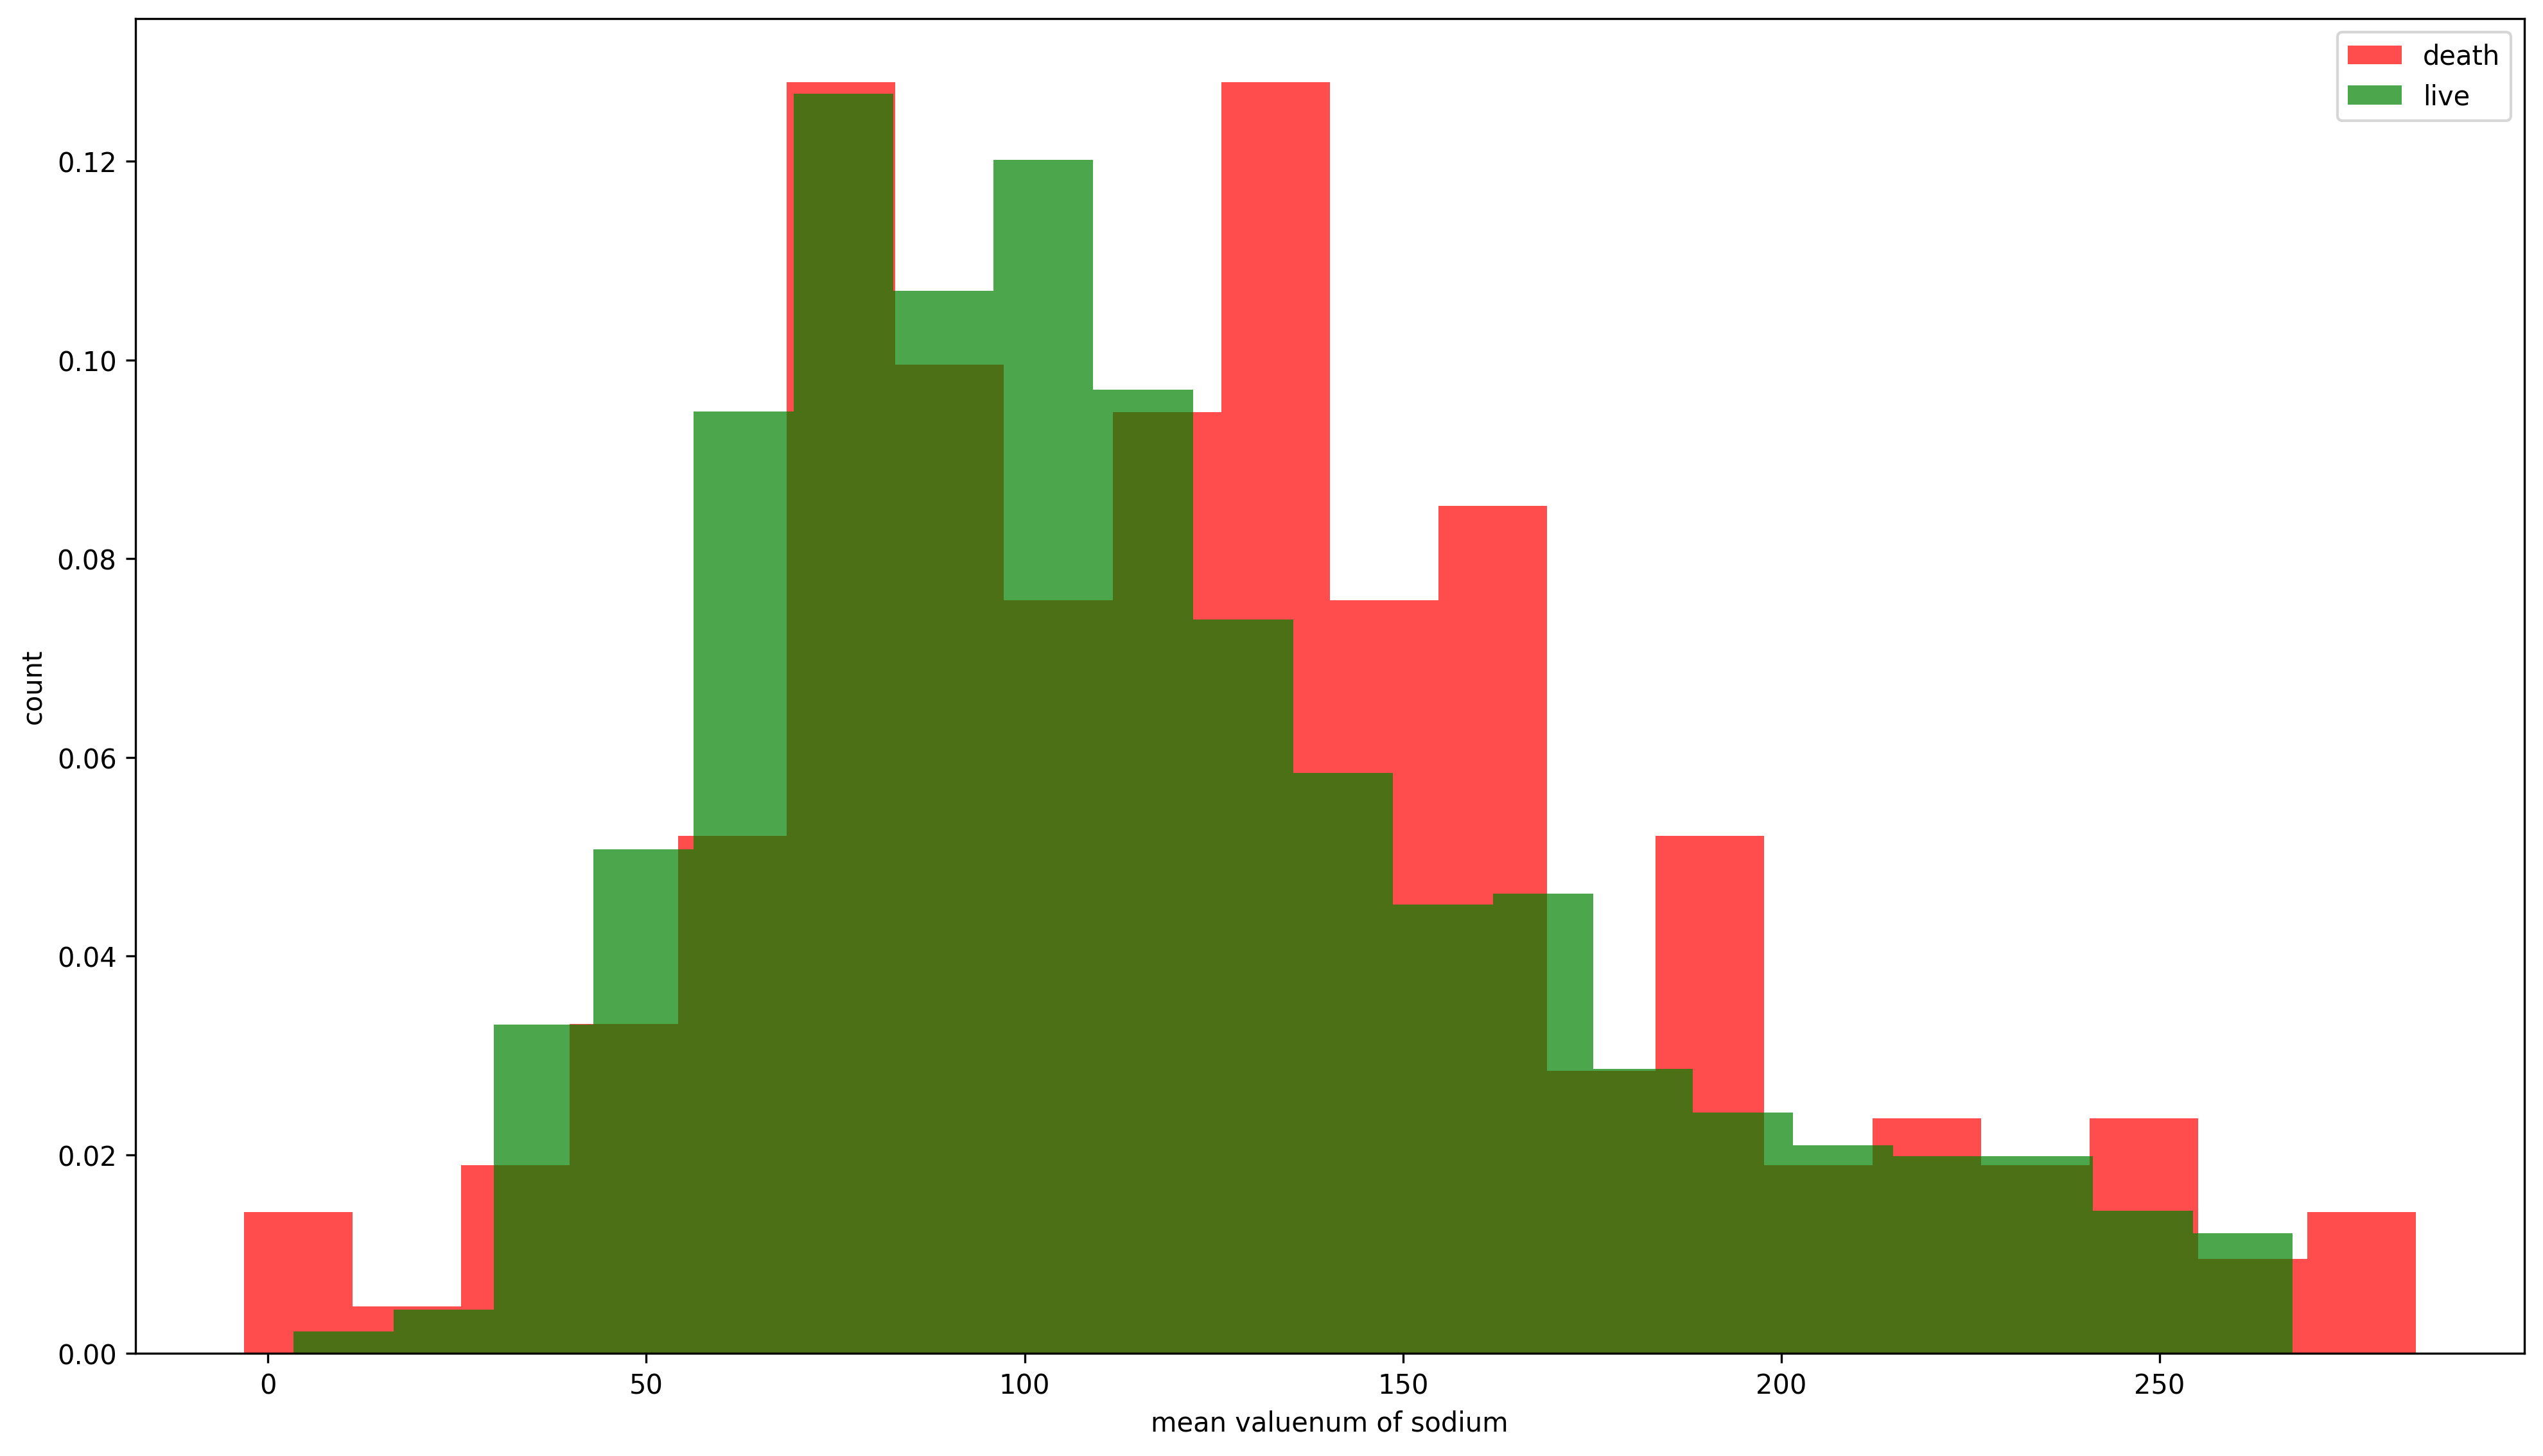

In [14]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of sodium')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# TotalCalcium_Death.csv

In [16]:
df = pd.read_csv(os.path.join(FILE_DIR, 'TotalCalcium_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  dod
0    10098672  2140-05-19 11:25:00  2140-05-19 15:08:00       9.6  NaN
1    10098672  2140-11-14 12:48:00  2140-11-14 13:58:00       9.6  NaN
2    10098672  2142-05-15 17:18:00  2142-05-15 17:55:00       9.4  NaN
3    10098672  2142-05-17 06:45:00  2142-05-17 08:16:00       8.5  NaN
4    10098672  2142-05-17 08:00:00  2142-05-17 09:59:00       9.0  NaN

In [17]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum             dod
                mean  min  max count
subject_id                          
10001186    8.733333  8.1  9.1     0
10007174    8.700000  8.4  9.0     0
10018852    8.177778  7.7  9.2     0
10024331    8.650000  7.8  9.4   100
10025647    8.497143  8.0  9.2    70

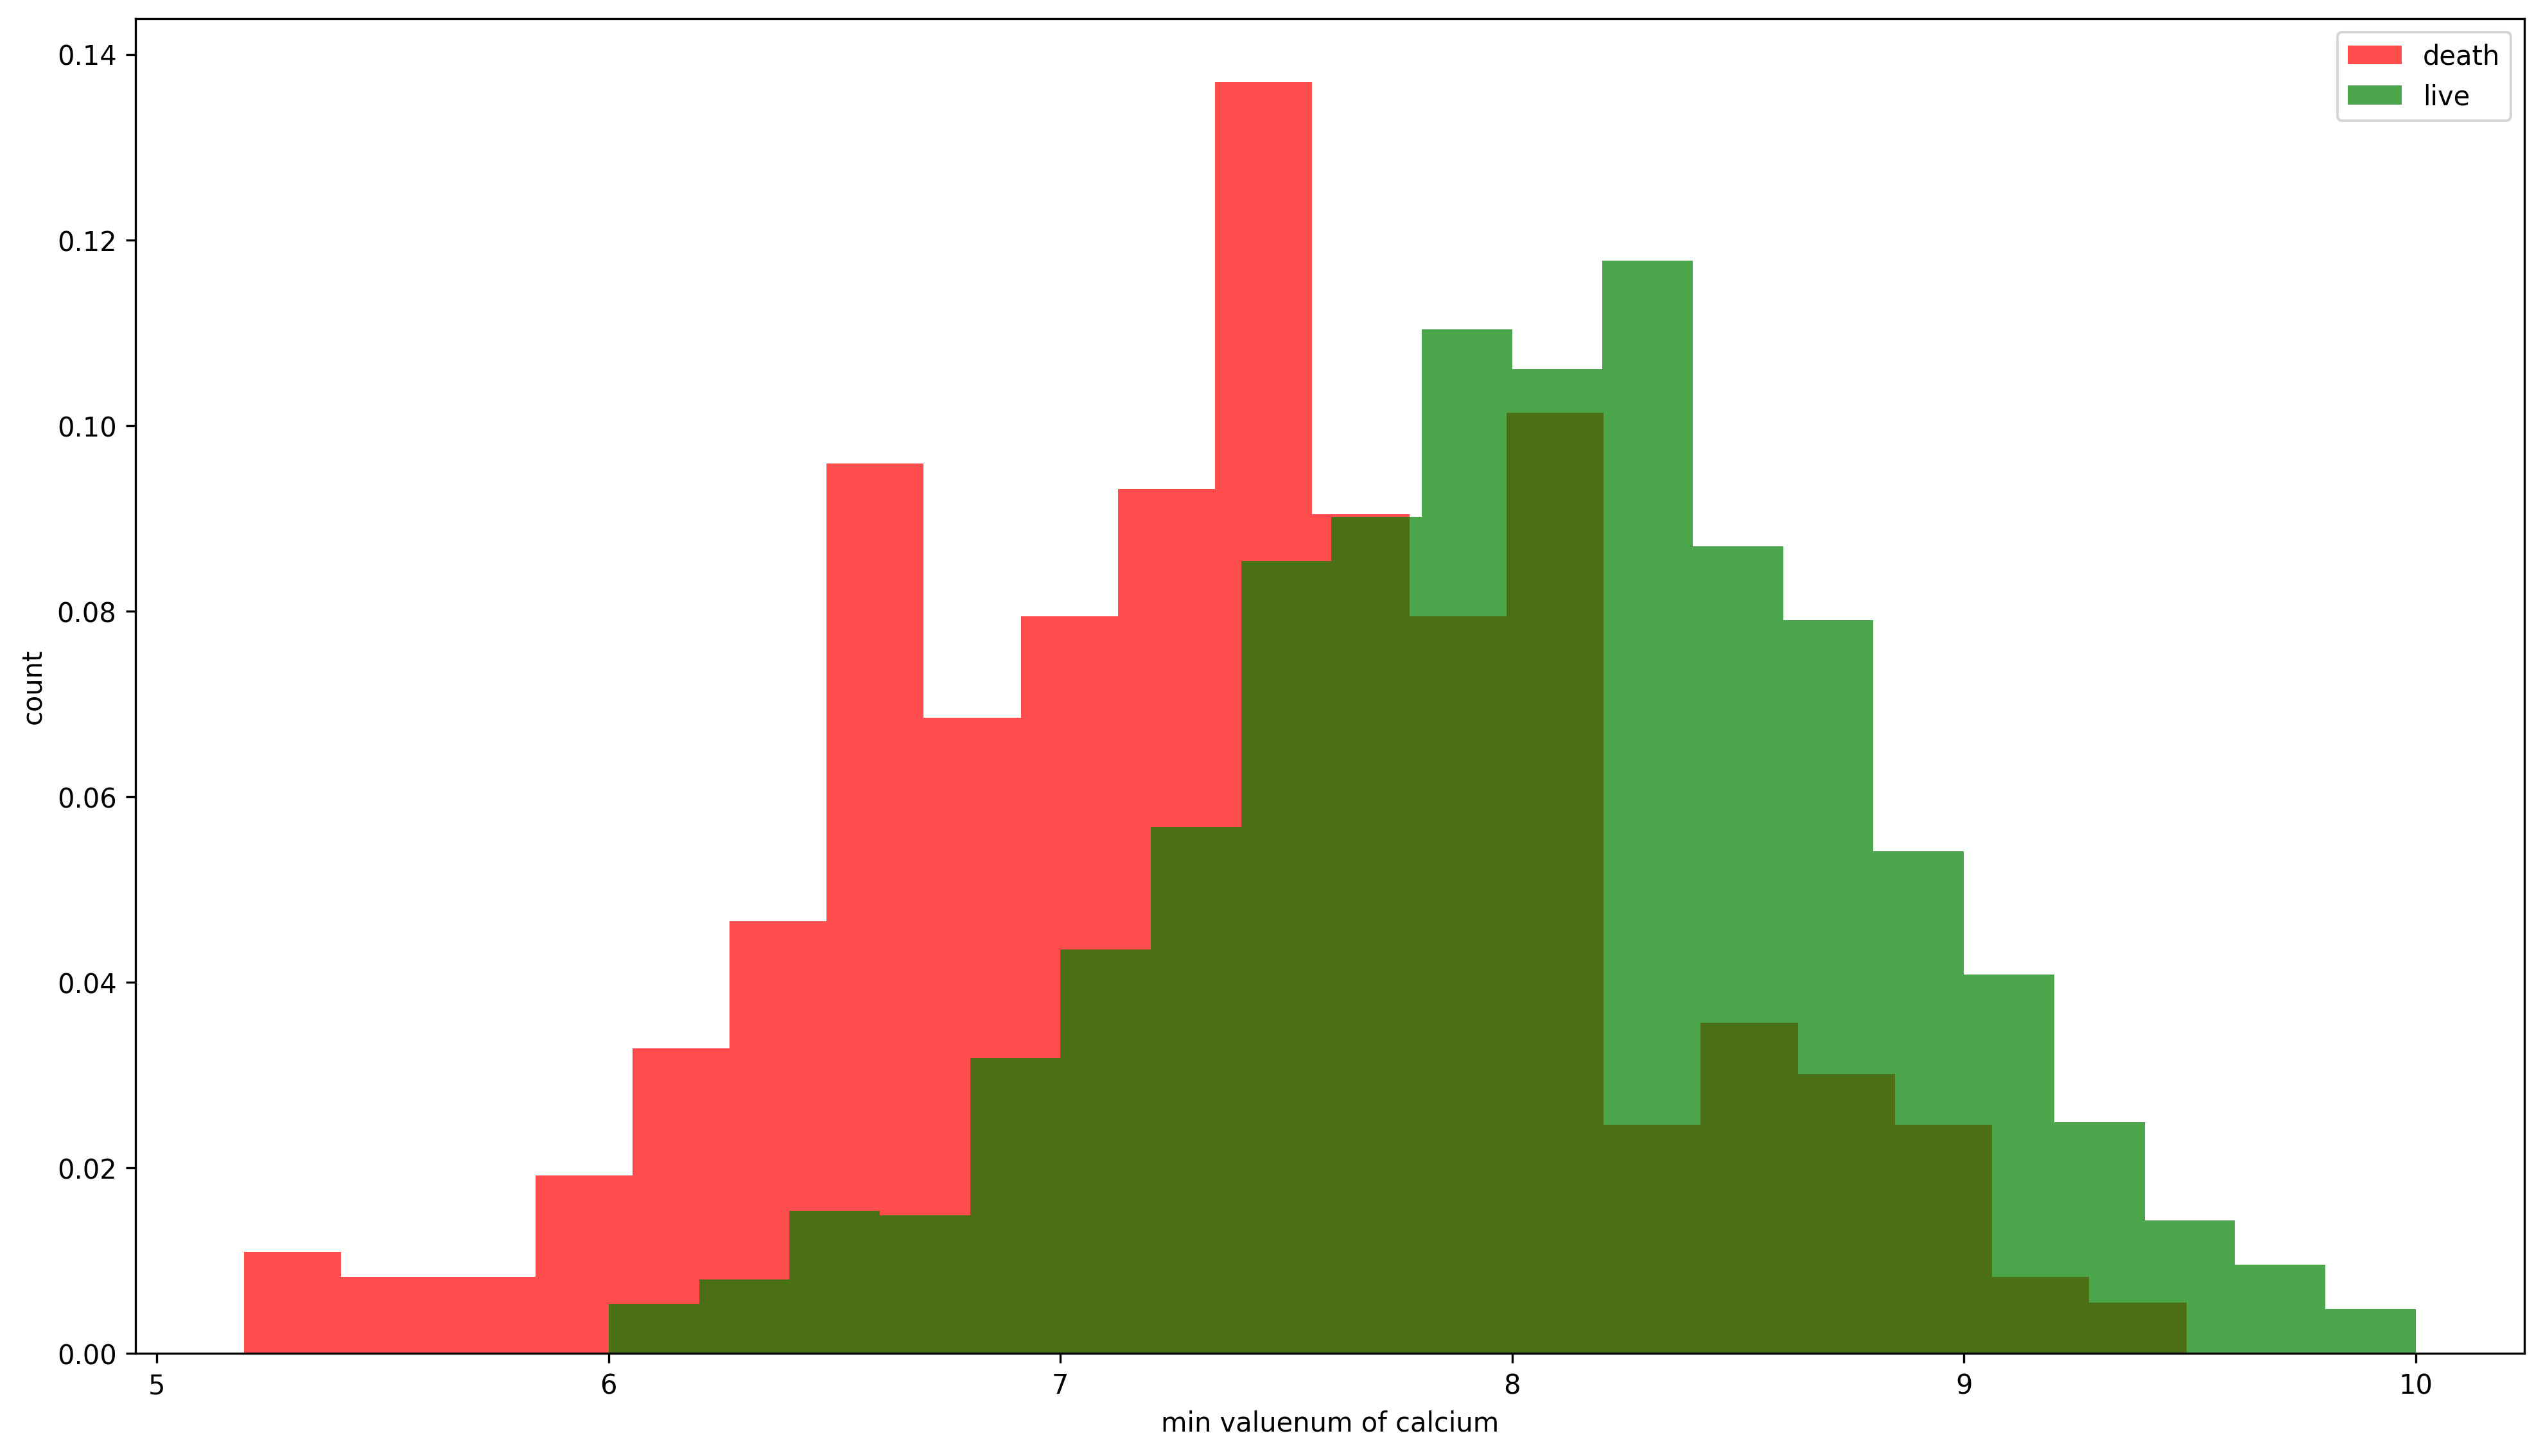

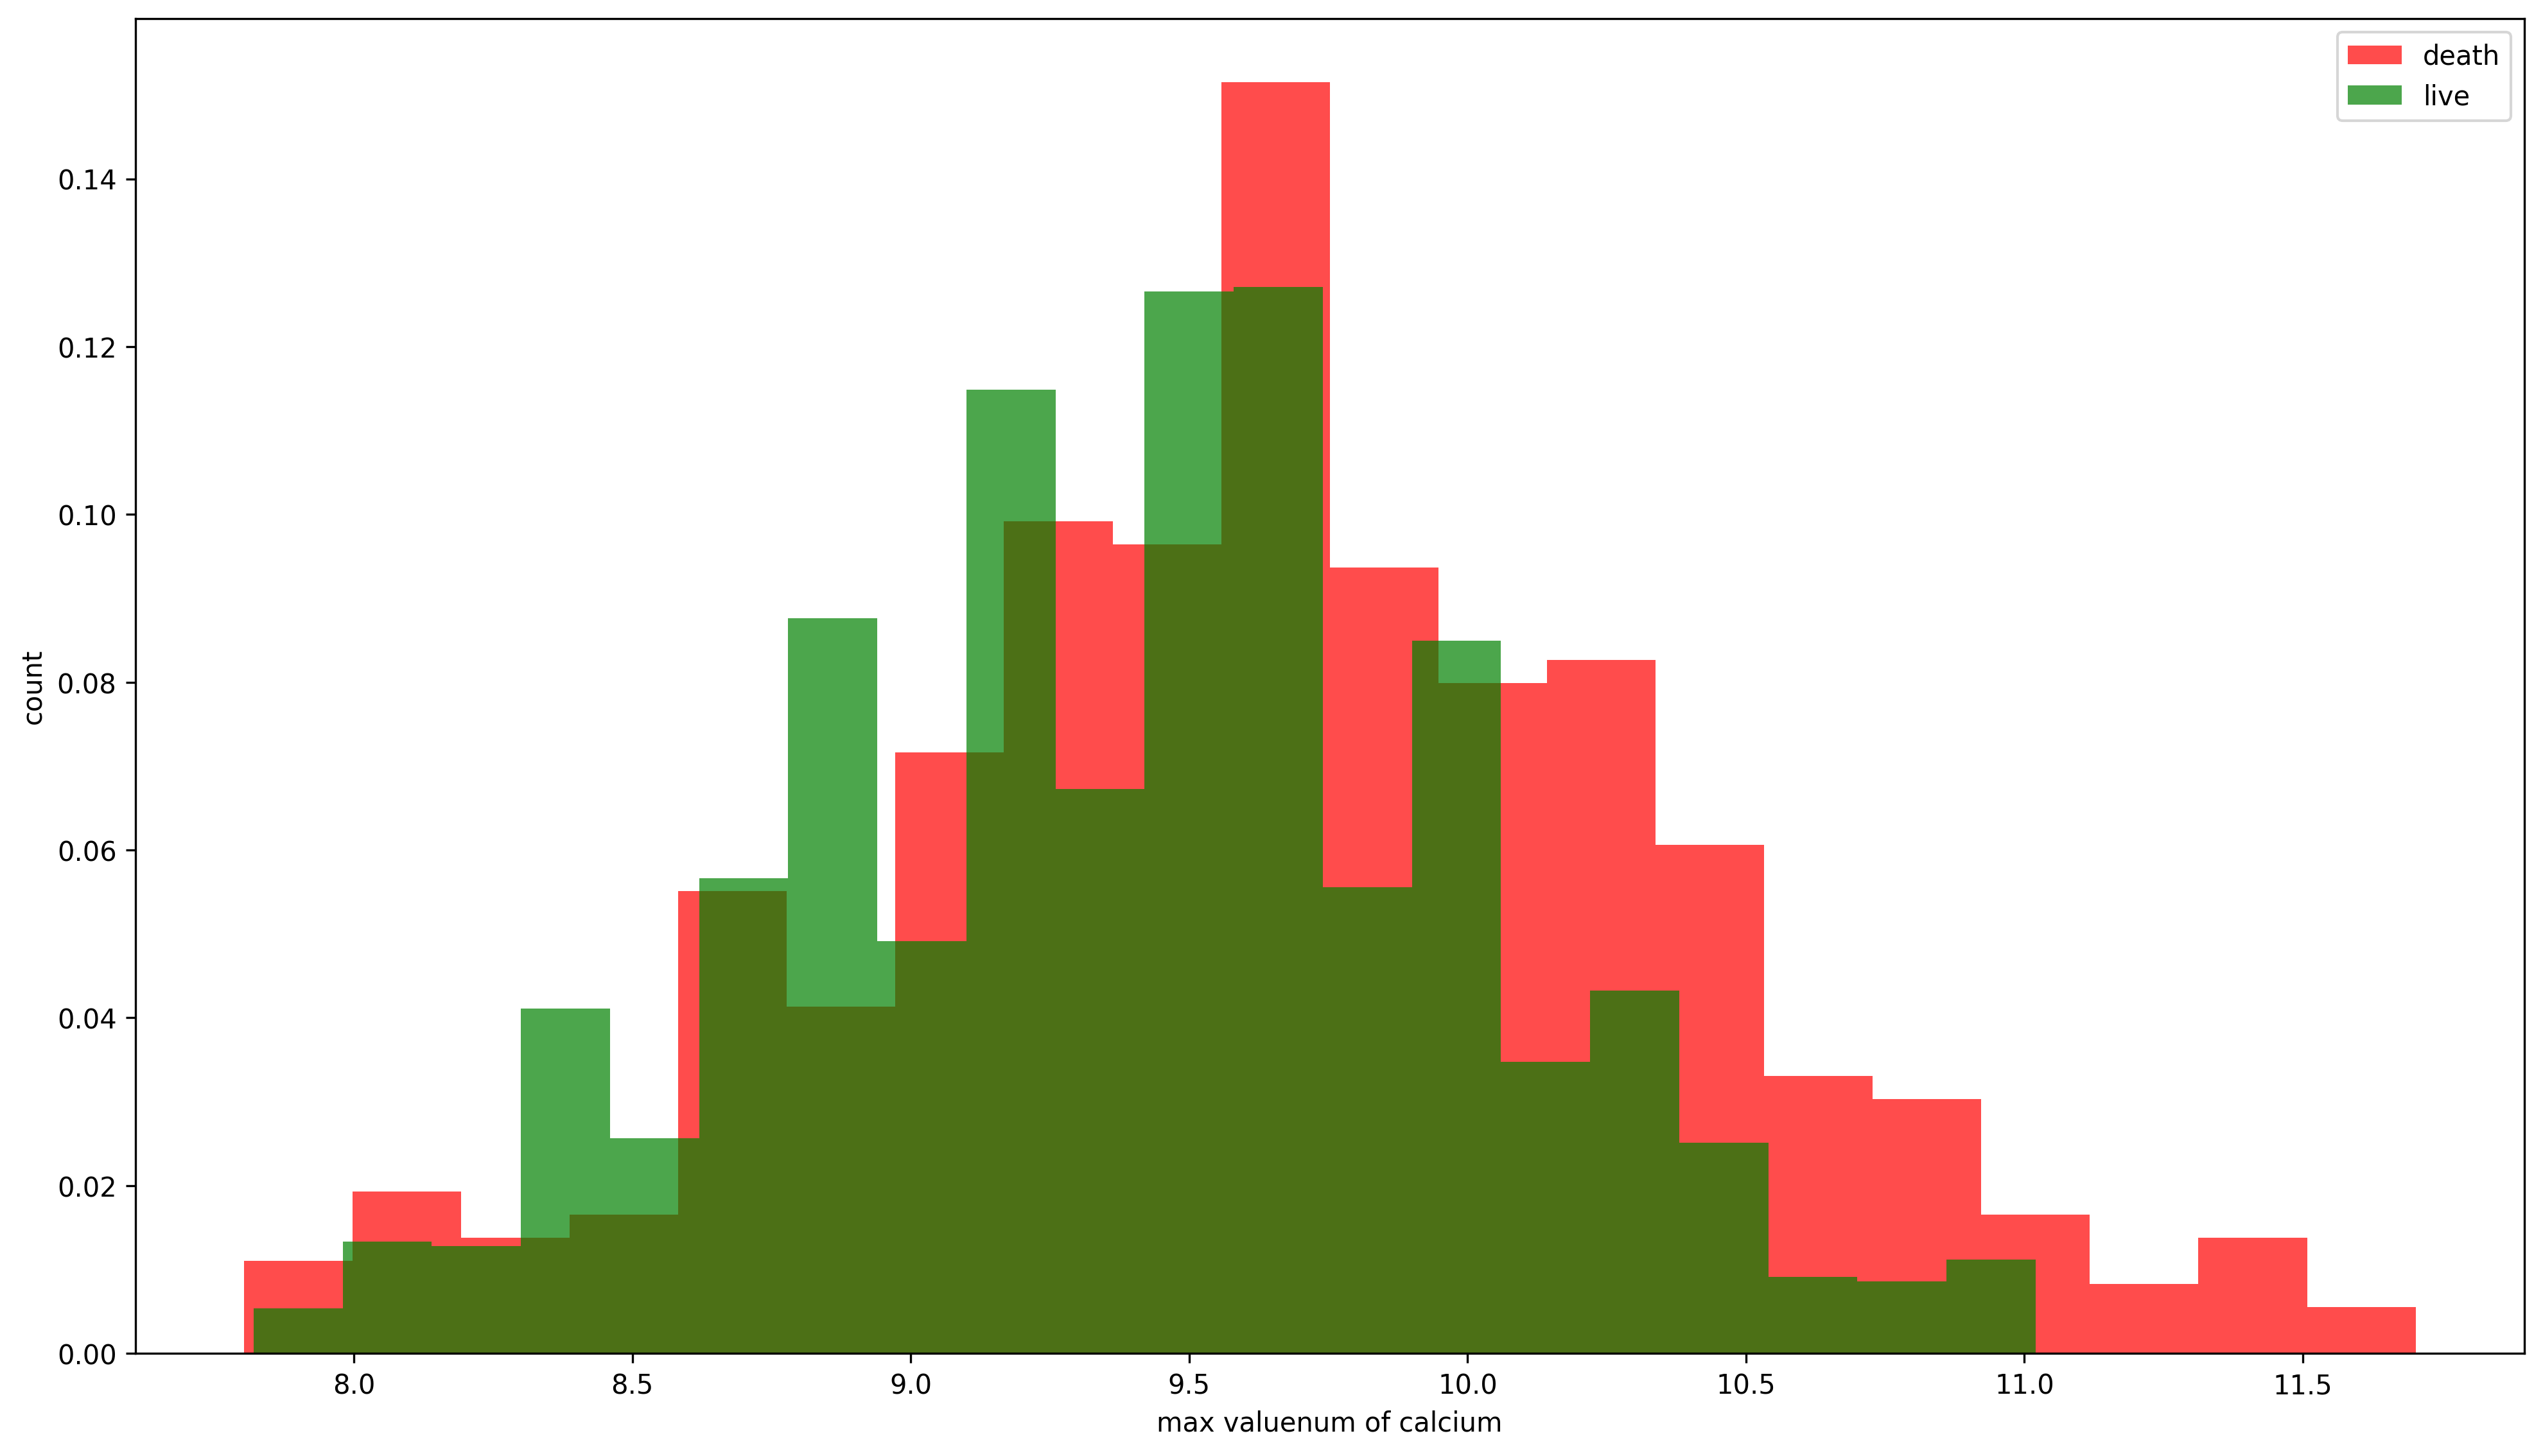

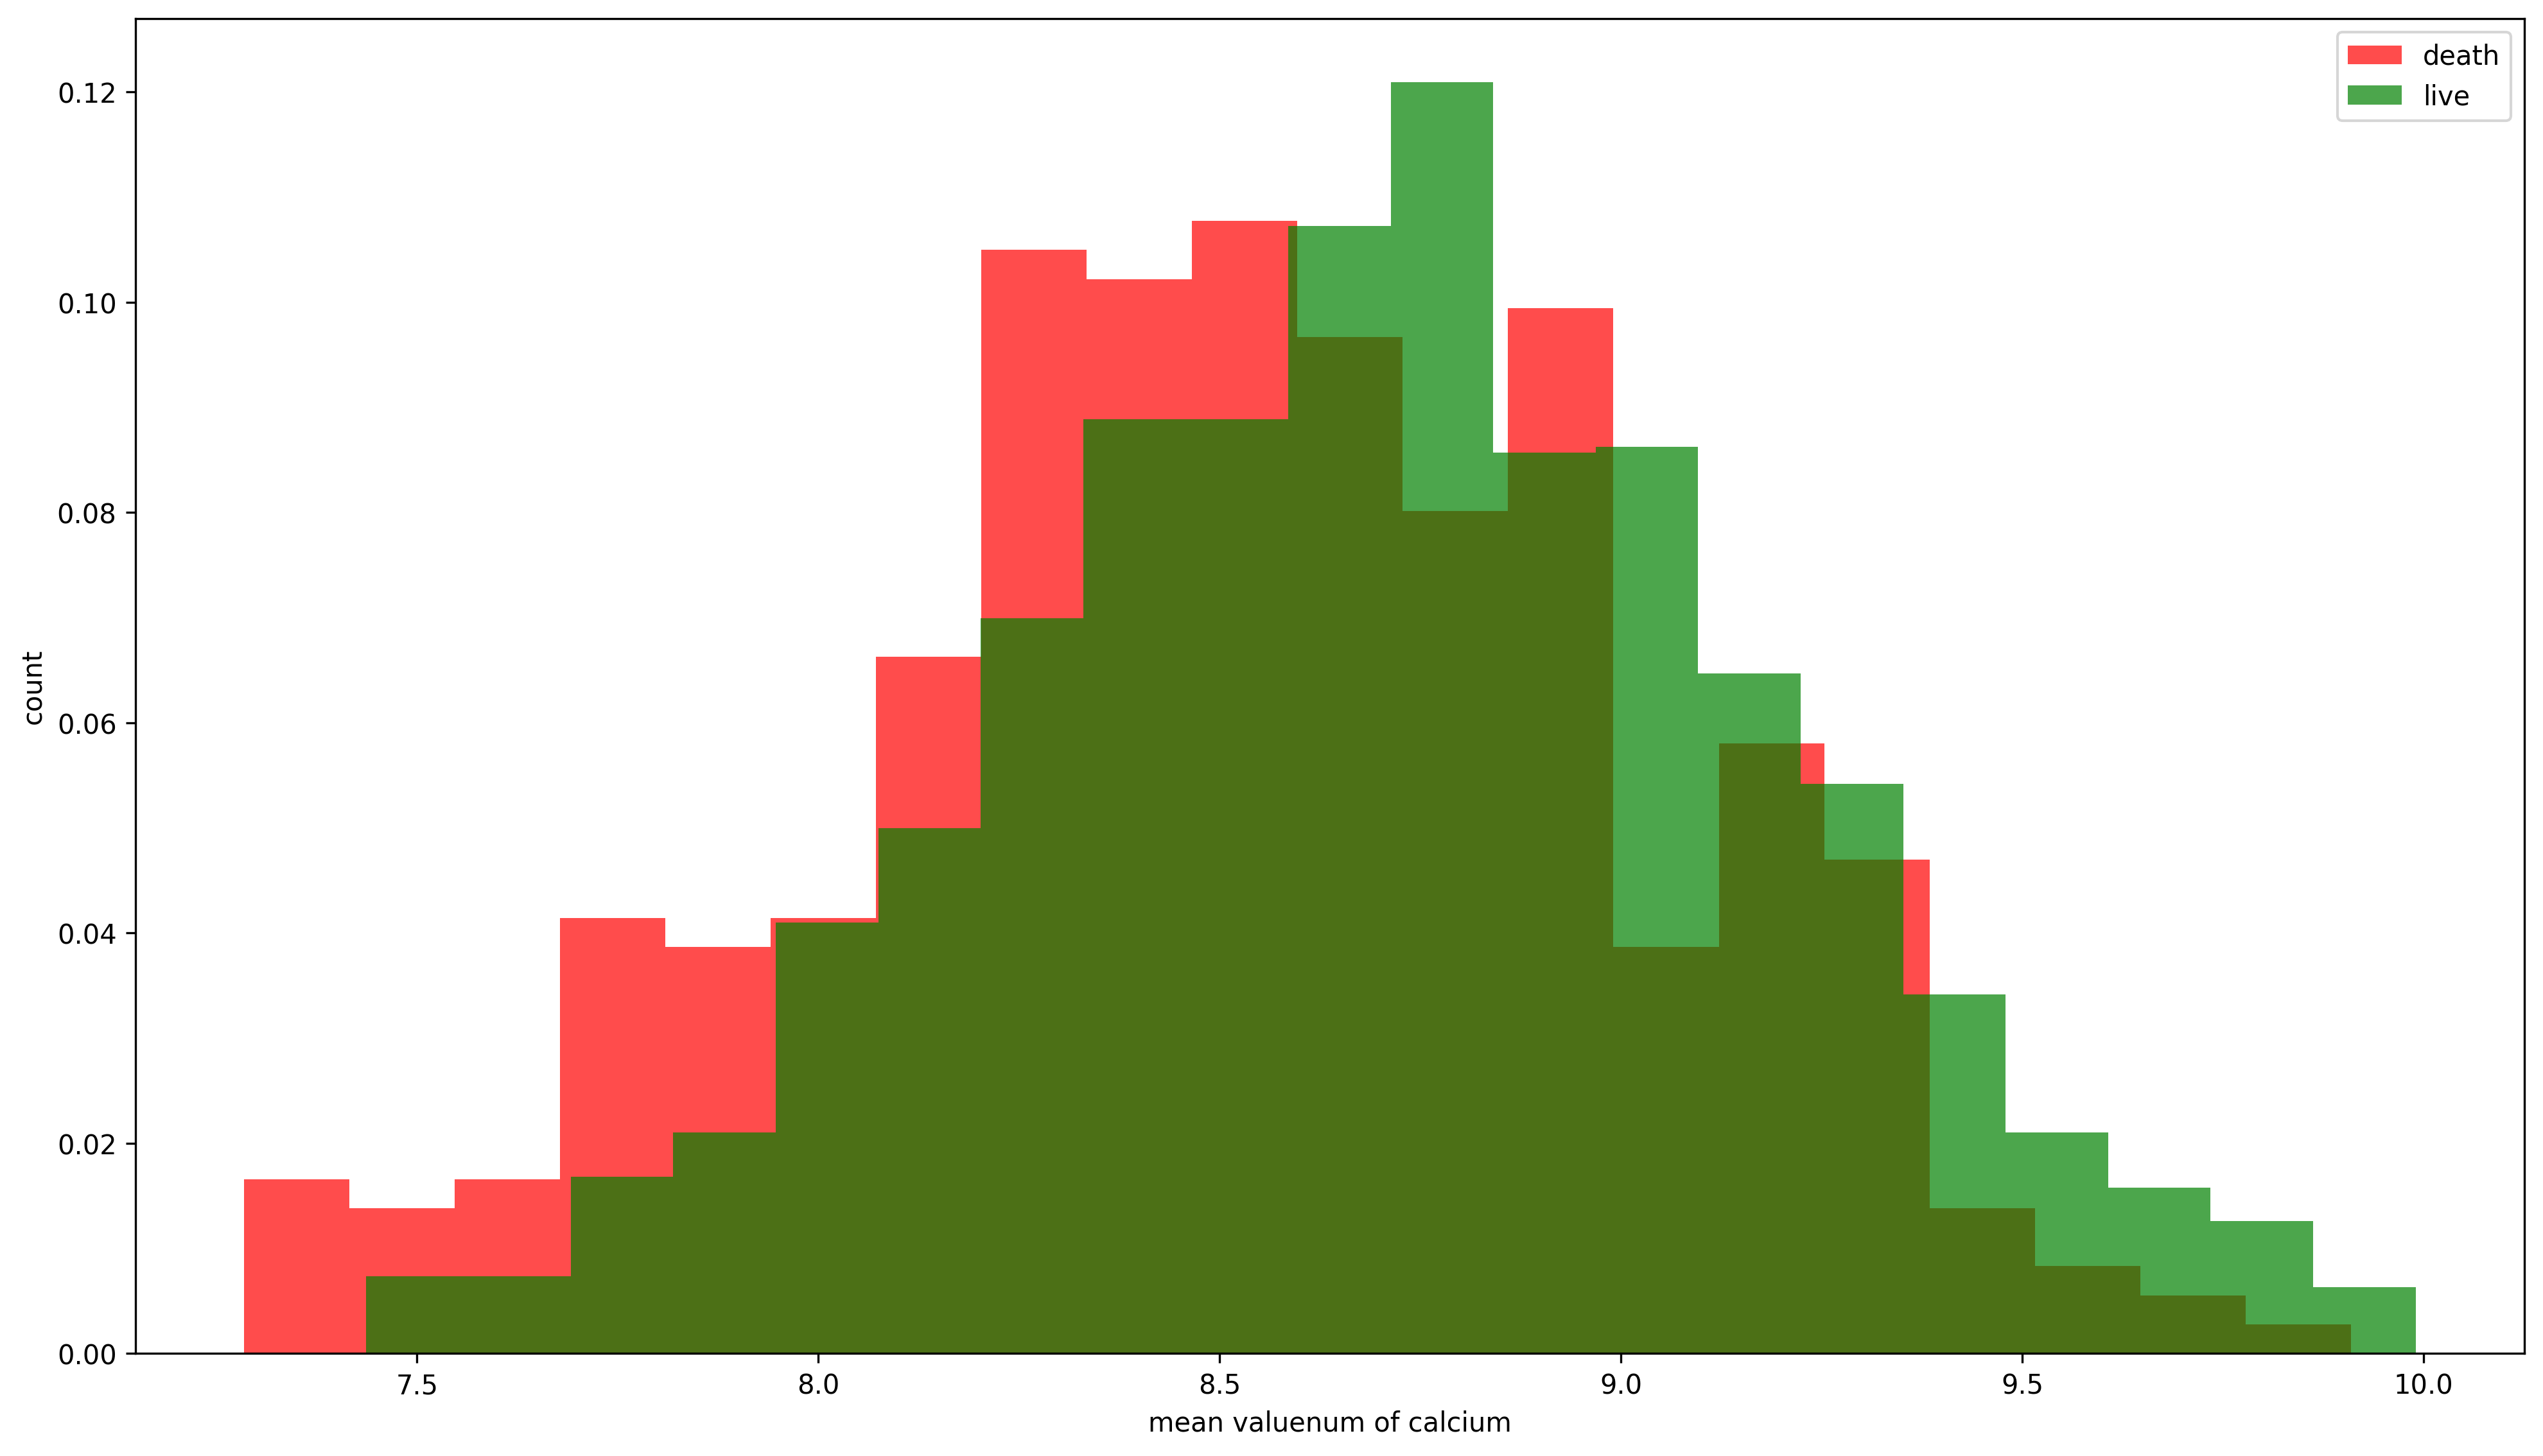

In [19]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of calcium')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# TotalBilirubin_Death.csv

In [20]:
df = pd.read_csv(os.path.join(FILE_DIR, 'TotalBilirubin_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  \
0    10098672  2140-05-19 11:25:00  2140-05-19 15:08:00       0.3   
1    10098672  2140-11-14 12:48:00  2140-11-14 13:58:00       0.2   
2    10098672  2142-01-20 21:00:00  2142-01-21 00:05:00       0.2   
3    10098672  2142-05-15 17:18:00  2142-05-15 17:55:00       0.5   
4    10098672  2141-04-14 07:55:00  2141-04-14 09:42:00       0.6   

              label  dod  
0  Bilirubin, Total  NaN  
1  Bilirubin, Total  NaN  
2  Bilirubin, Total  NaN  
3  Bilirubin, Total  NaN  
4  Bilirubin, Total  NaN

In [21]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum             dod
                mean  min  max count
subject_id                          
10007174    0.300000  0.3  0.3     0
10018852    0.500000  0.3  0.7     0
10024331    0.721739  0.3  1.9    92
10025647    0.720000  0.5  1.0    20
10027957    0.227778  0.1  0.4     0

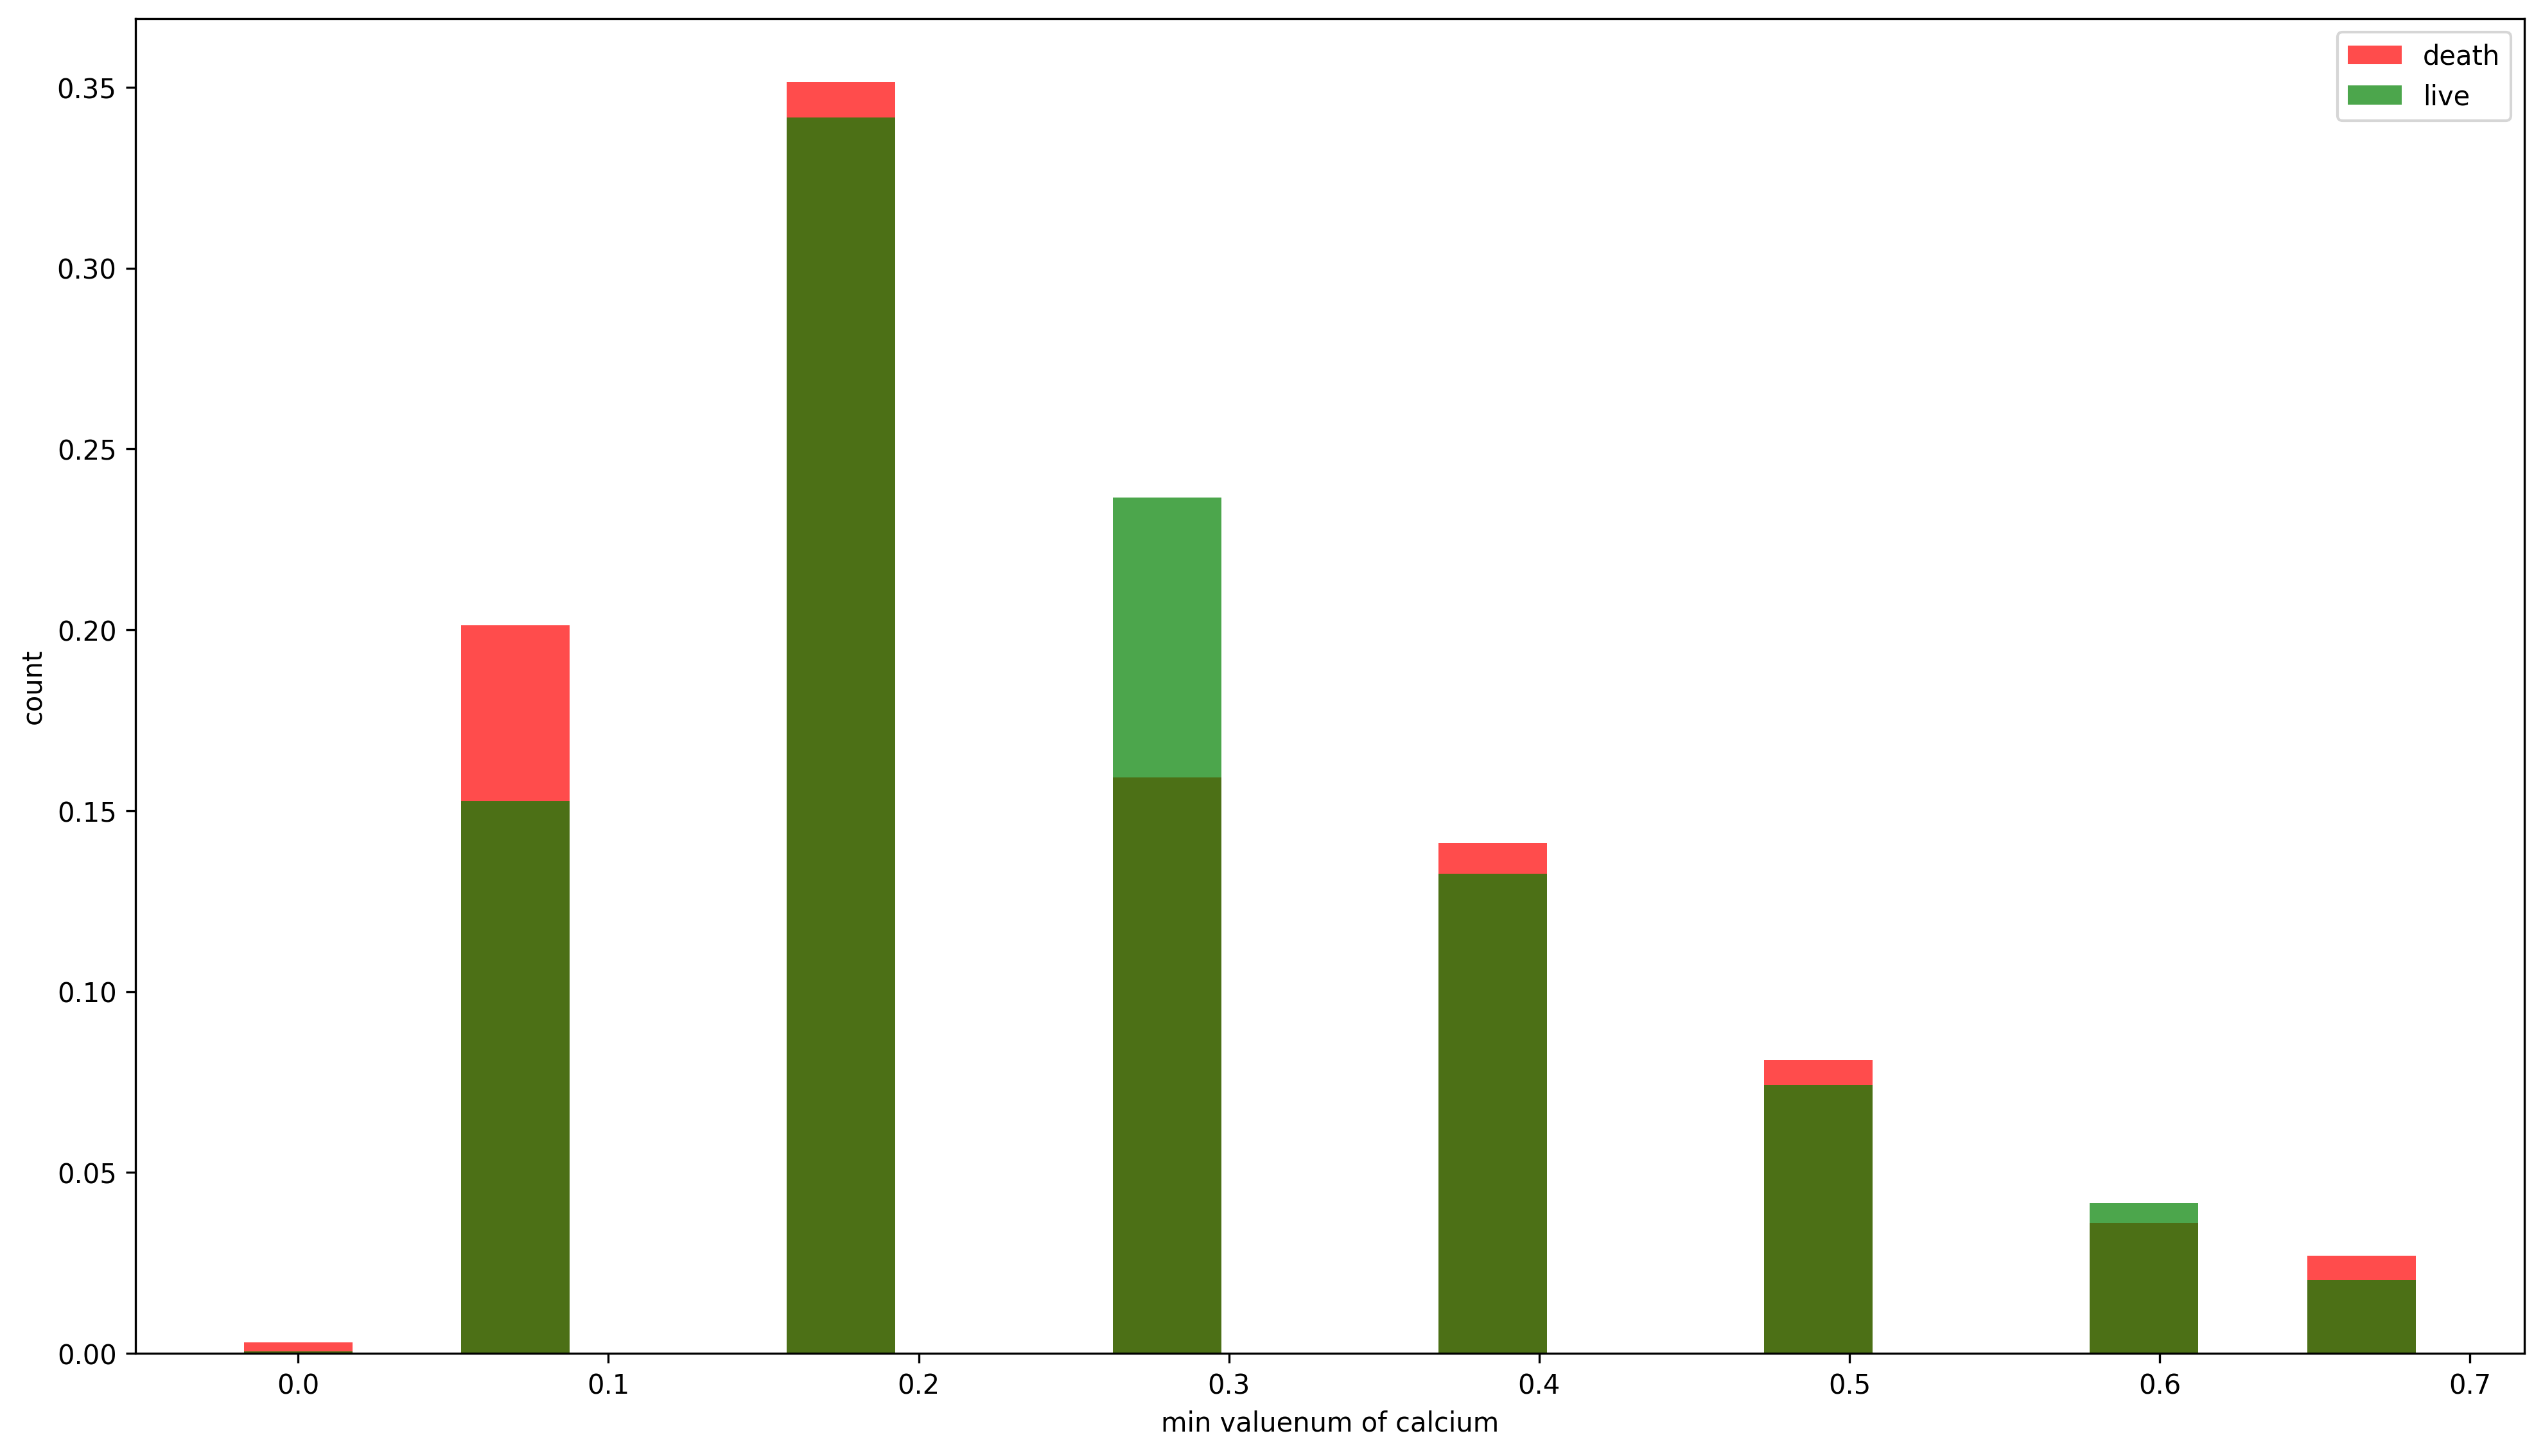

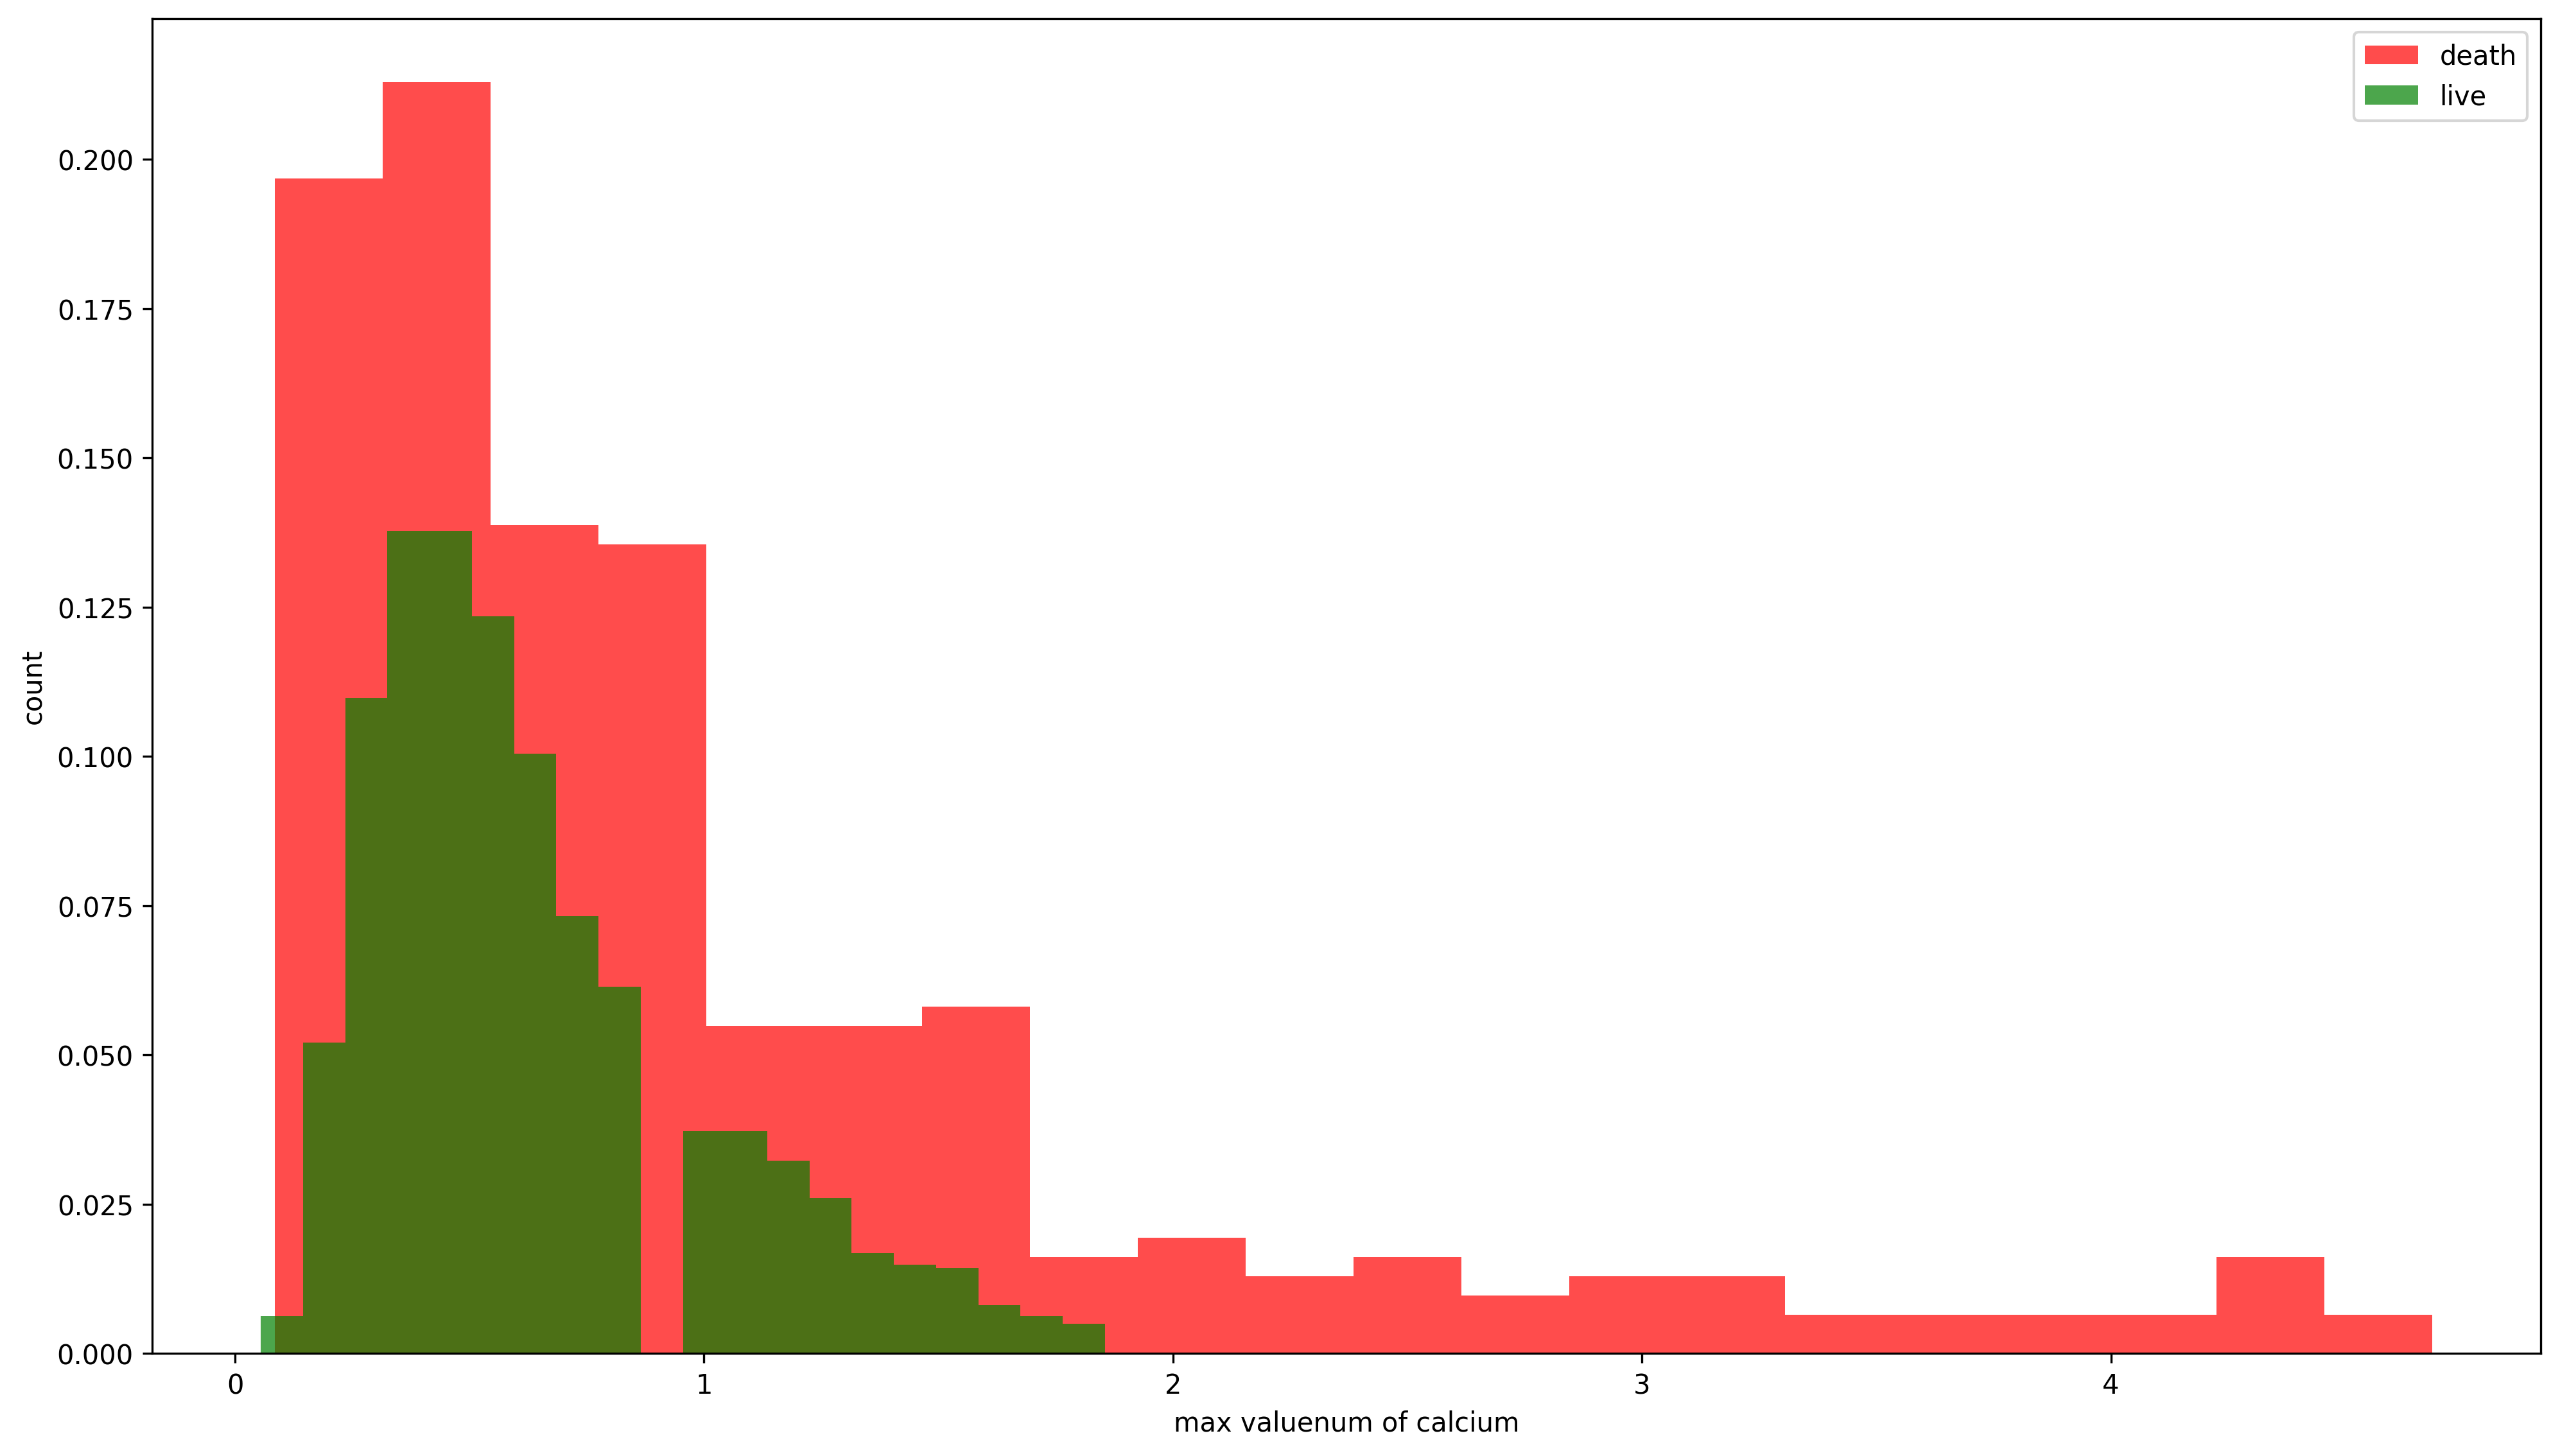

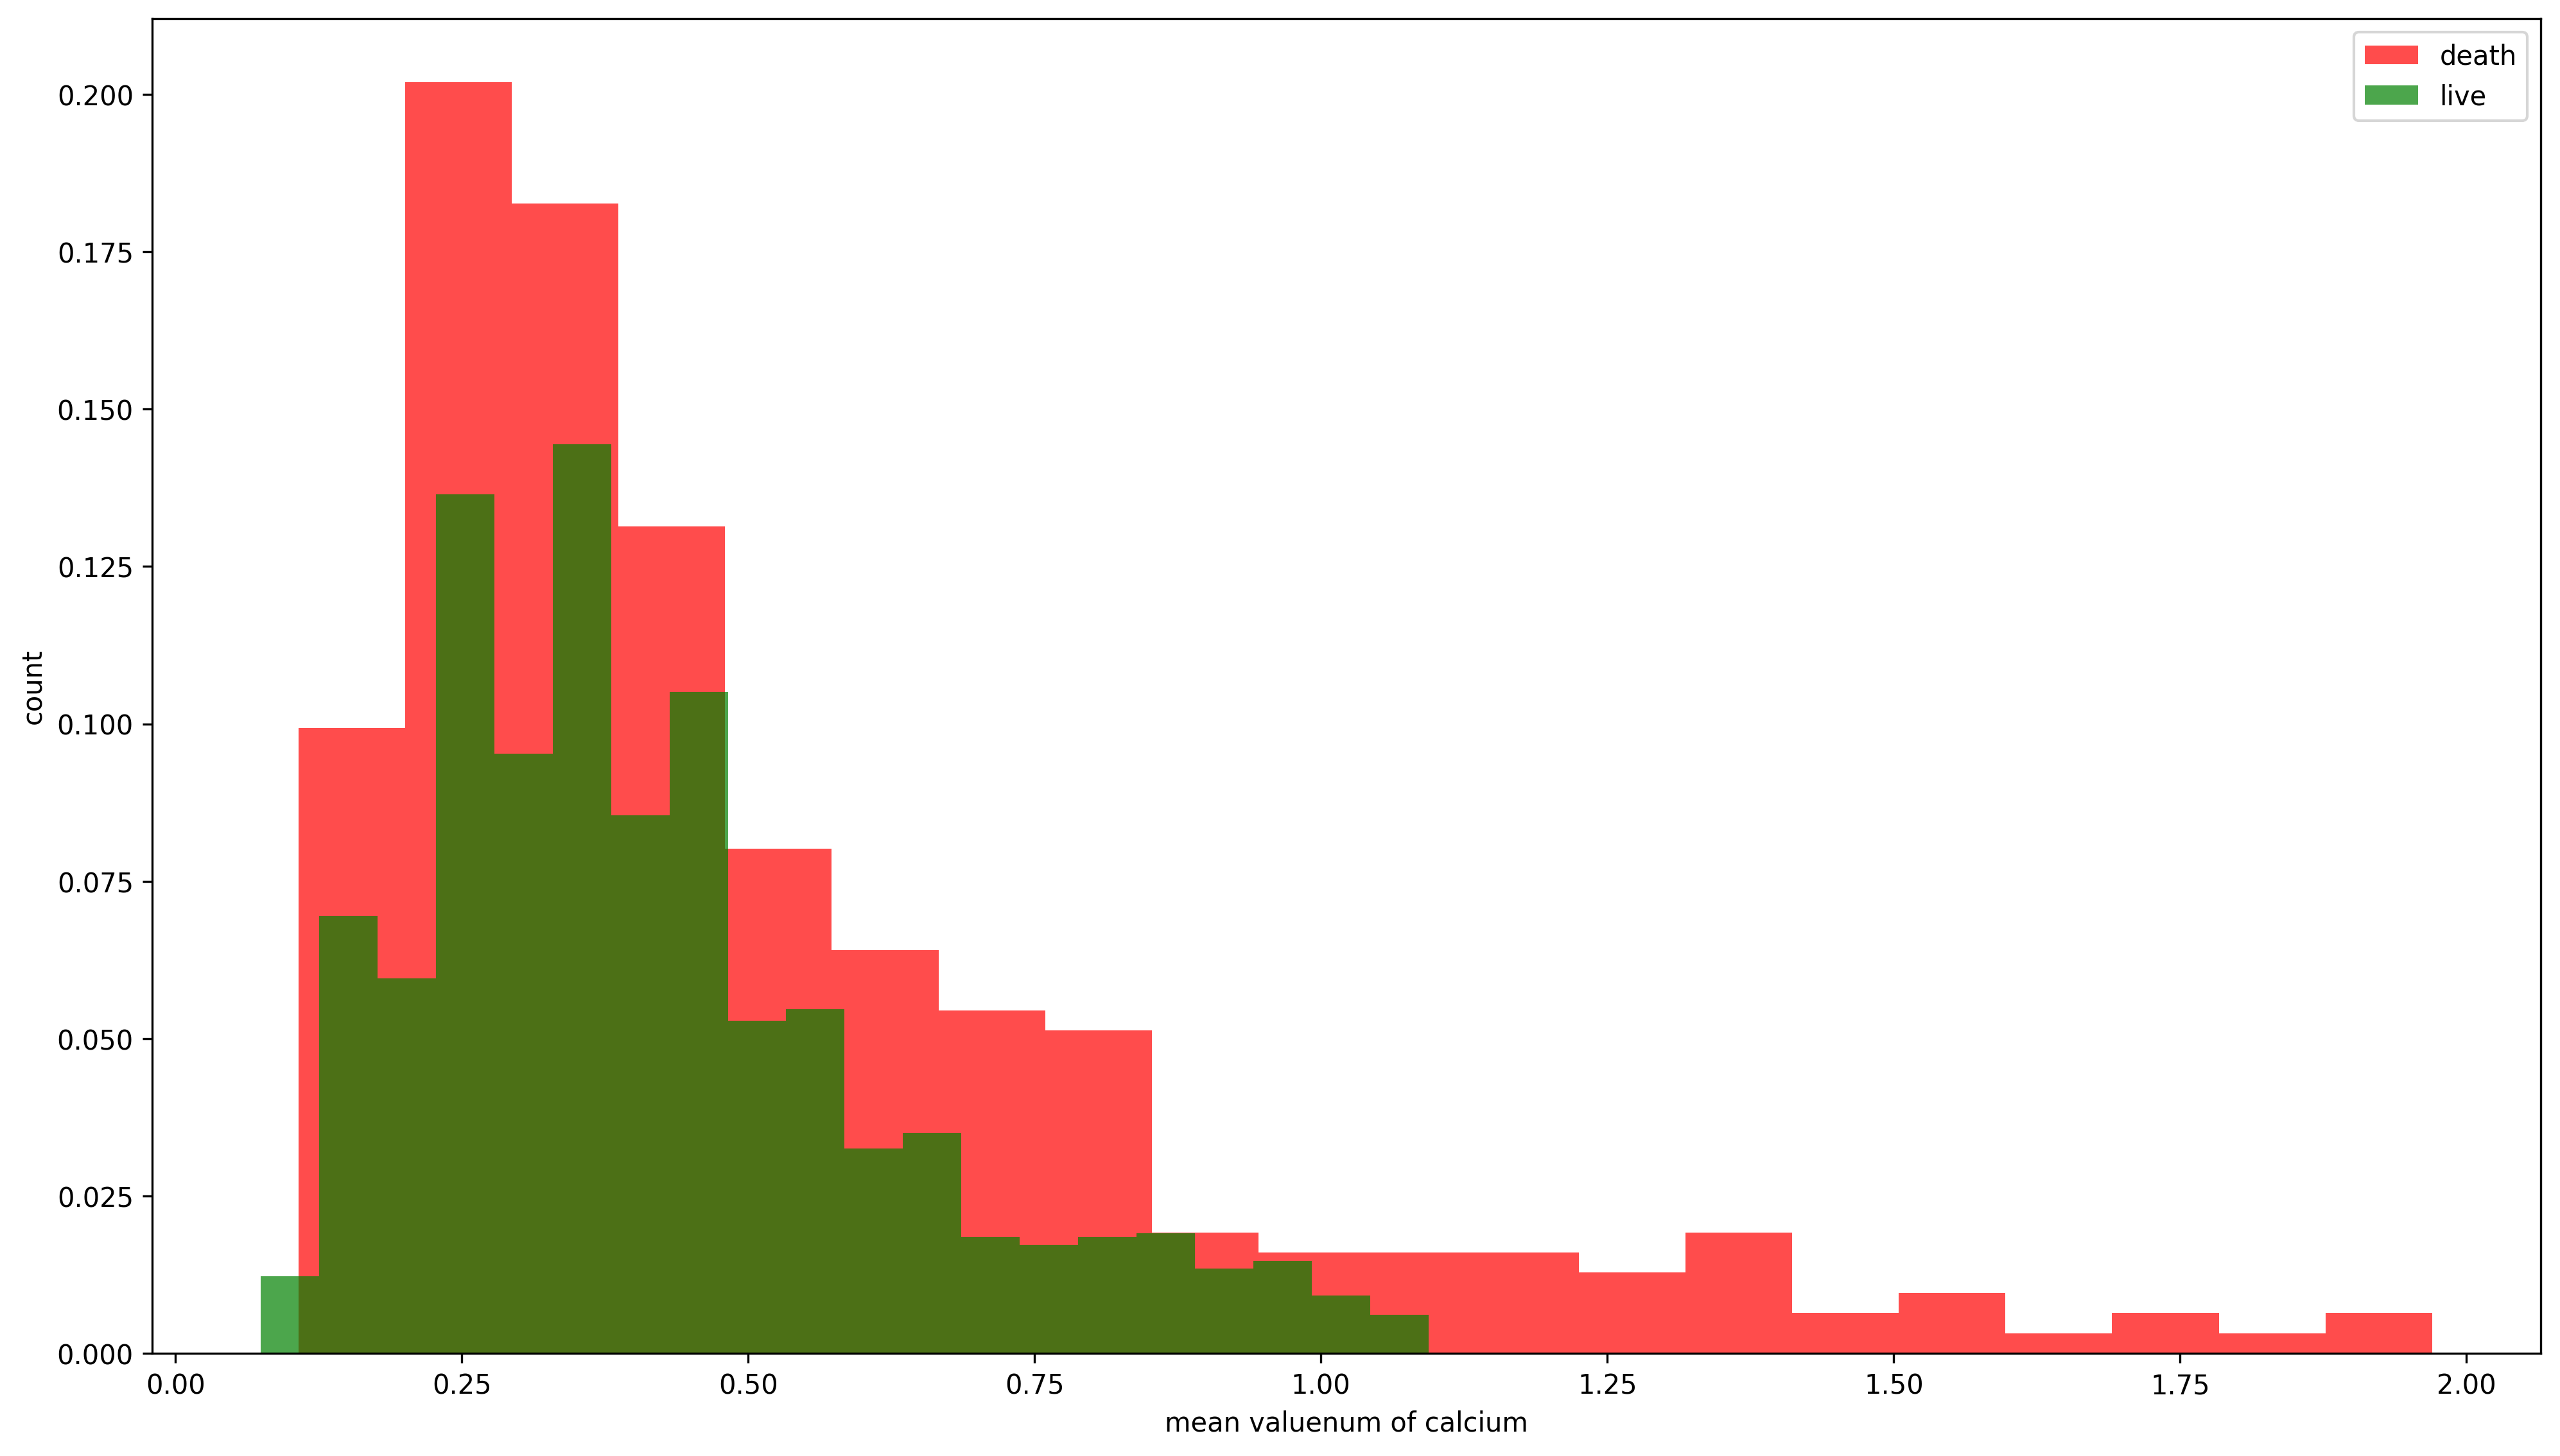

In [22]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of TotalBilirubin')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# MCV_Death.csv

In [23]:
df = pd.read_csv(os.path.join(FILE_DIR, 'MCV_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum    category  \
0    10098672  2140-05-19 11:25:00  2140-05-19 14:19:00      88.0  Hematology   
1    10098672  2140-11-14 12:48:00  2140-11-14 13:20:00      87.0  Hematology   
2    10098672  2141-04-13 12:40:00  2141-04-13 13:01:00      83.0  Hematology   
3    10098672  2141-05-26 12:20:00  2141-05-26 13:37:00      86.0  Hematology   
4    10098672  2141-08-21 12:50:00  2141-08-21 13:04:00      83.0  Hematology   

   dod  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [24]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                dod
                 mean   min    max count
subject_id                              
10001186    89.800000  84.0   98.0     0
10007174    72.400000  70.0   84.0     0
10018852    83.571429  80.0   87.0     0
10024331    93.538462  89.0  101.0   208
10025647    84.638889  79.0   94.0   144

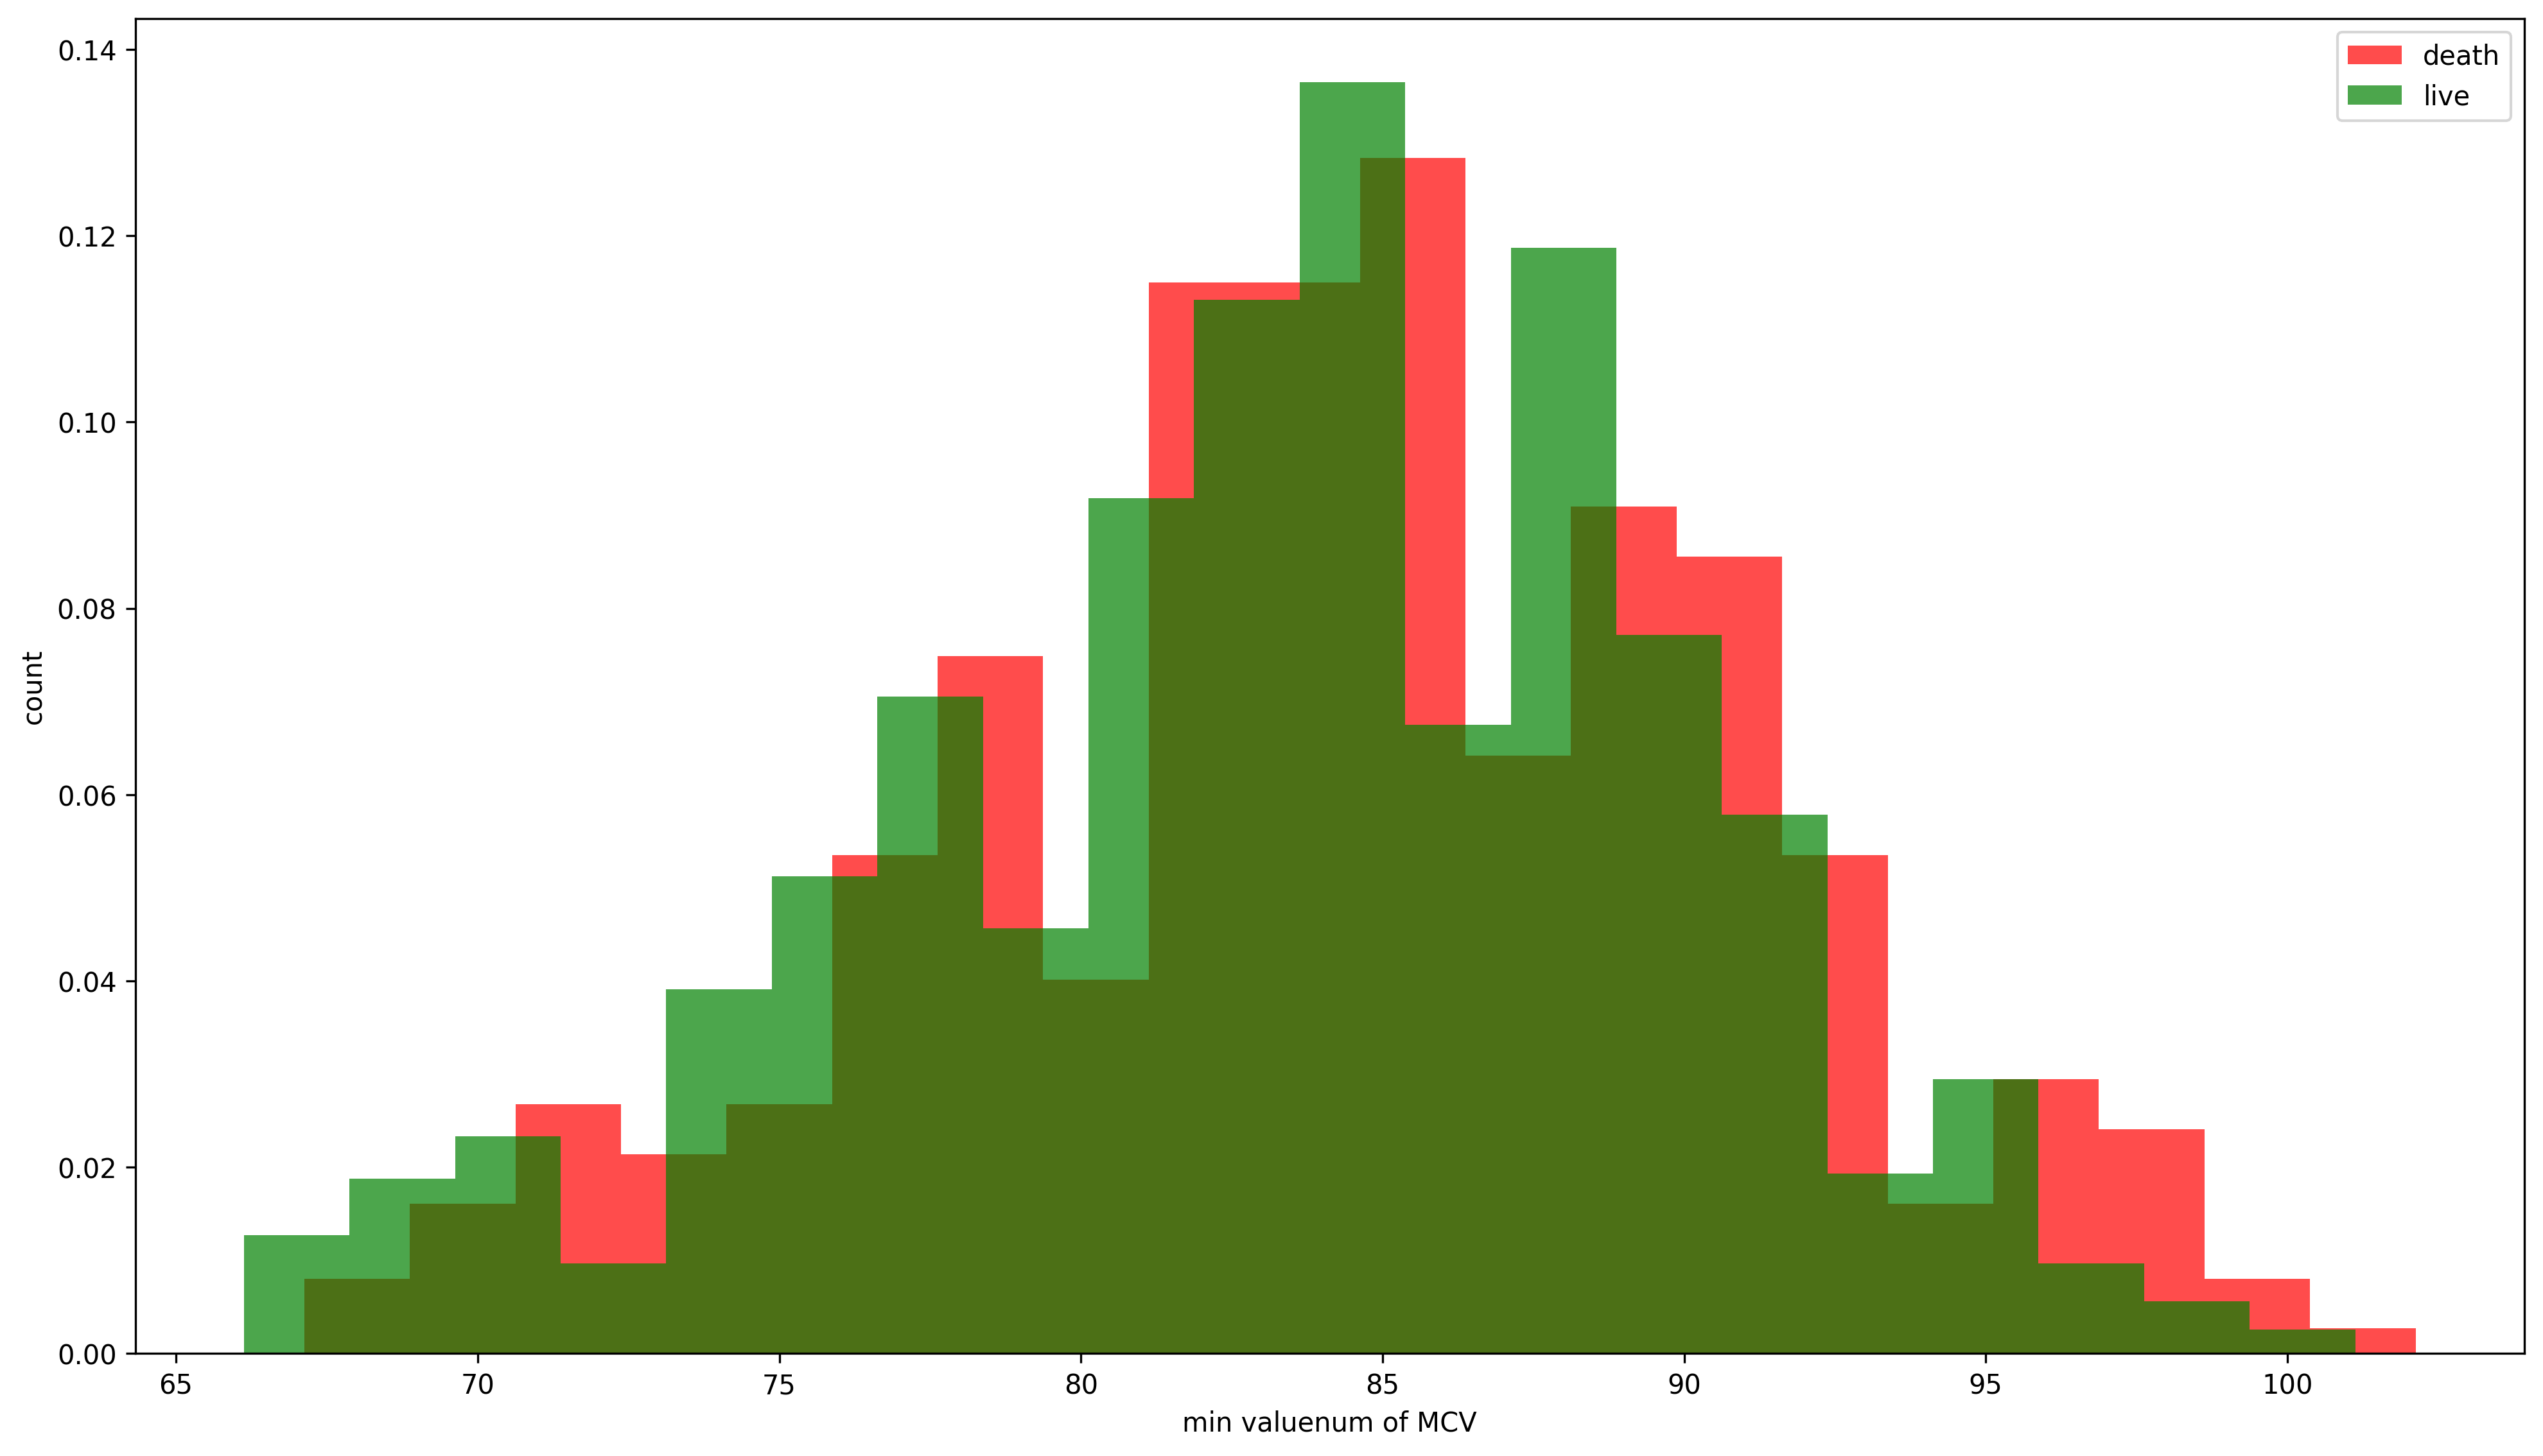

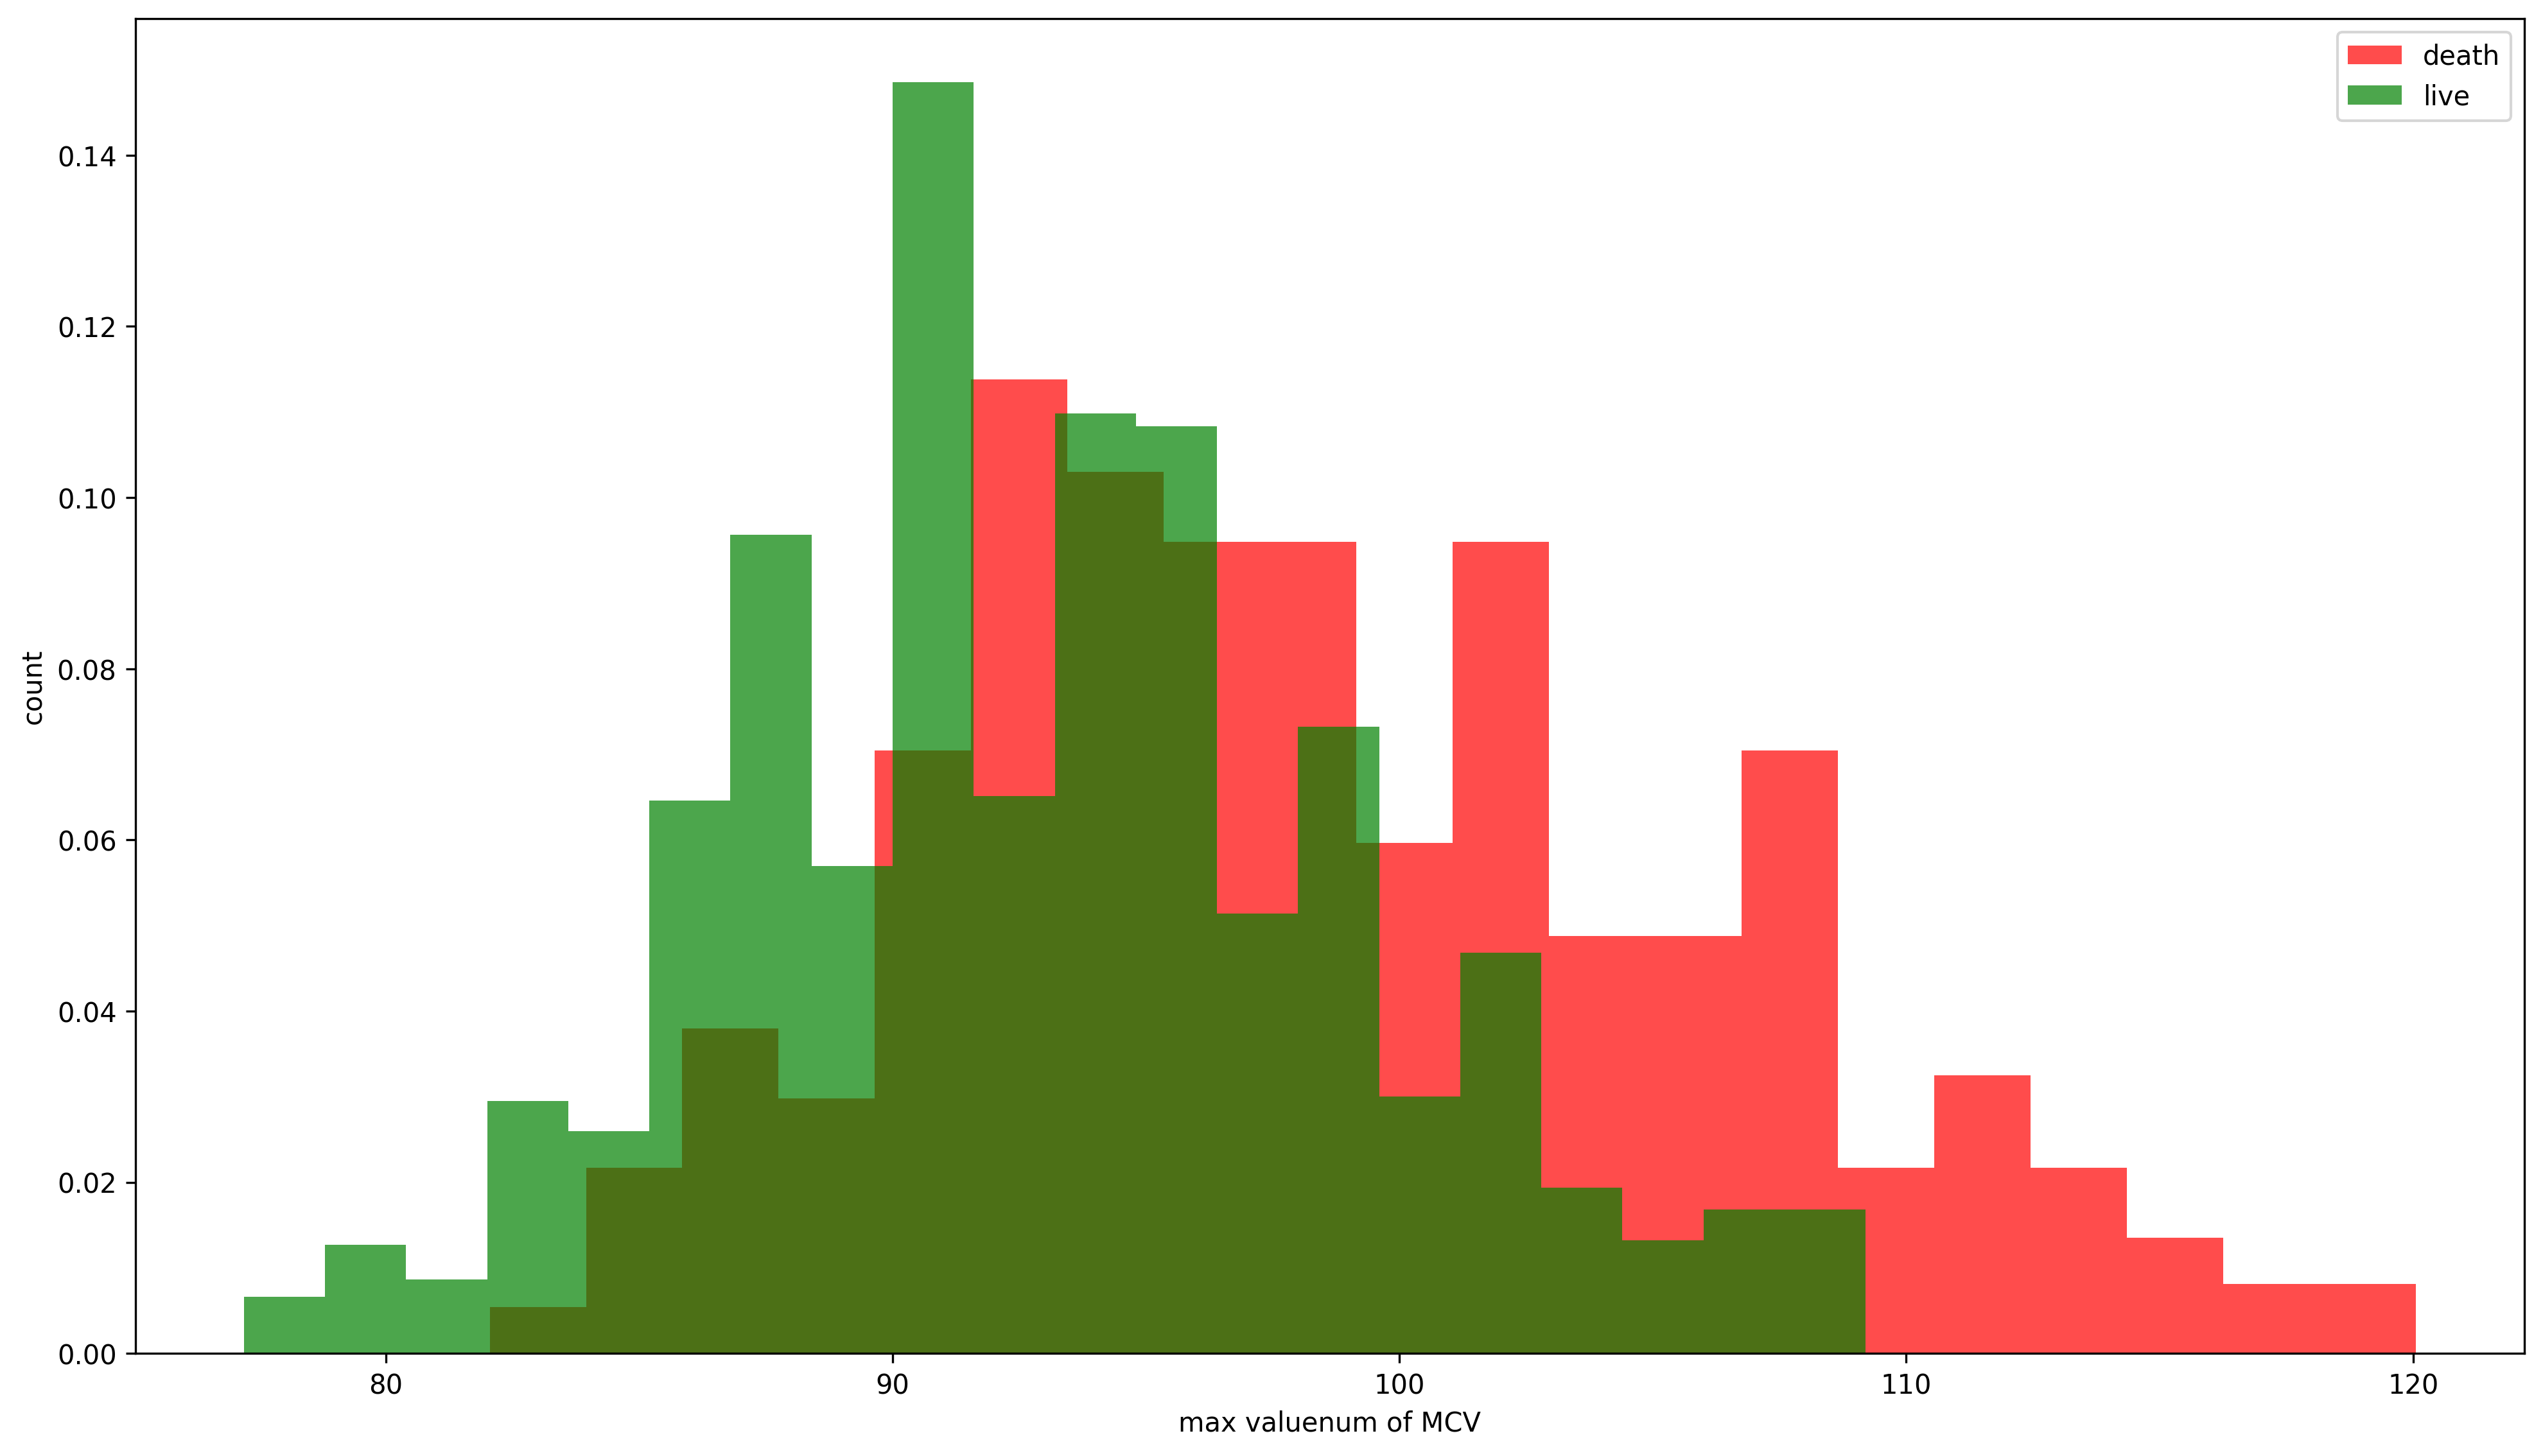

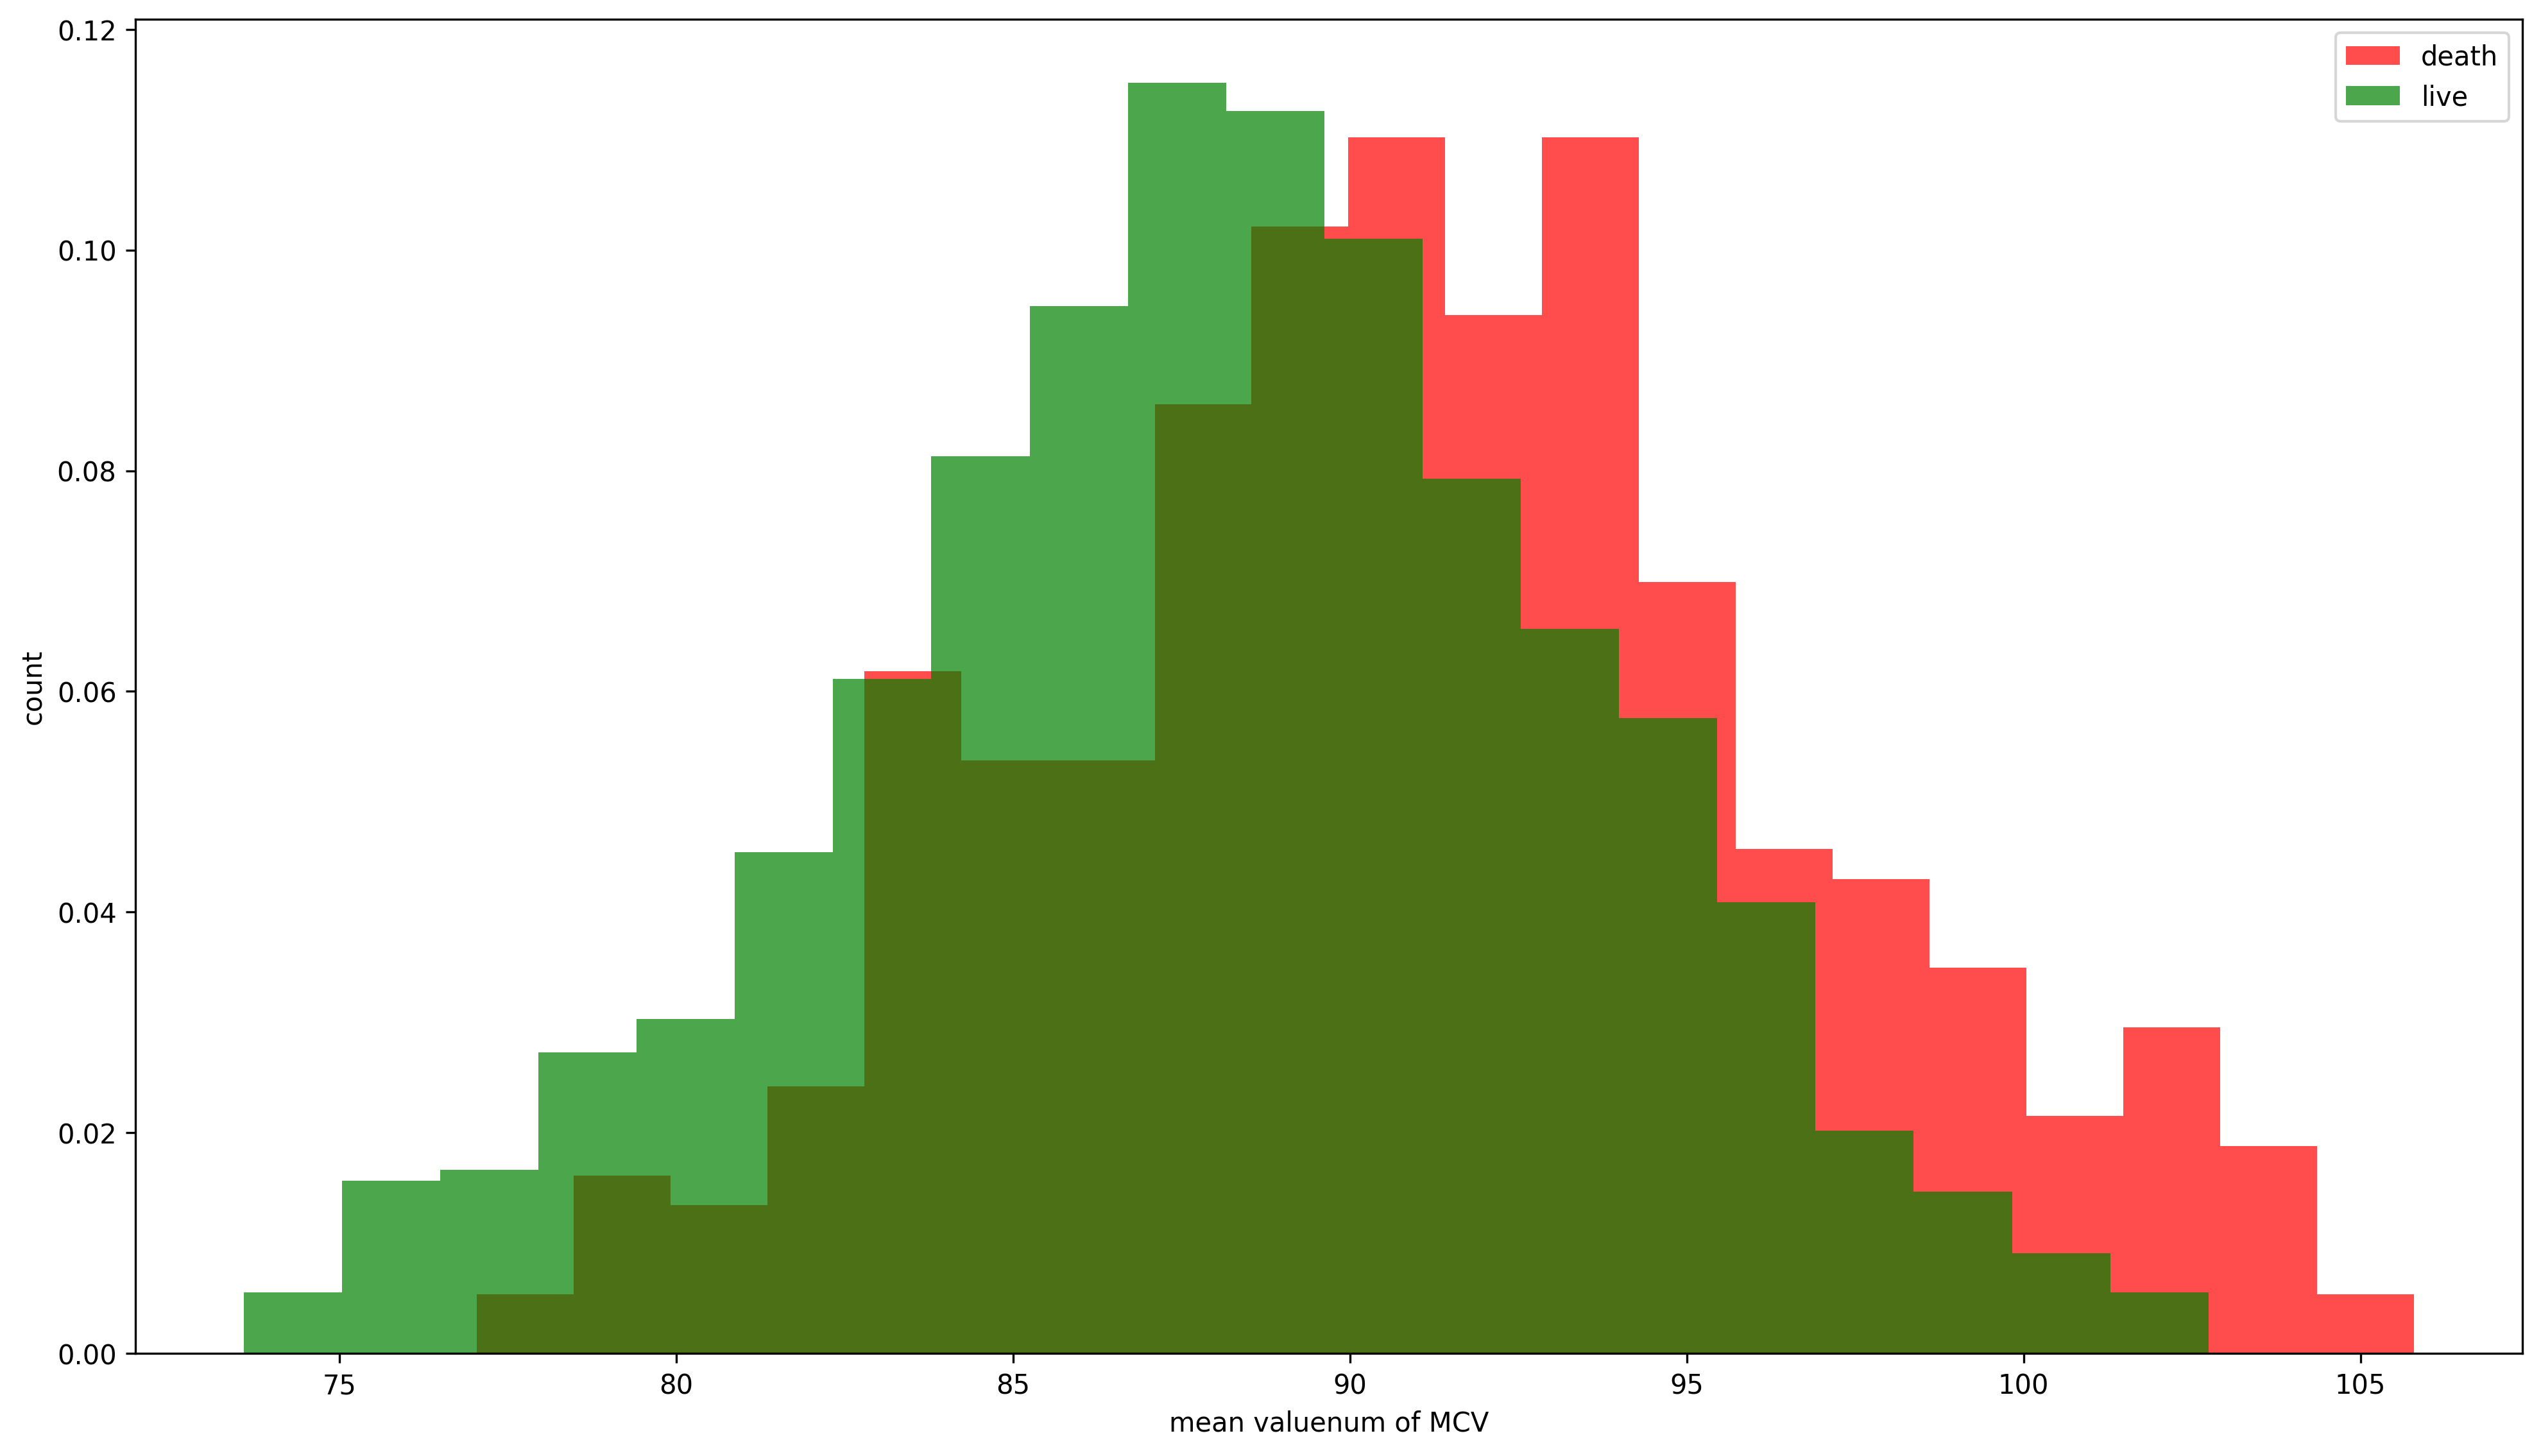

In [26]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of MCV')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# Lactate_Death.csv

In [27]:
df = pd.read_csv(os.path.join(FILE_DIR, 'Lactate_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  \
0    10303503  2146-02-21 13:11:00  2146-02-21 19:41:00     202.0   
1    10303503  2146-07-30 11:55:00  2146-07-30 20:07:00     414.0   
2    10303503  2148-05-04 06:35:00  2148-05-04 09:00:00     217.0   
3    10303503  2146-02-03 09:00:00  2146-02-03 10:46:00     207.0   
4    10303503  2146-02-04 07:20:00  2146-02-04 11:29:00     208.0   

                        label  dod  
0  Lactate Dehydrogenase (LD)  NaN  
1  Lactate Dehydrogenase (LD)  NaN  
2  Lactate Dehydrogenase (LD)  NaN  
3  Lactate Dehydrogenase (LD)  NaN  
4  Lactate Dehydrogenase (LD)  NaN

In [28]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                 dod
                  mean    min    max count
subject_id                                
10024331    232.250000  115.0  899.0    64
10025647    186.000000  186.0  186.0     2
10027957    214.833333  175.0  263.0     0
10030412    163.000000  163.0  163.0     0
10048262    221.666667  187.0  249.0     0

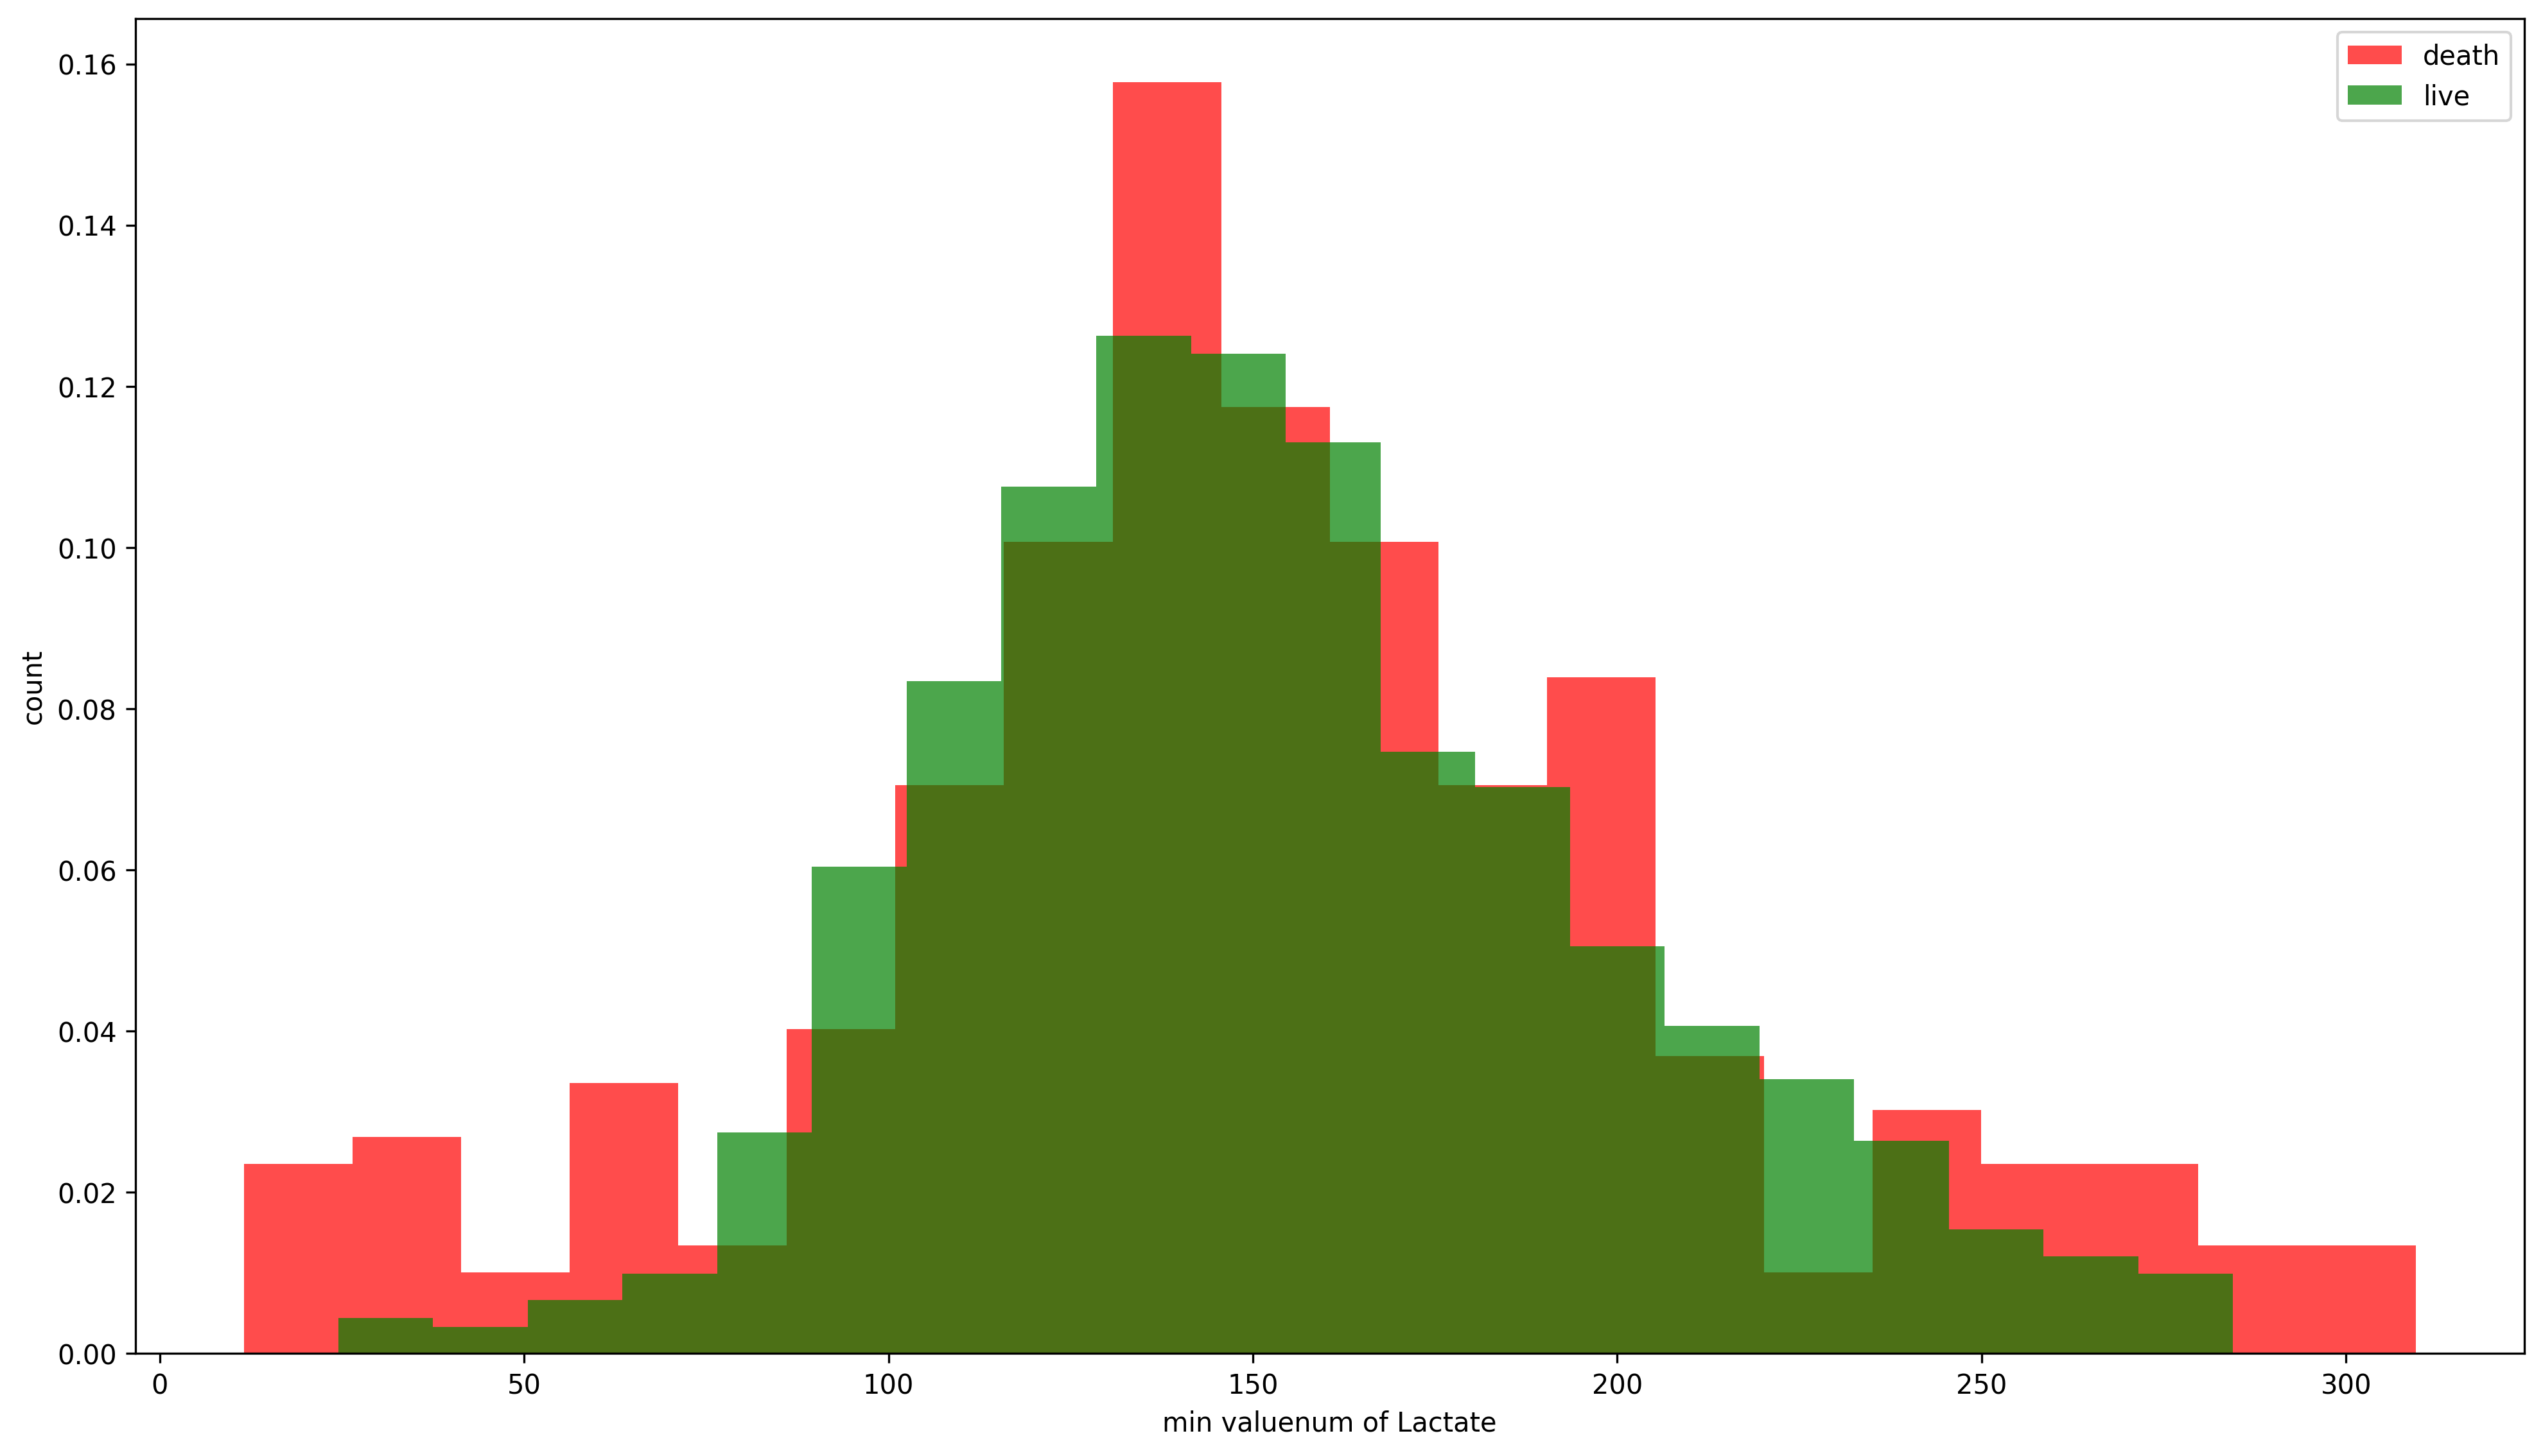

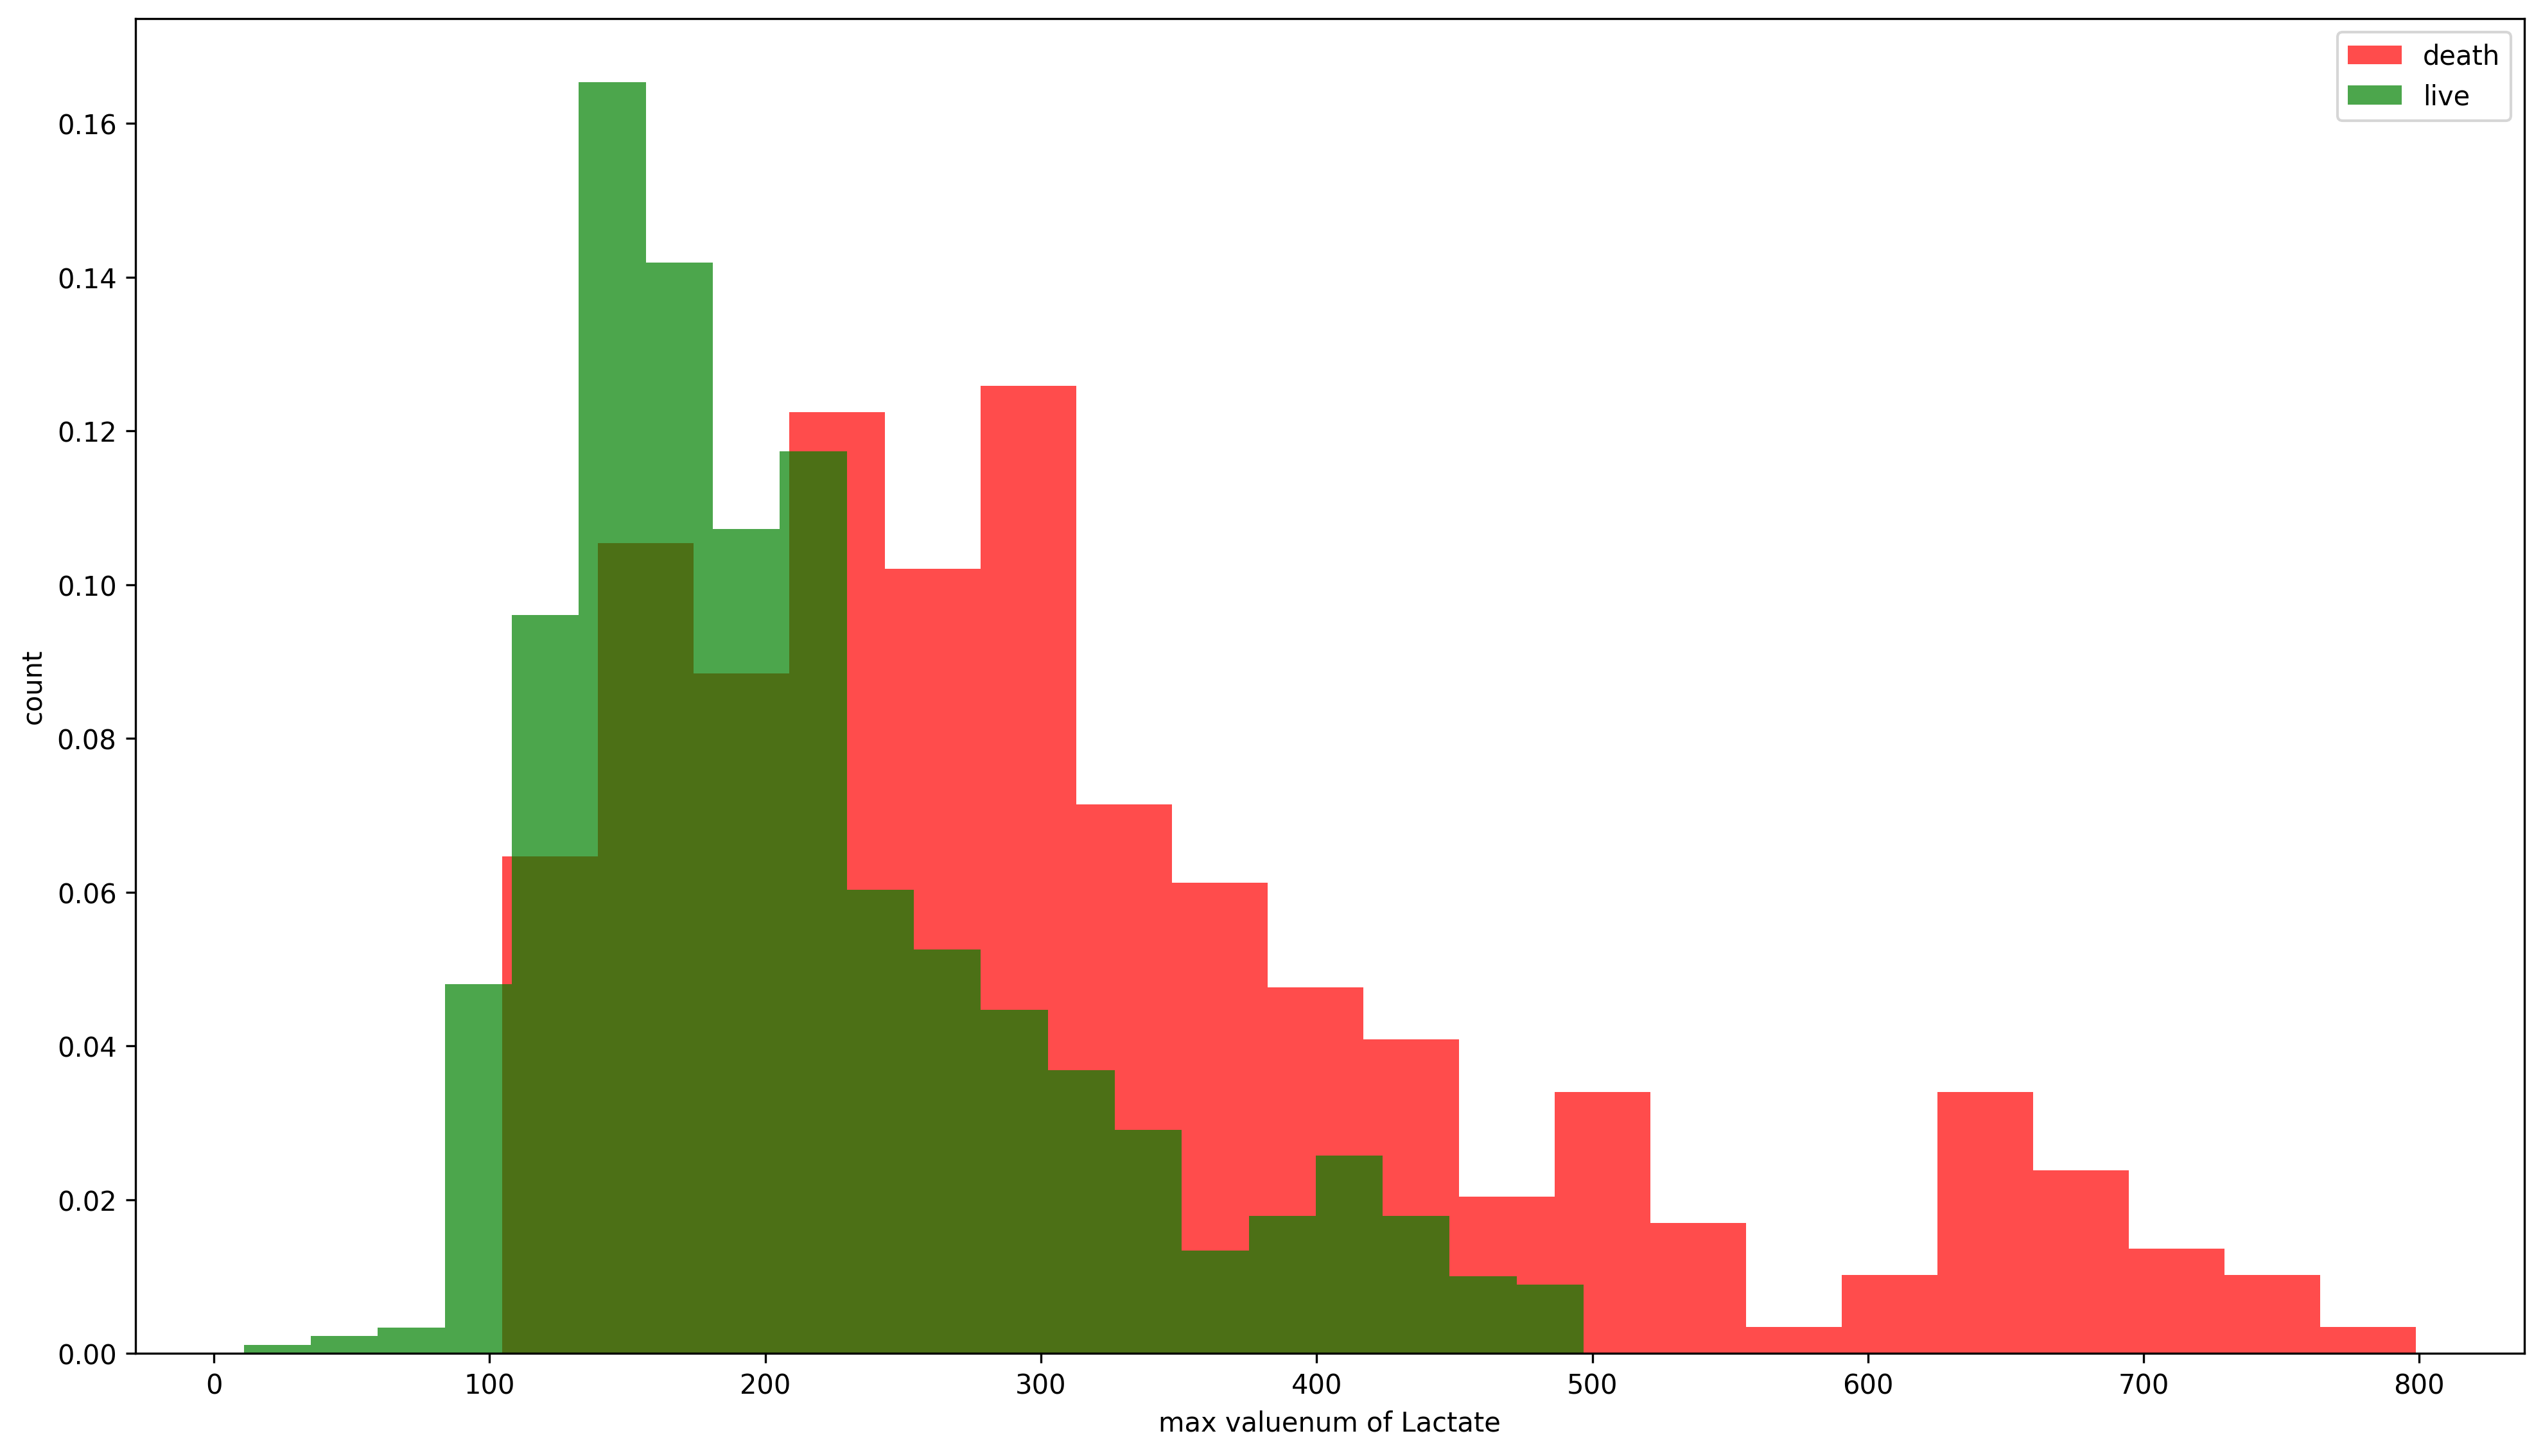

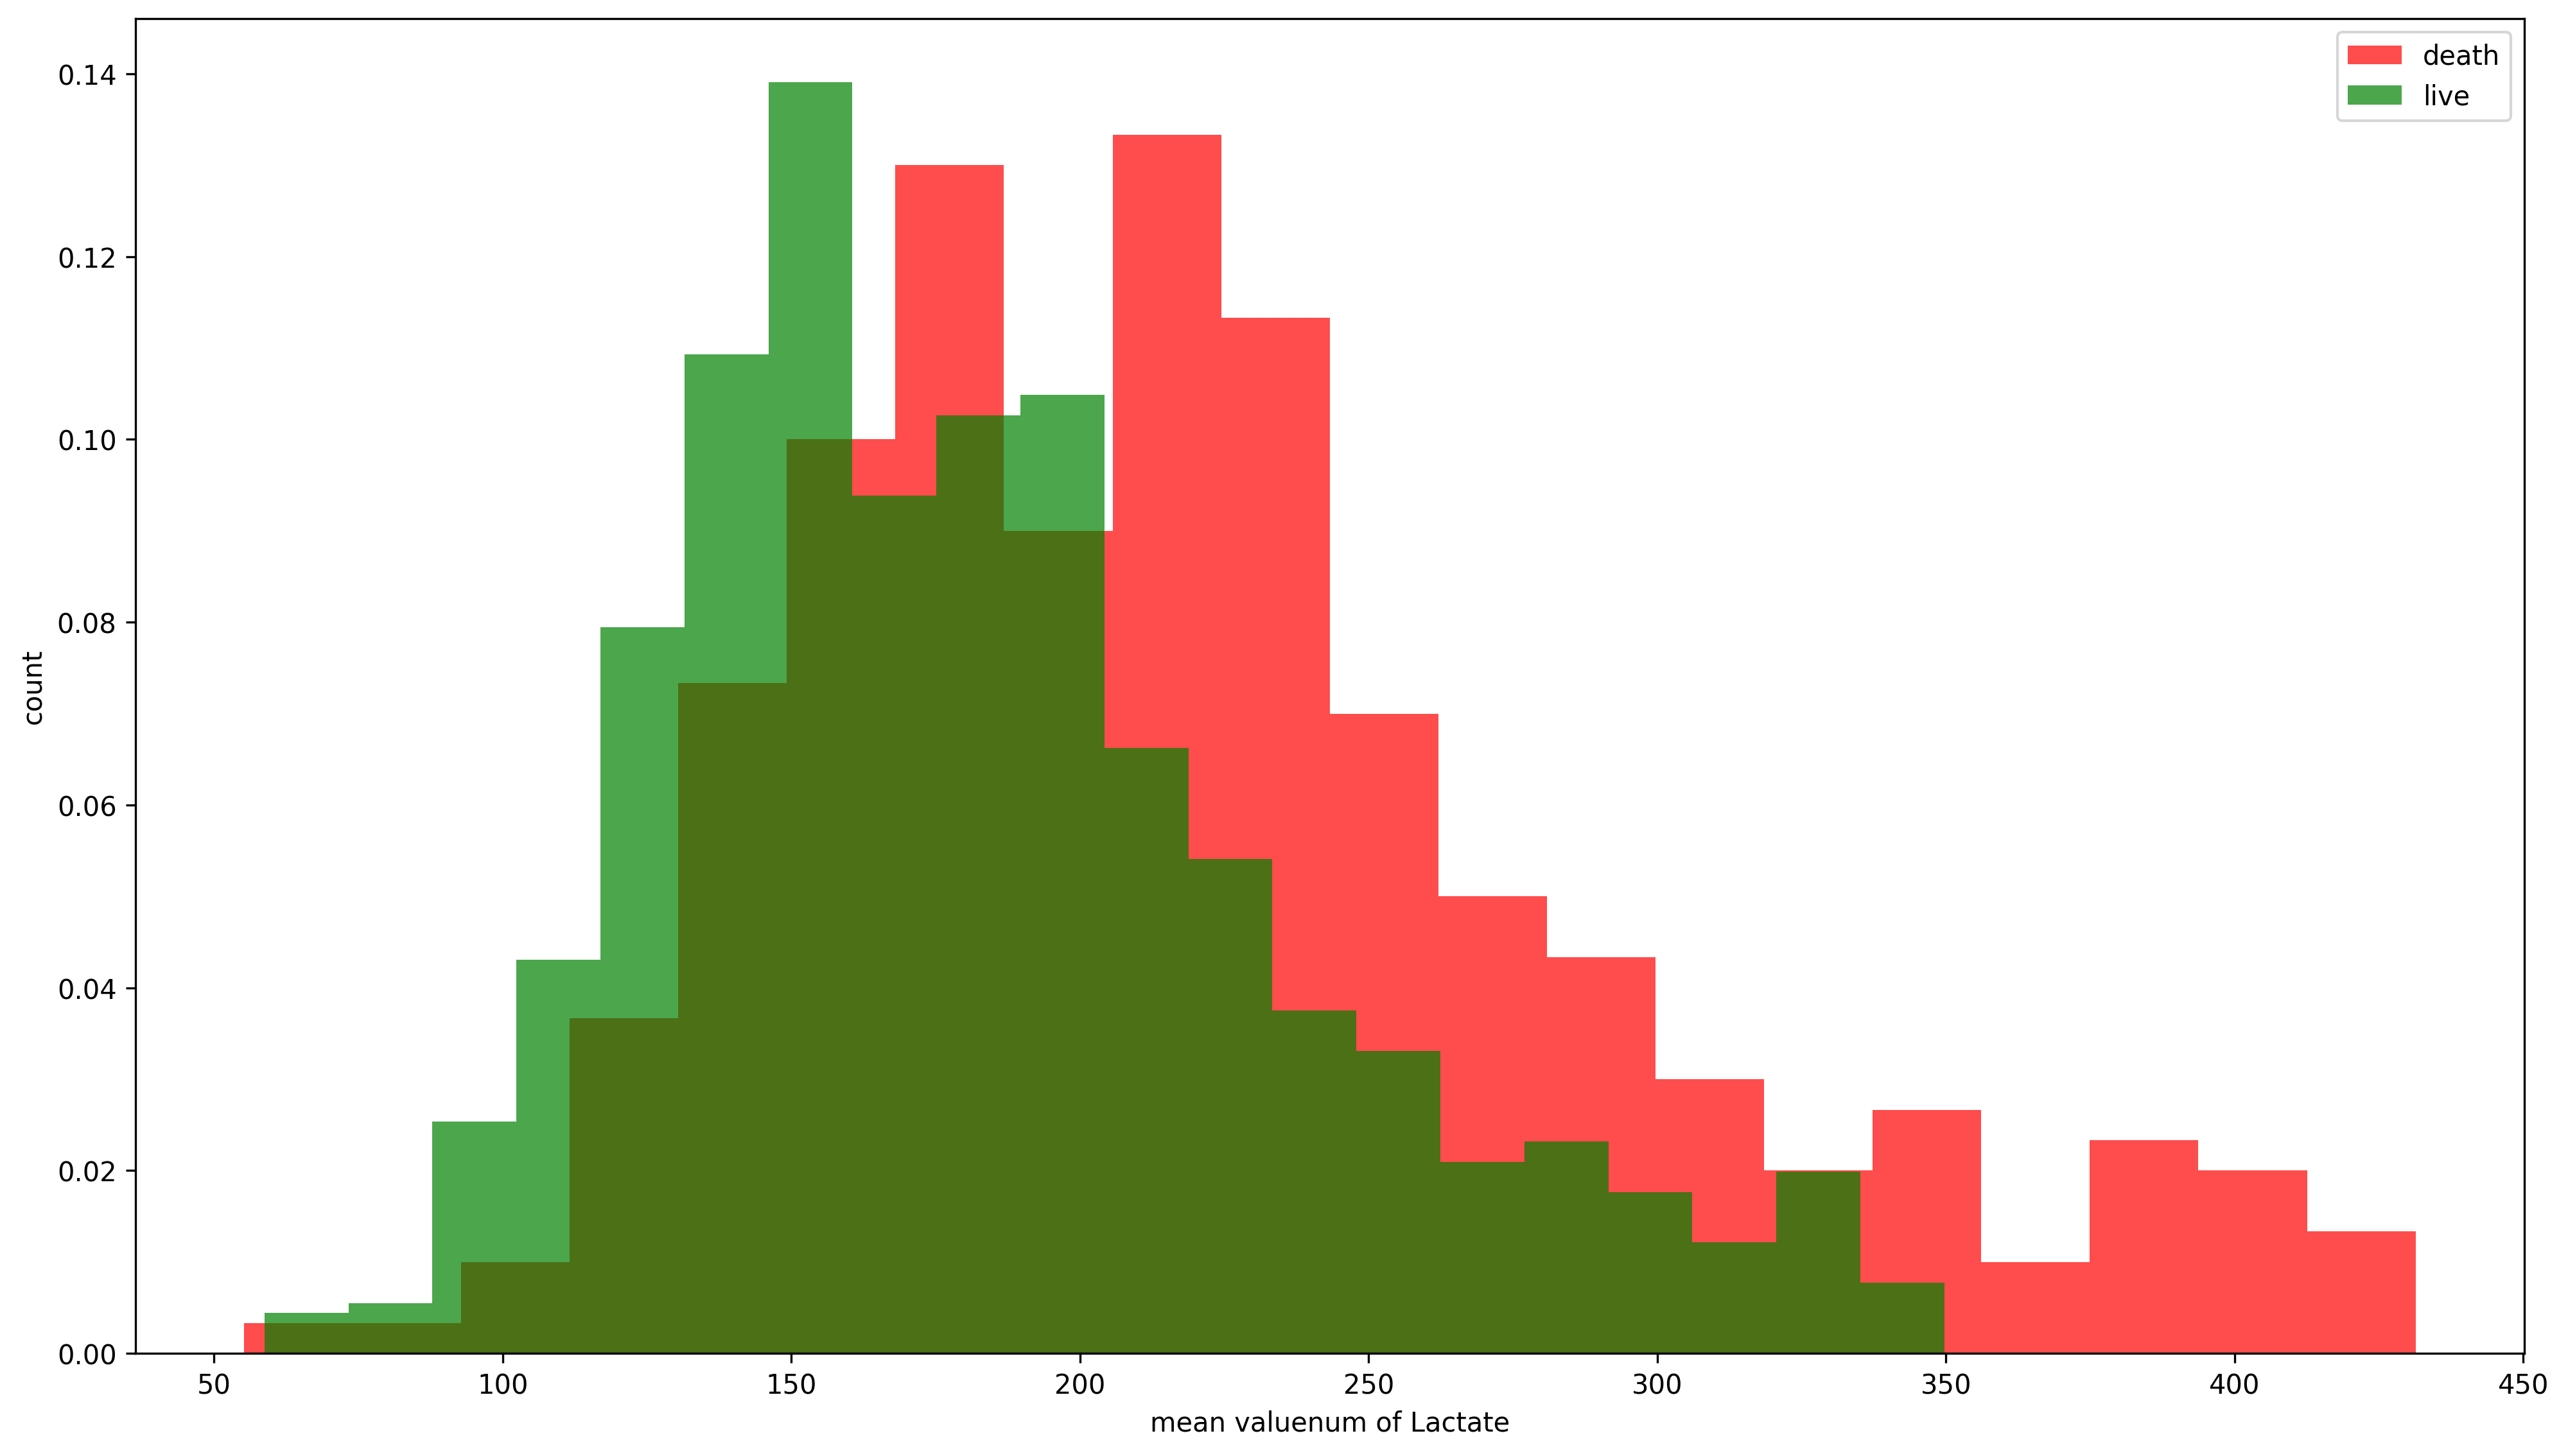

In [30]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of Lactate')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# HeartRate_Death.csv

In [31]:
df = pd.read_csv(os.path.join(FILE_DIR, 'HeartRate_Death.csv'))
df.head()

subject_id            charttime            storetime  itemid  value  \
0    10303503  2155-11-08 07:00:00  2155-11-08 08:09:00  220045   74.0   
1    10303503  2155-11-08 08:00:00  2155-11-08 08:09:00  220045   75.0   
2    10303503  2155-11-08 09:00:00  2155-11-08 10:04:00  220045   69.0   
3    10303503  2155-11-08 10:00:00  2155-11-08 10:04:00  220045   74.0   
4    10303503  2155-11-08 03:49:00  2155-11-08 03:53:00  220045   89.0   

   valuenum  dod  
0      74.0  NaN  
1      75.0  NaN  
2      69.0  NaN  
3      74.0  NaN  
4      89.0  NaN

In [32]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                dod
                 mean   min    max count
subject_id                              
10024331    91.744361  50.0  150.0   266
10025647    71.060606  50.0  120.0   132
10037975    96.193103  50.0  157.0   145
10048262    97.214286  50.0  130.0     0
10056223    89.316384  60.0  120.0     0

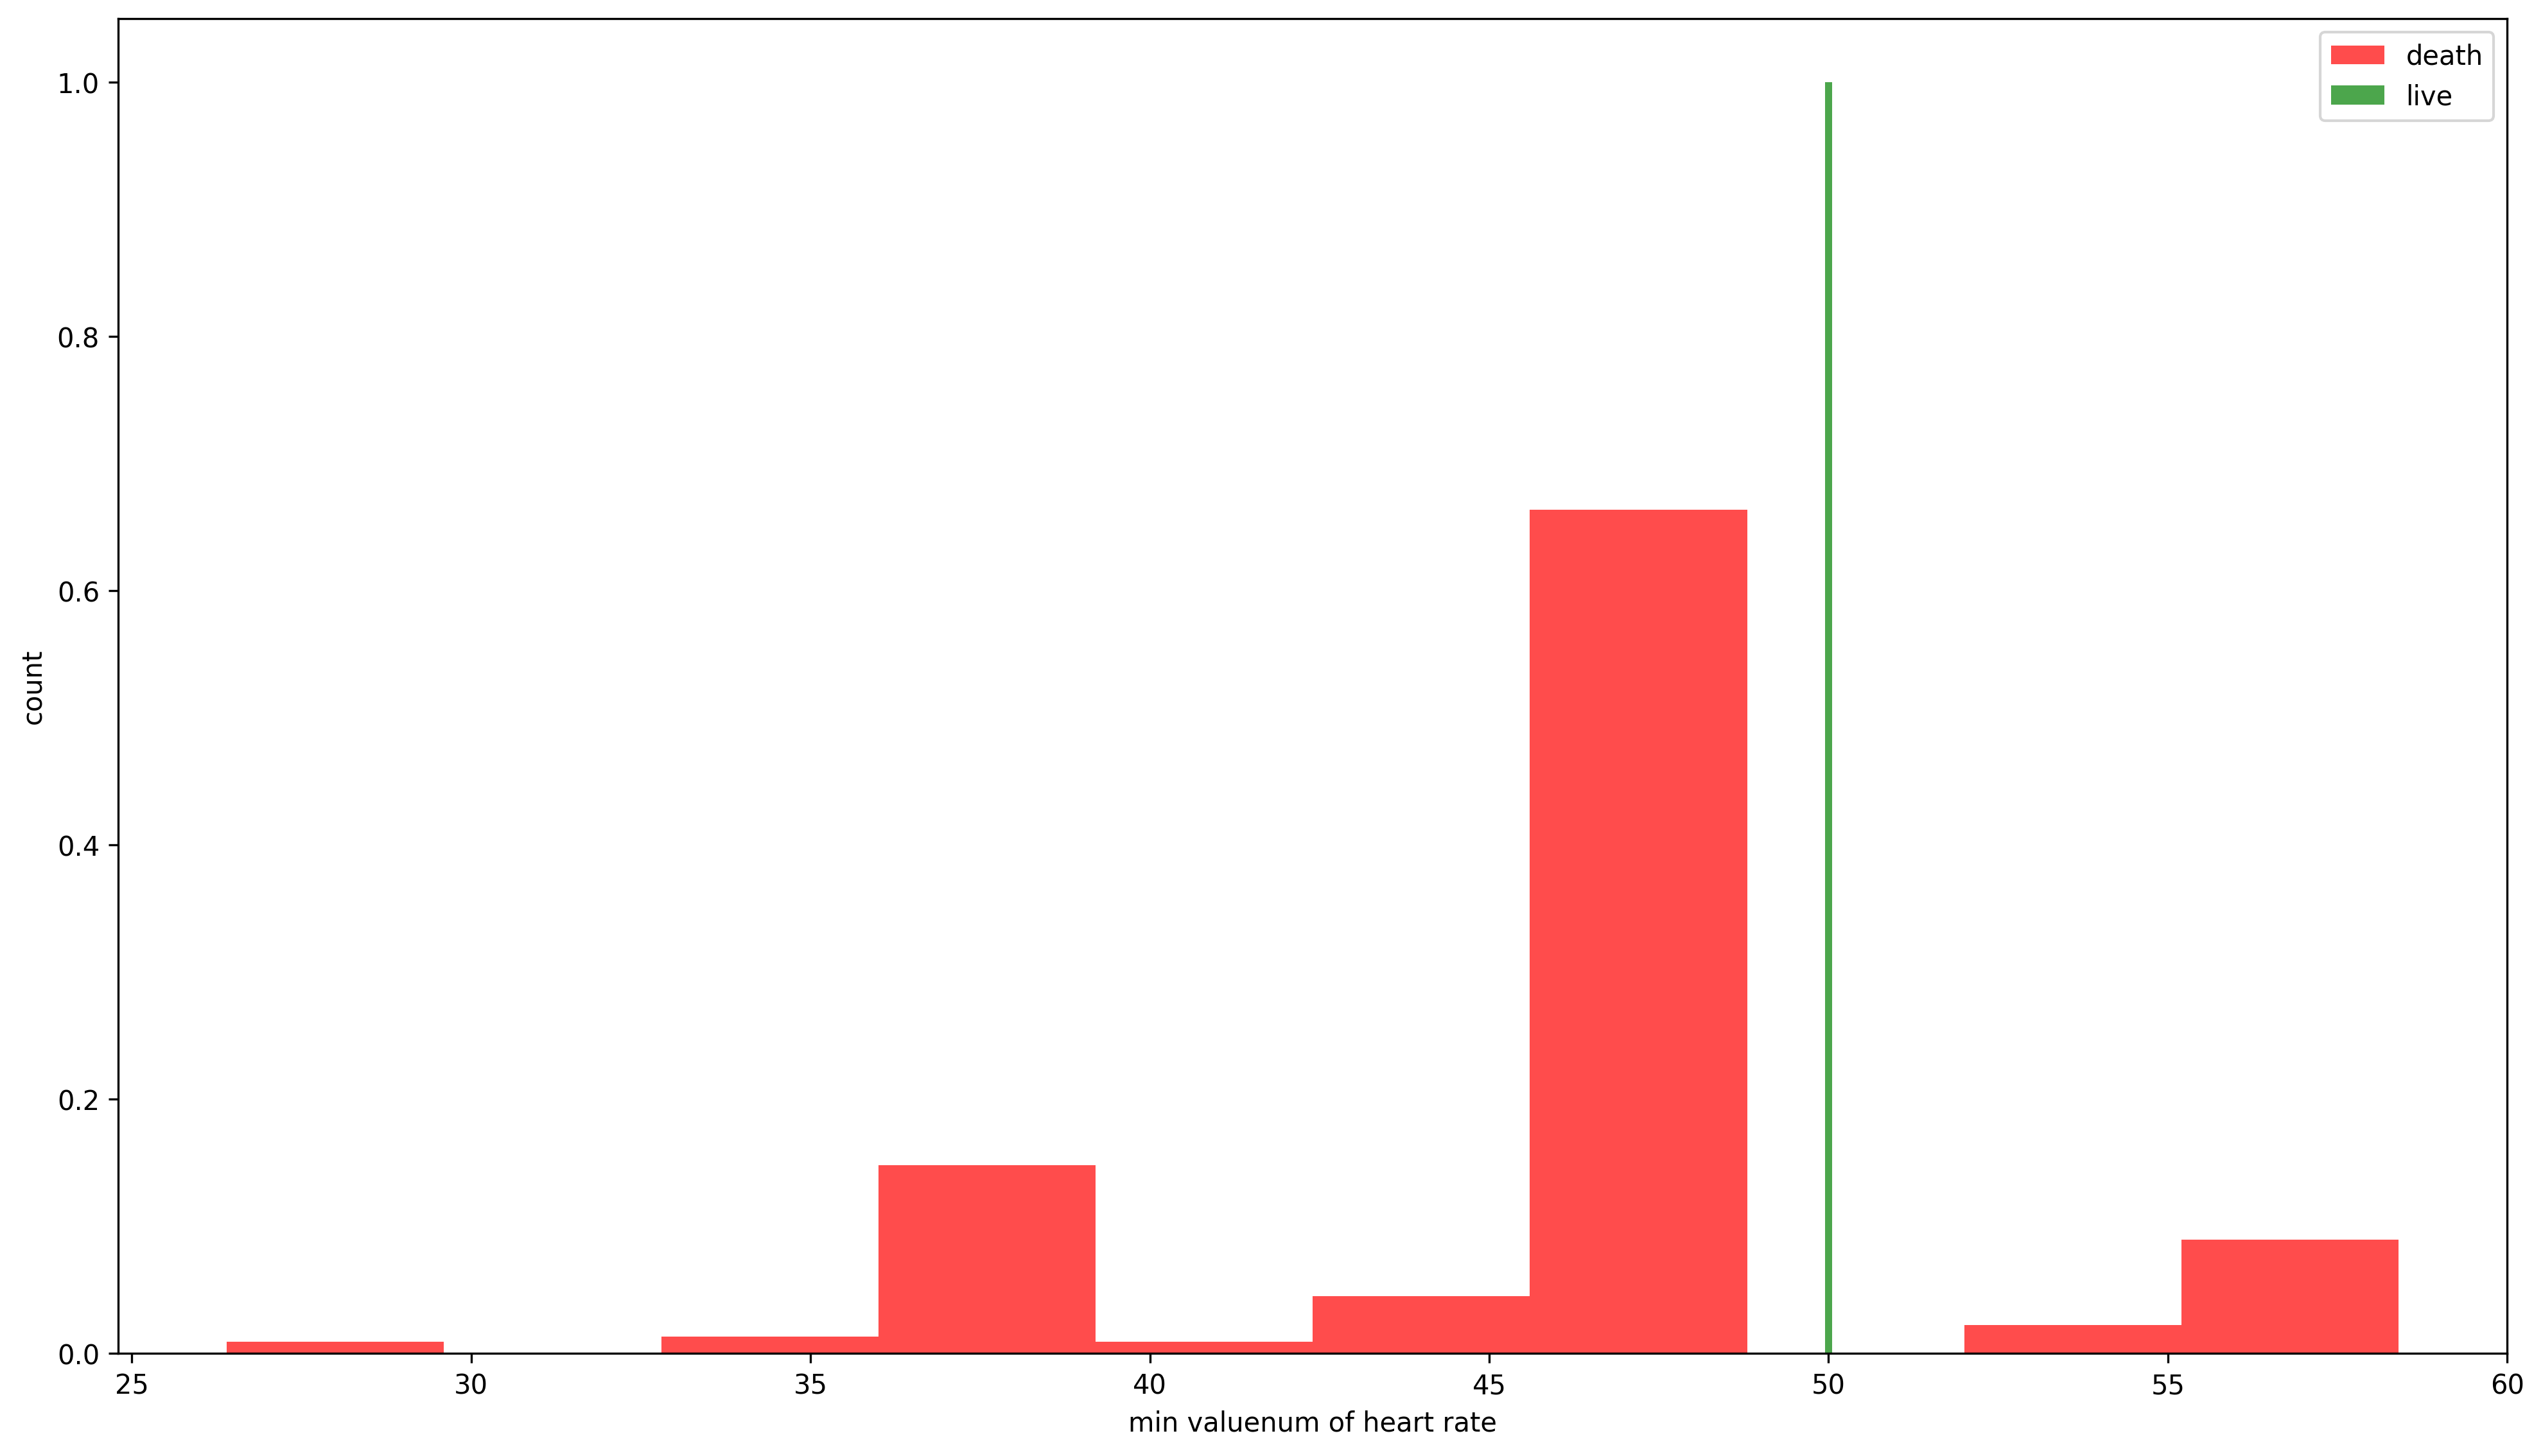

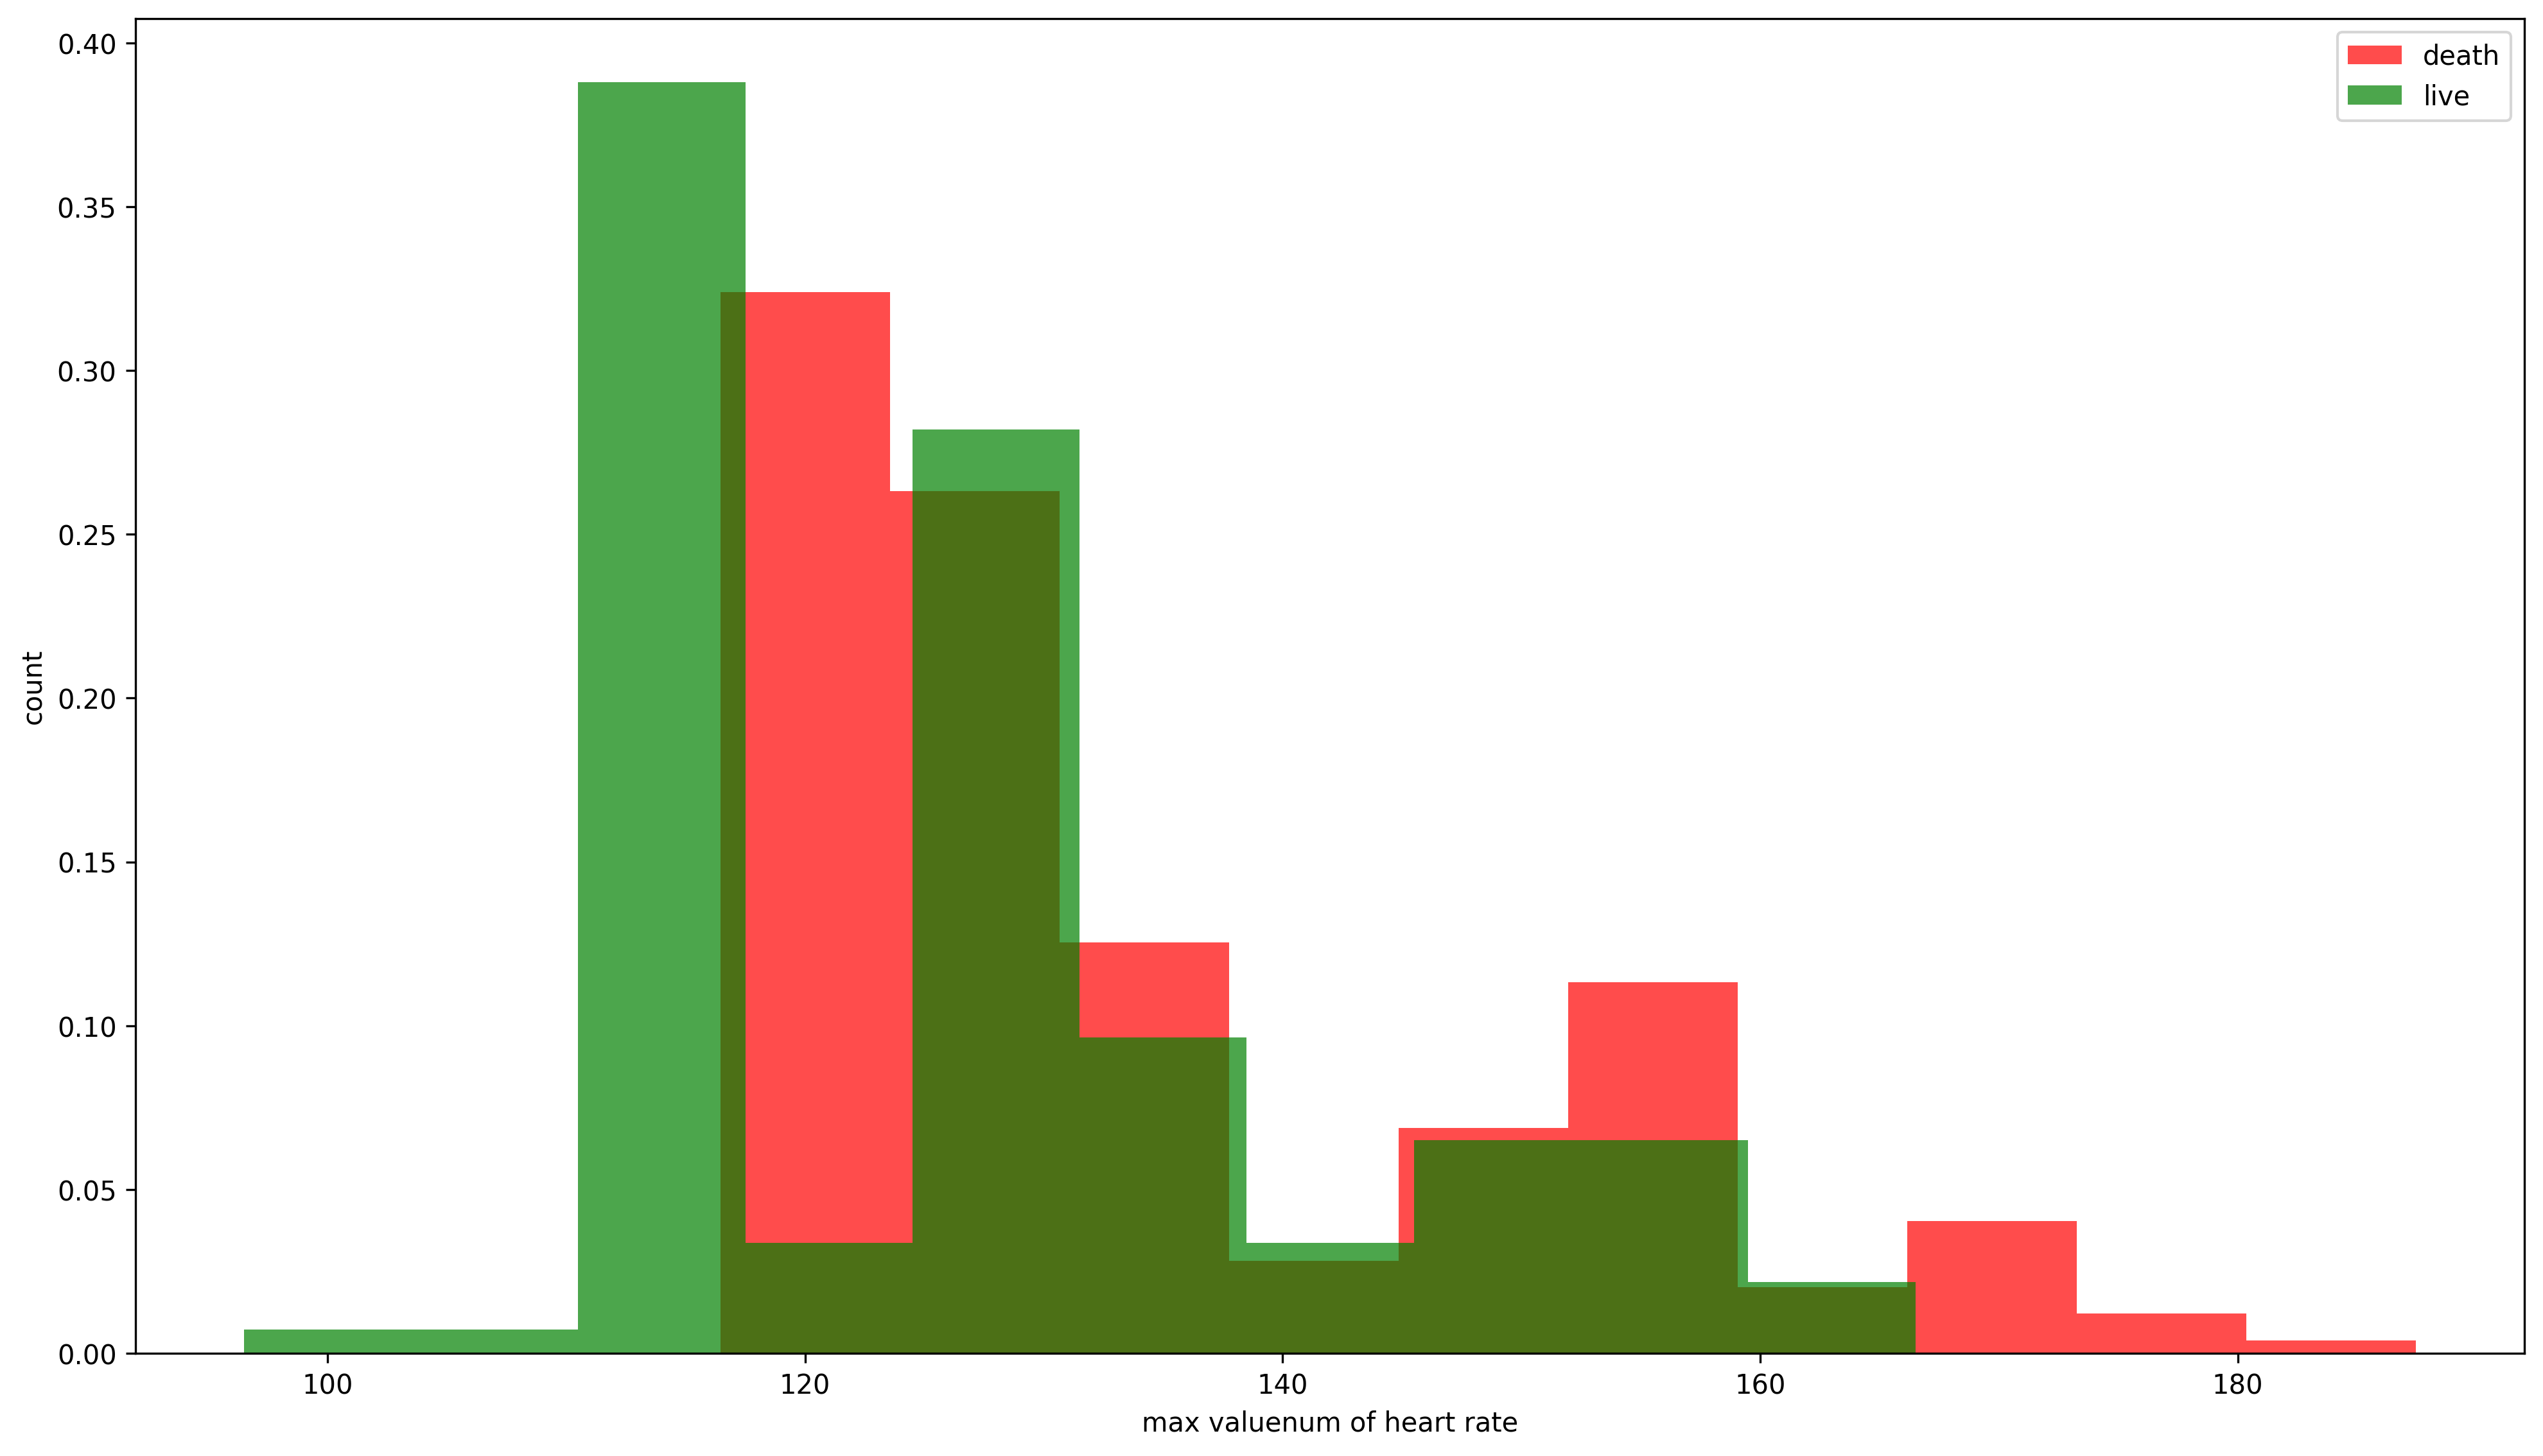

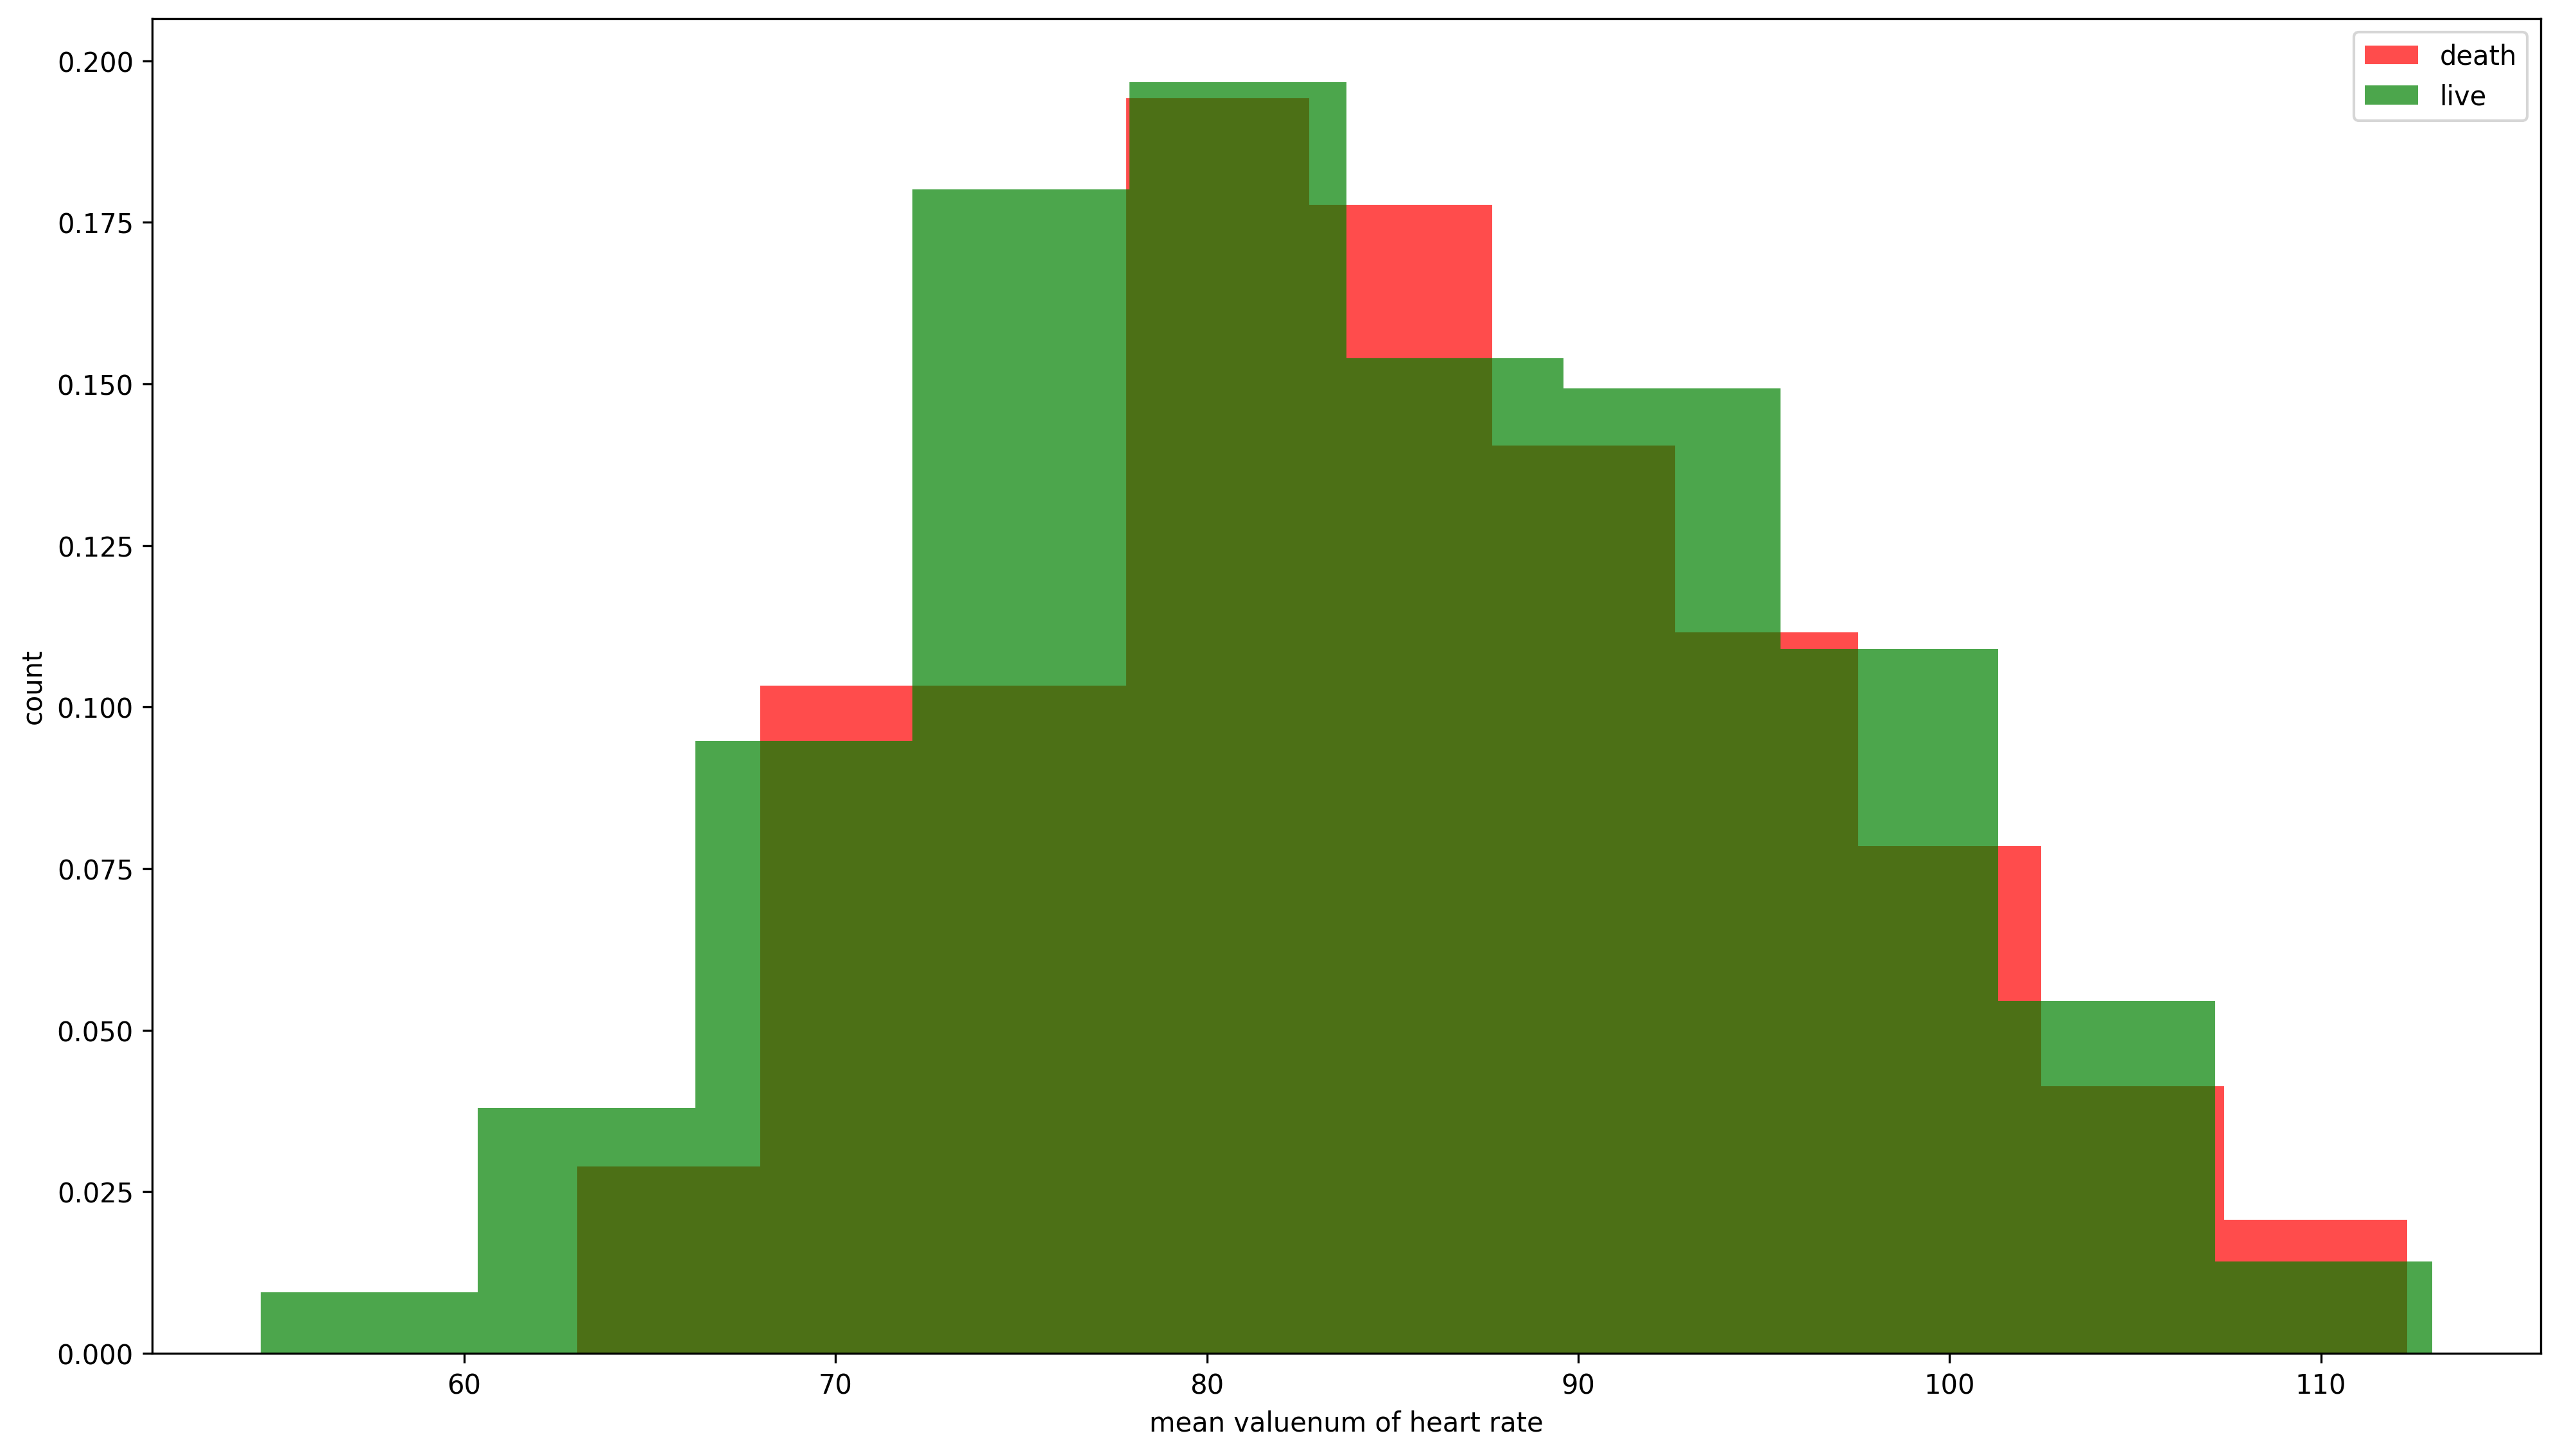

In [35]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=10)
    hist2, bins2 = np.histogram(data2, bins=10)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of heart rate')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# Glucose_NotNull_Death.csv

In [36]:
df = pd.read_csv(os.path.join(FILE_DIR, 'Glucose_NotNull_Death.csv'))
df.head()

subject_id  itemid    label value  valuenum valueuom  dod
0    10098672   50809  Glucose   188       188    mg/dL  NaN
1    10098672   50931  Glucose   ___       132    mg/dL  NaN
2    10098672   50931  Glucose   ___       217    mg/dL  NaN
3    10098672   50931  Glucose   ___       158    mg/dL  NaN
4    10098672   50931  Glucose   ___       193    mg/dL  NaN

In [37]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum            dod
                  mean min  max count
subject_id                           
10001186    114.400000  90  155     0
10007174    105.500000  58  147     0
10018852     93.166667  65  119     0
10024331    159.000000  98  270   154
10025647    103.150943  83  172   106

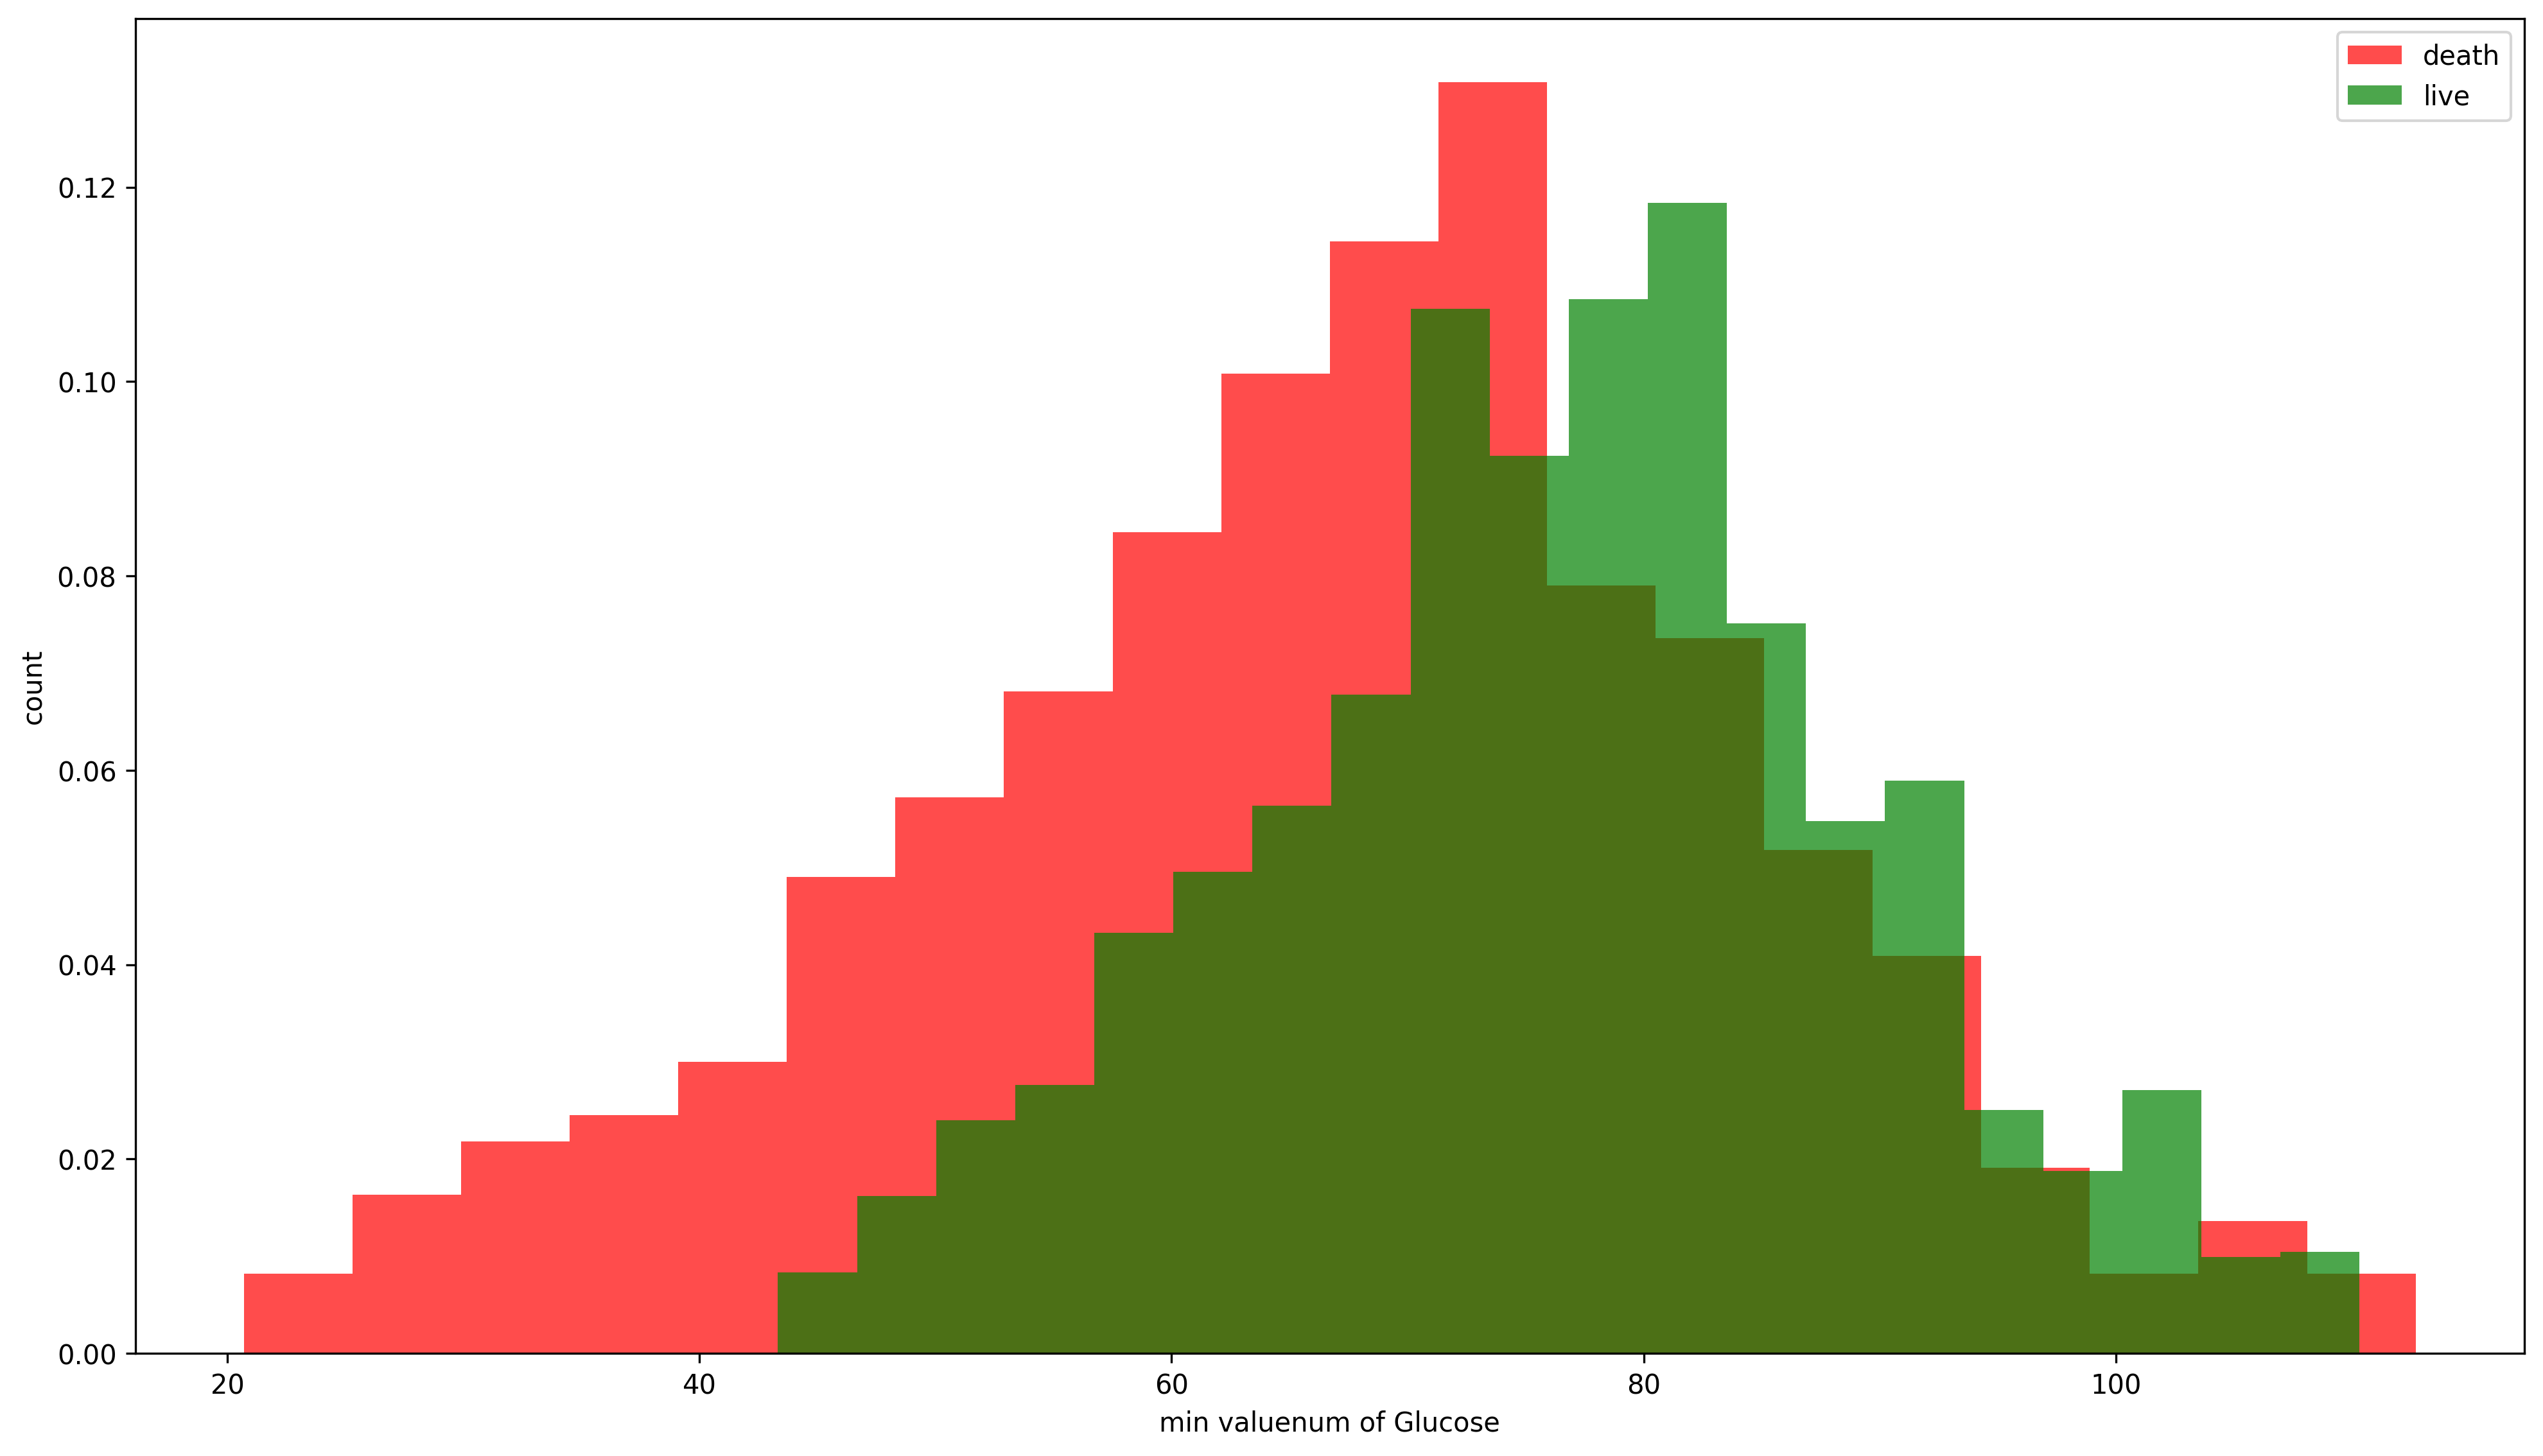

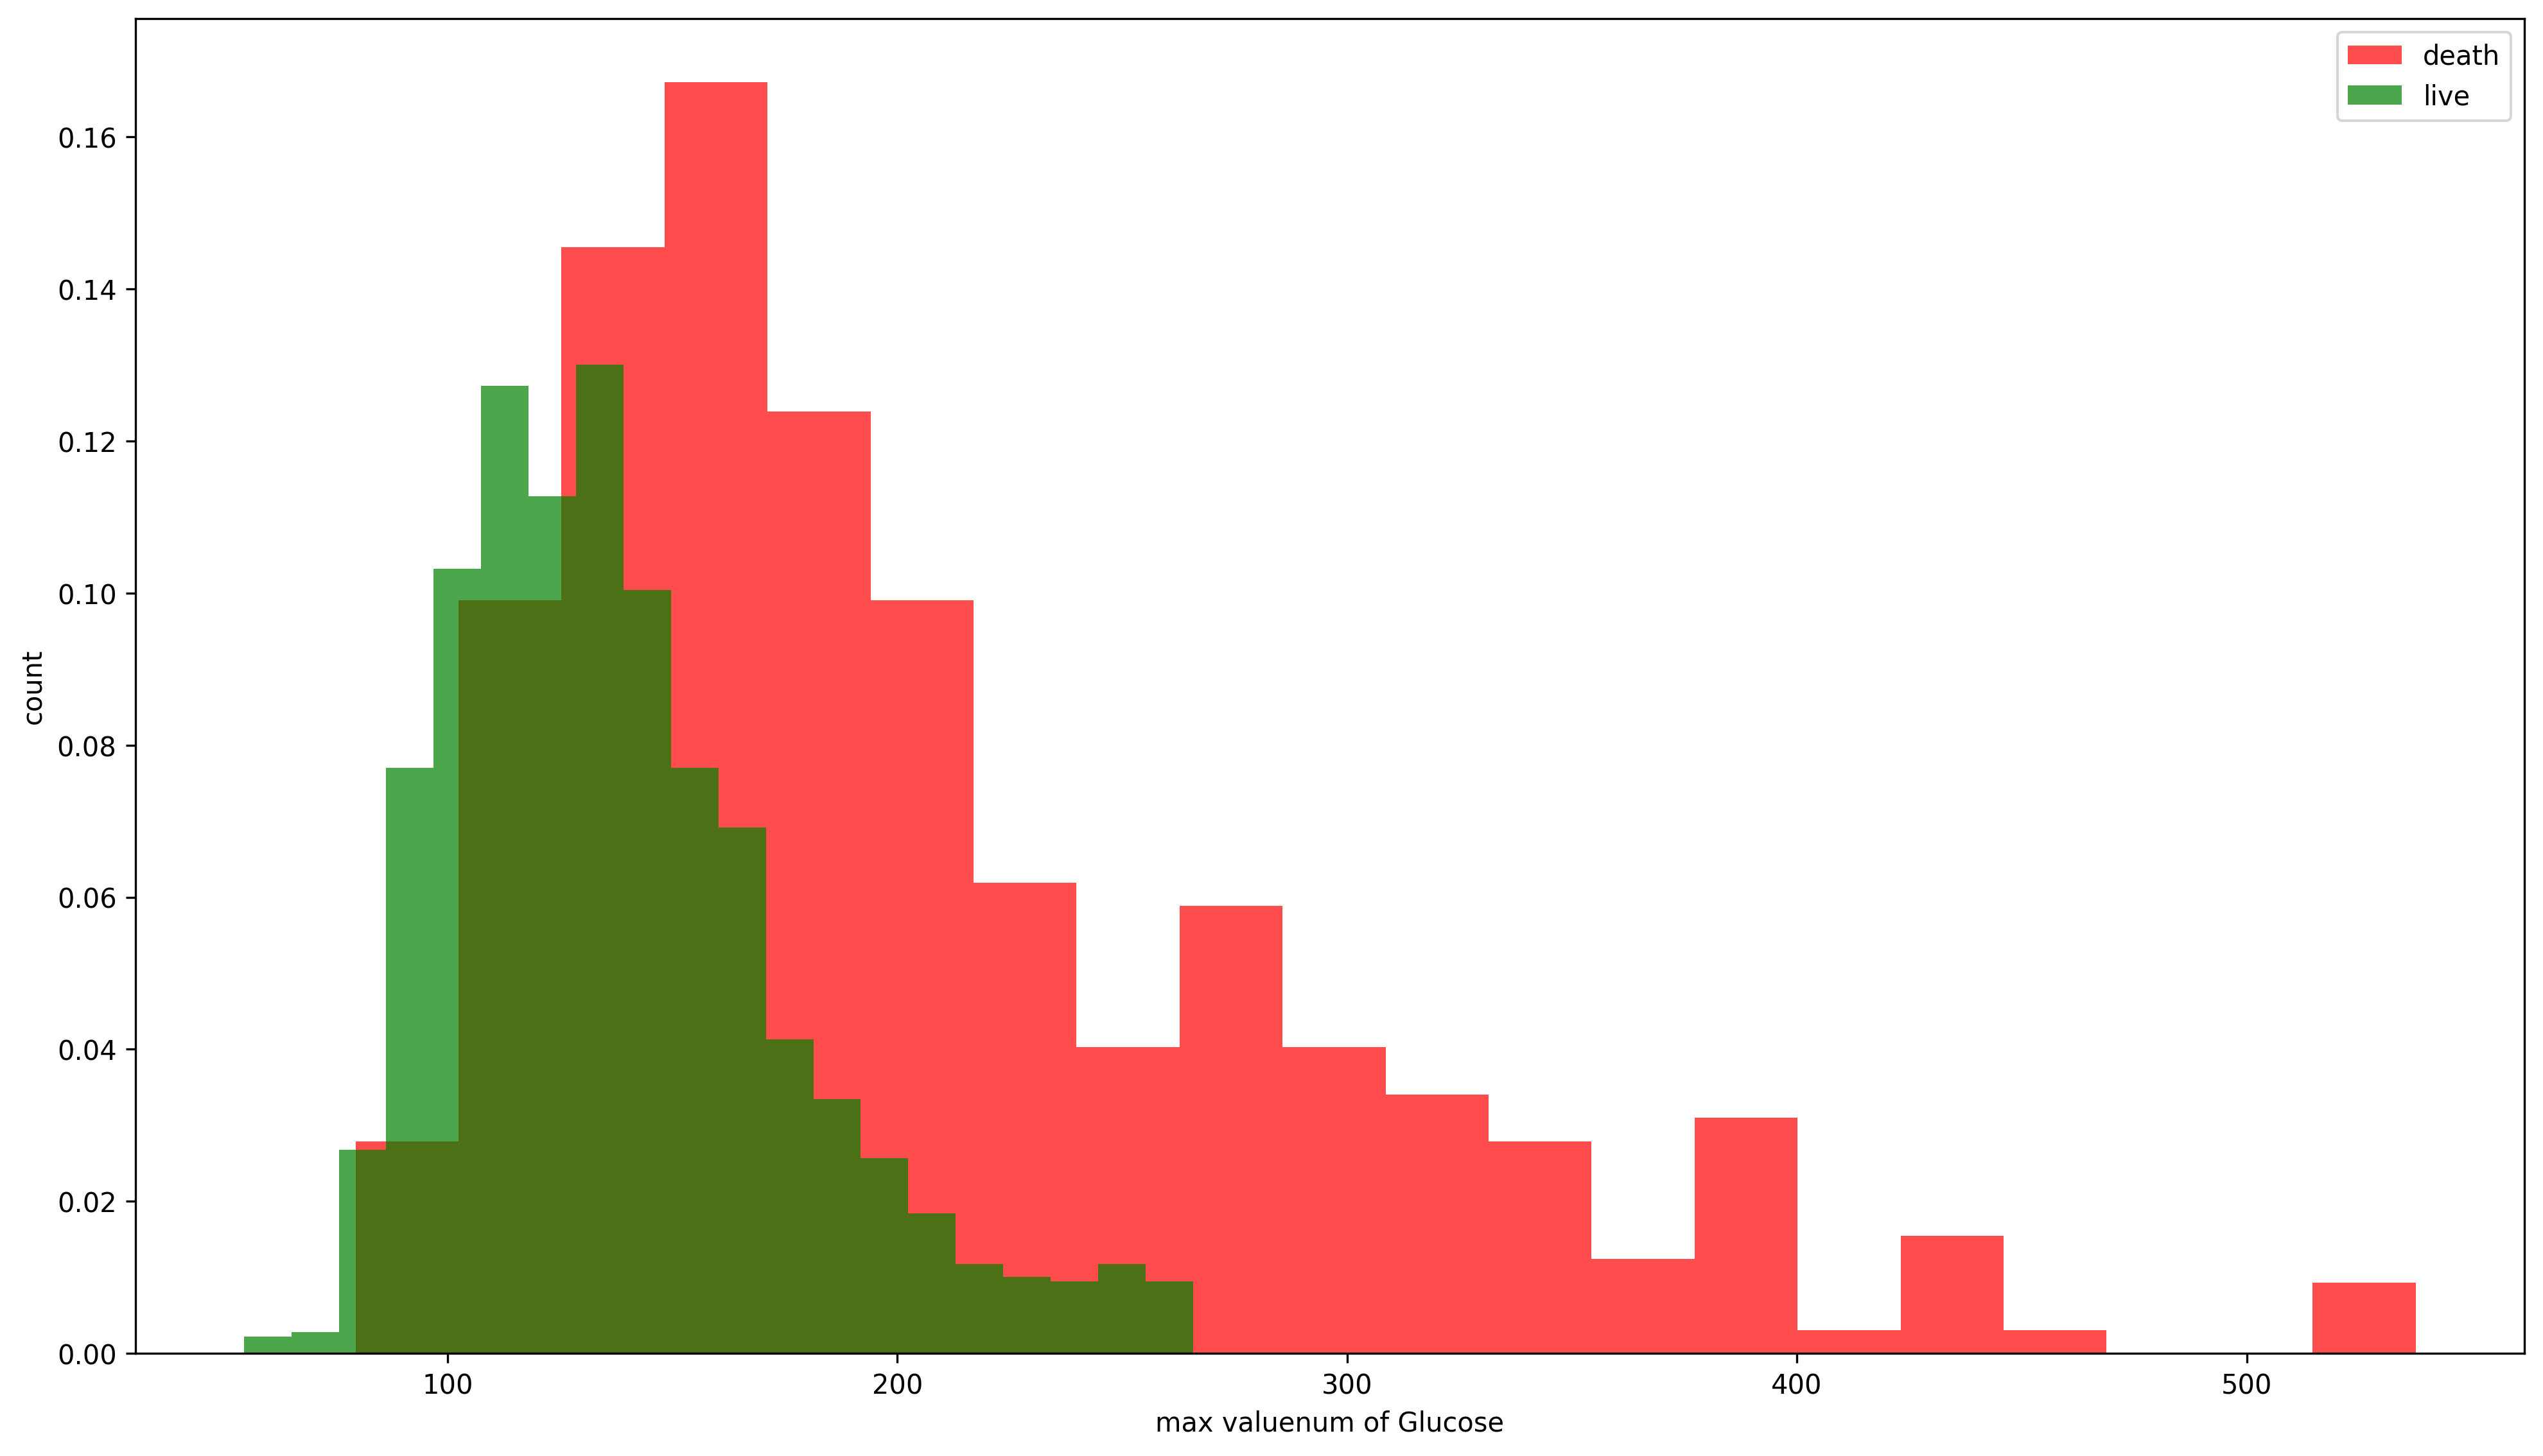

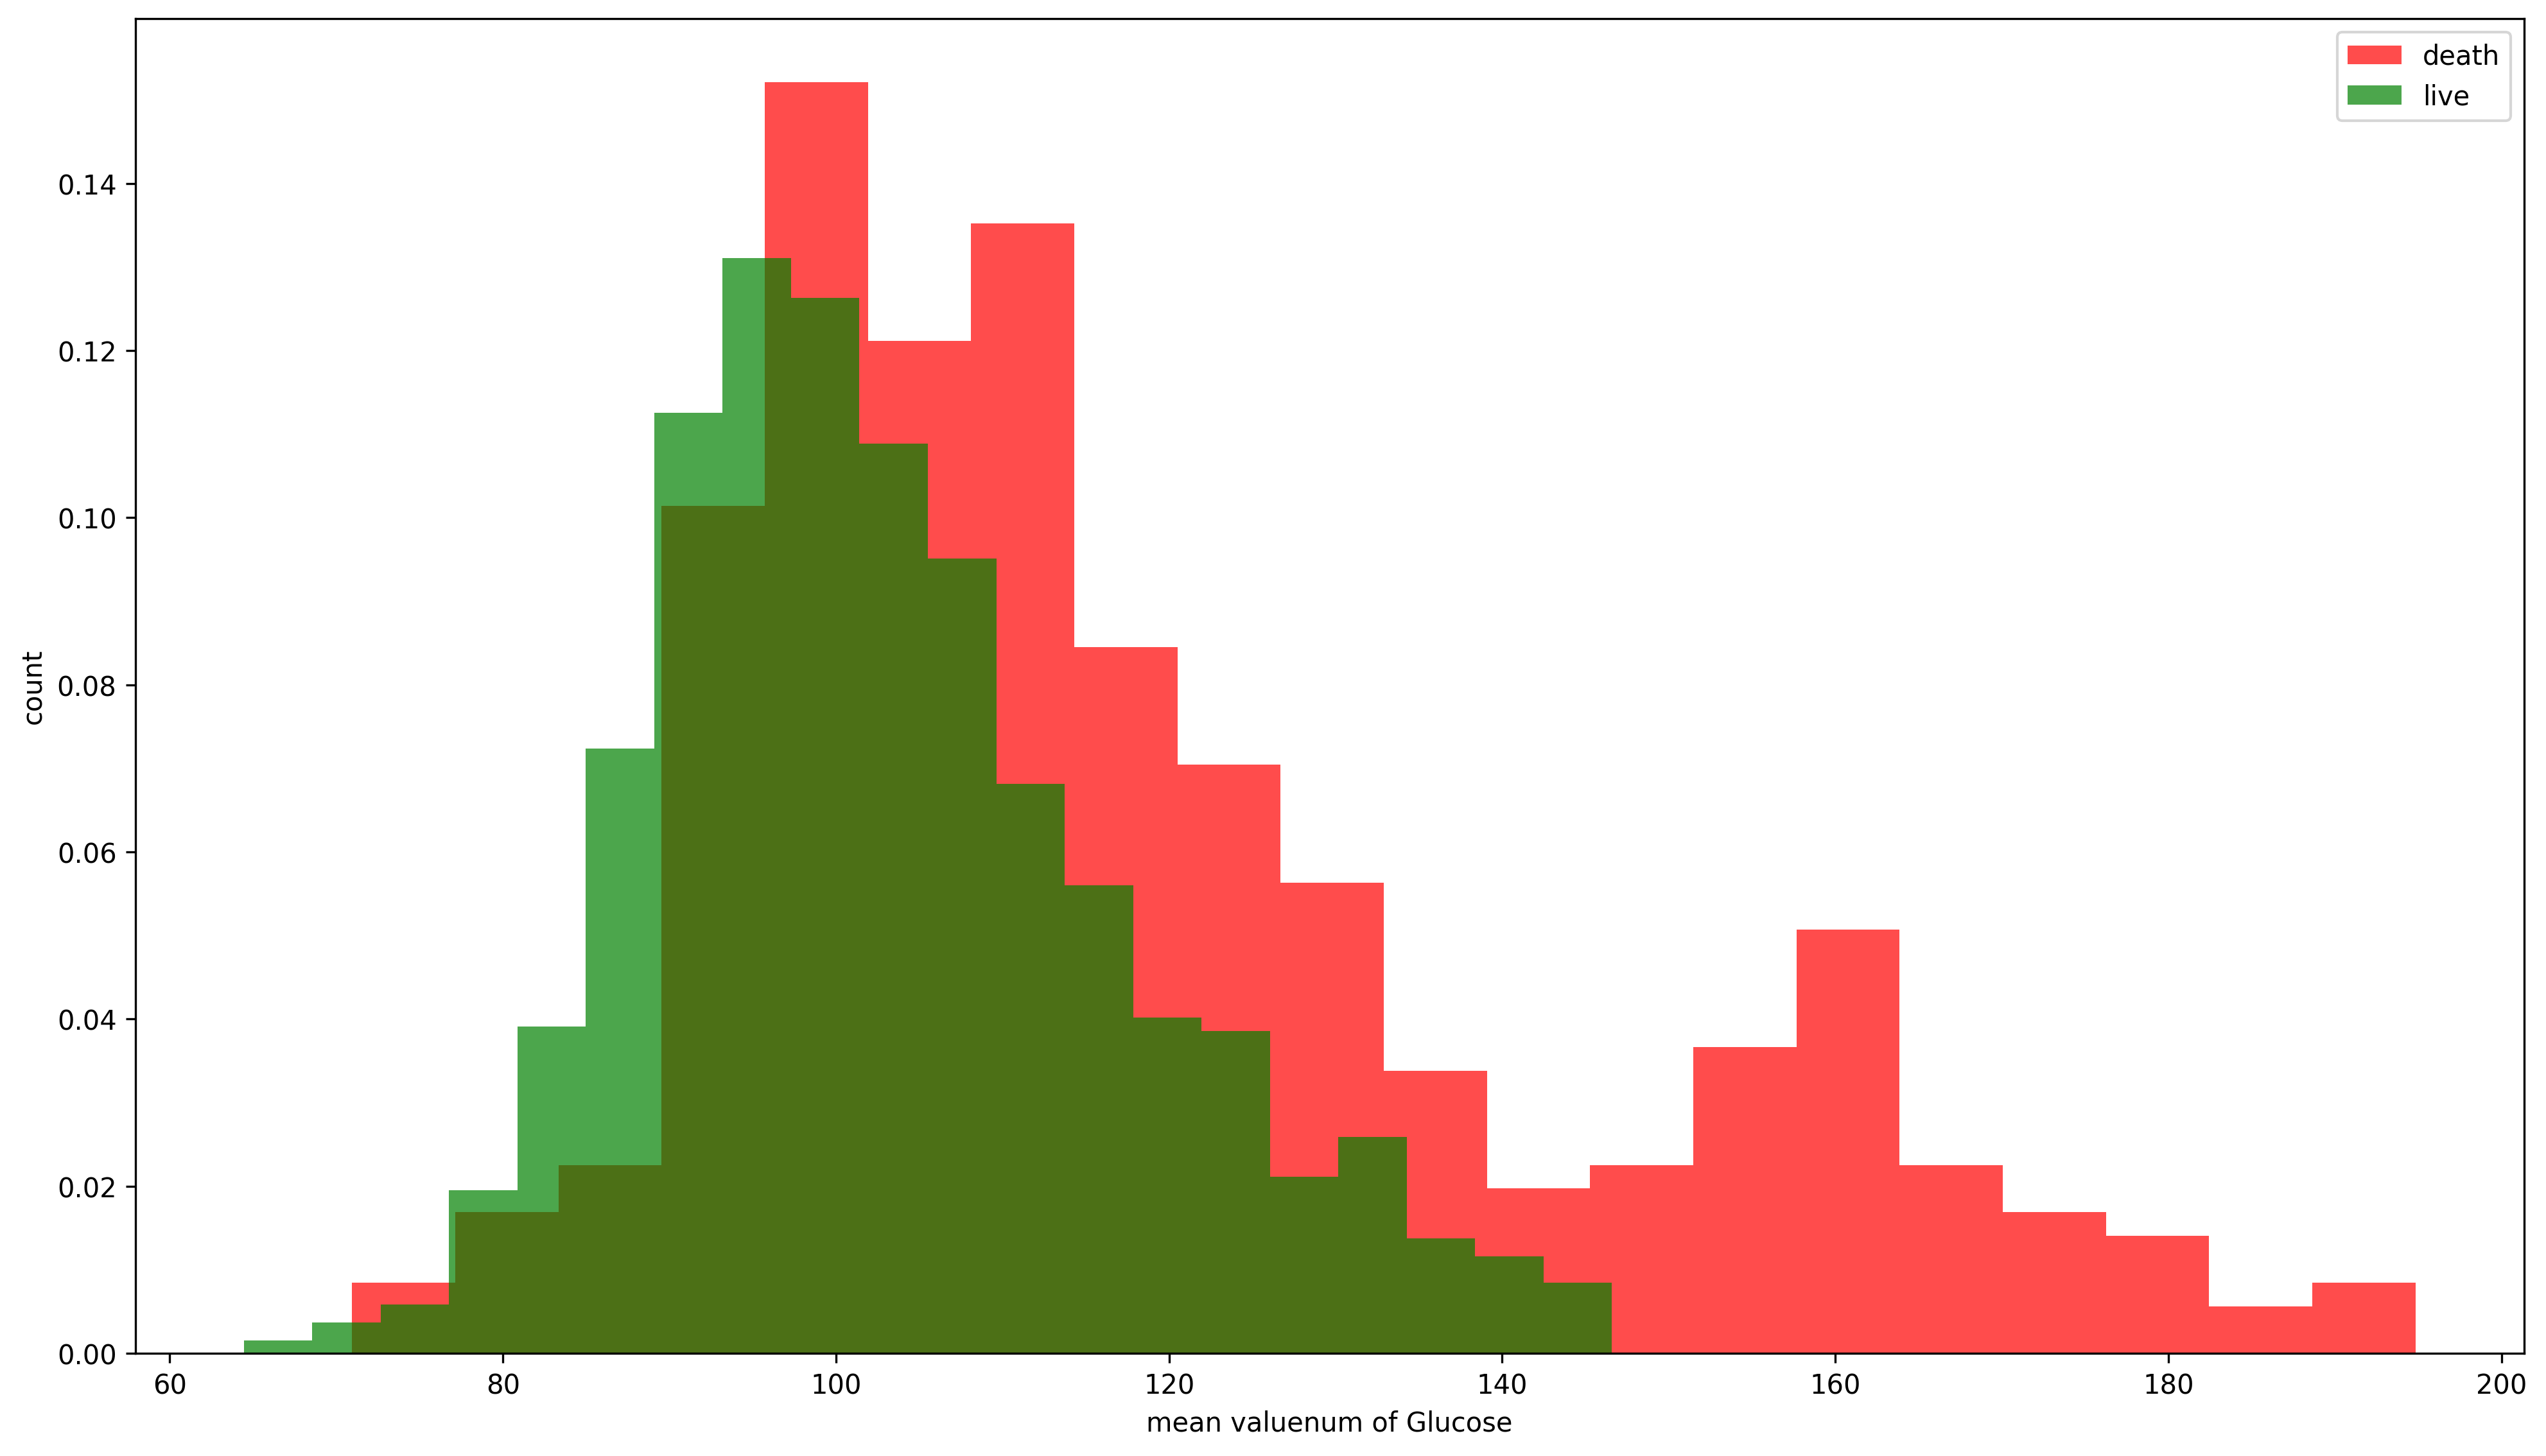

In [40]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of Glucose')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# Amylase_Death.csv

In [41]:
df = pd.read_csv(os.path.join(FILE_DIR, 'Amylase_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum valueuom  \
0    10098672  2140-10-31 06:54:00  2140-10-31 16:53:00      50.0     IU/L   
1    10303503  2144-06-19 02:25:00  2144-06-19 03:15:00      61.0     IU/L   
2    10303503  2146-02-10 07:15:00  2146-02-10 09:40:00      40.0     IU/L   
3    10303503  2146-01-04 05:45:00  2146-01-04 06:45:00      37.0     IU/L   
4    10303503  2146-07-31 08:58:00  2146-07-31 11:59:00      21.0     IU/L   

              label  dod  
0           Amylase  NaN  
1           Amylase  NaN  
2           Amylase  NaN  
3           Amylase  NaN  
4  Amylase, Ascites  NaN

In [42]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                dod
               mean   min    max count
subject_id                            
10024331       30.0  27.0   32.0     6
10056223       85.0  42.0  123.0     0
10063856       81.0  81.0   81.0     3
10085936       37.0  37.0   37.0     0
10098672       50.0  50.0   50.0     0

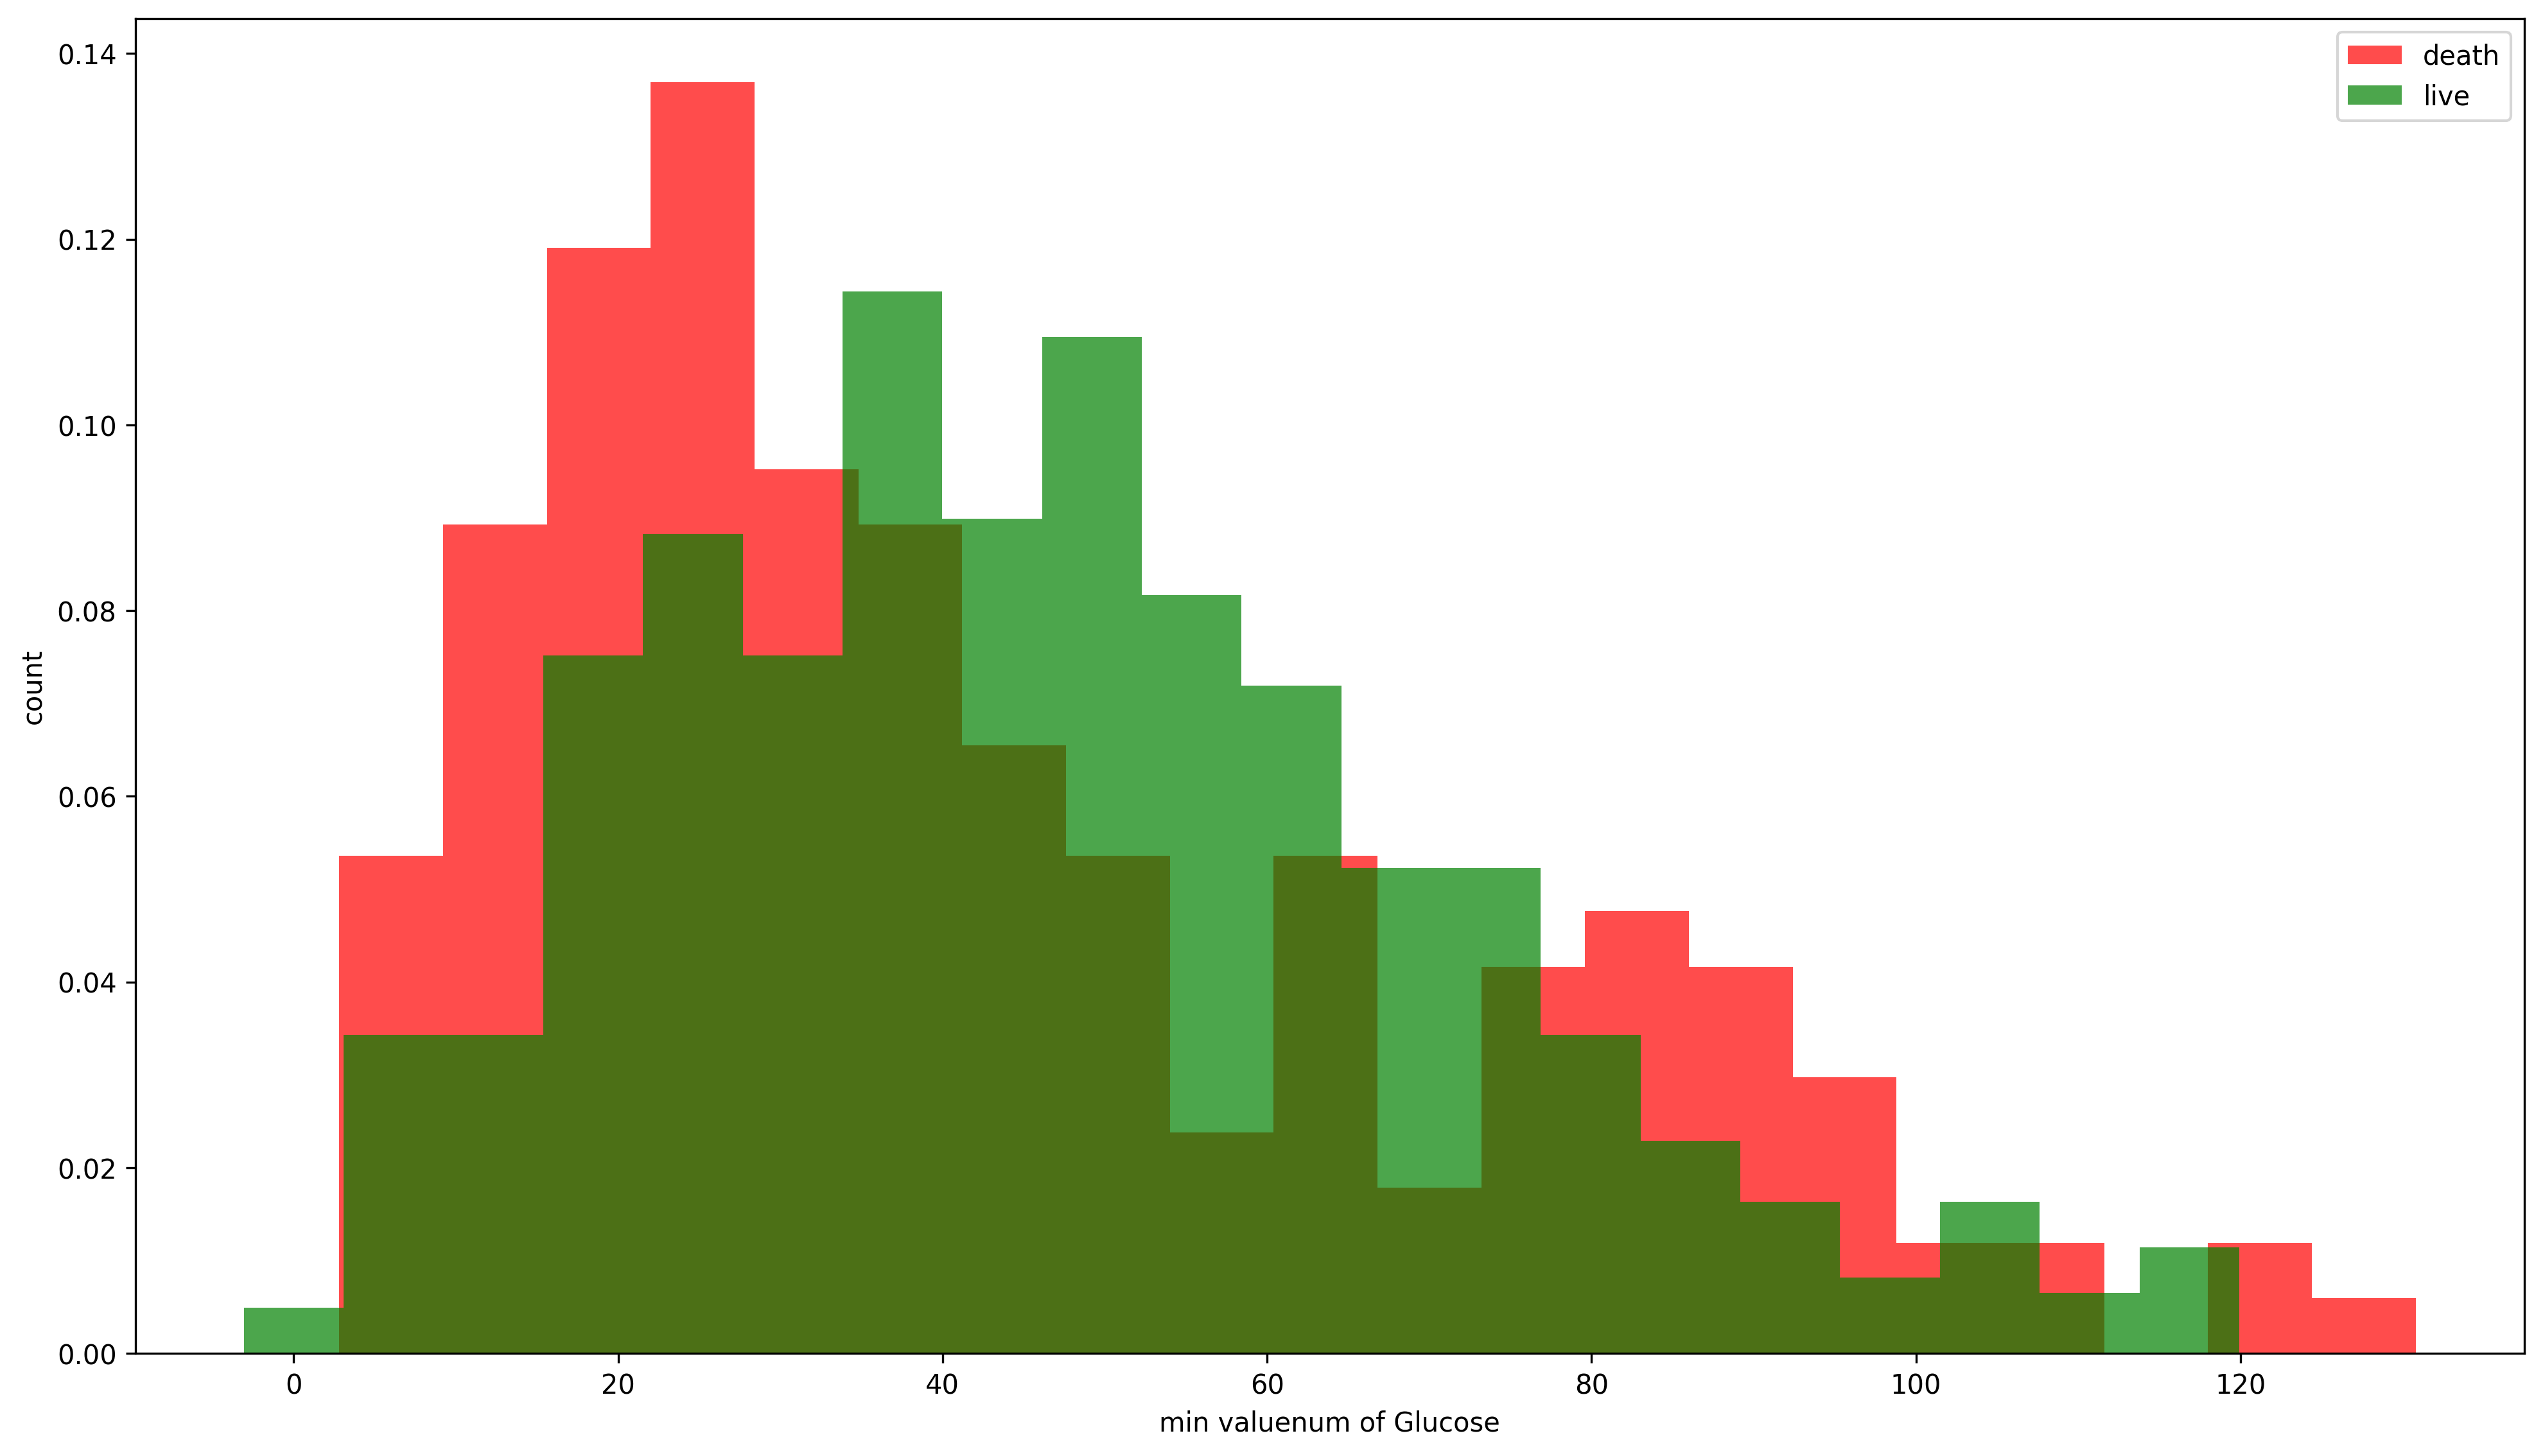

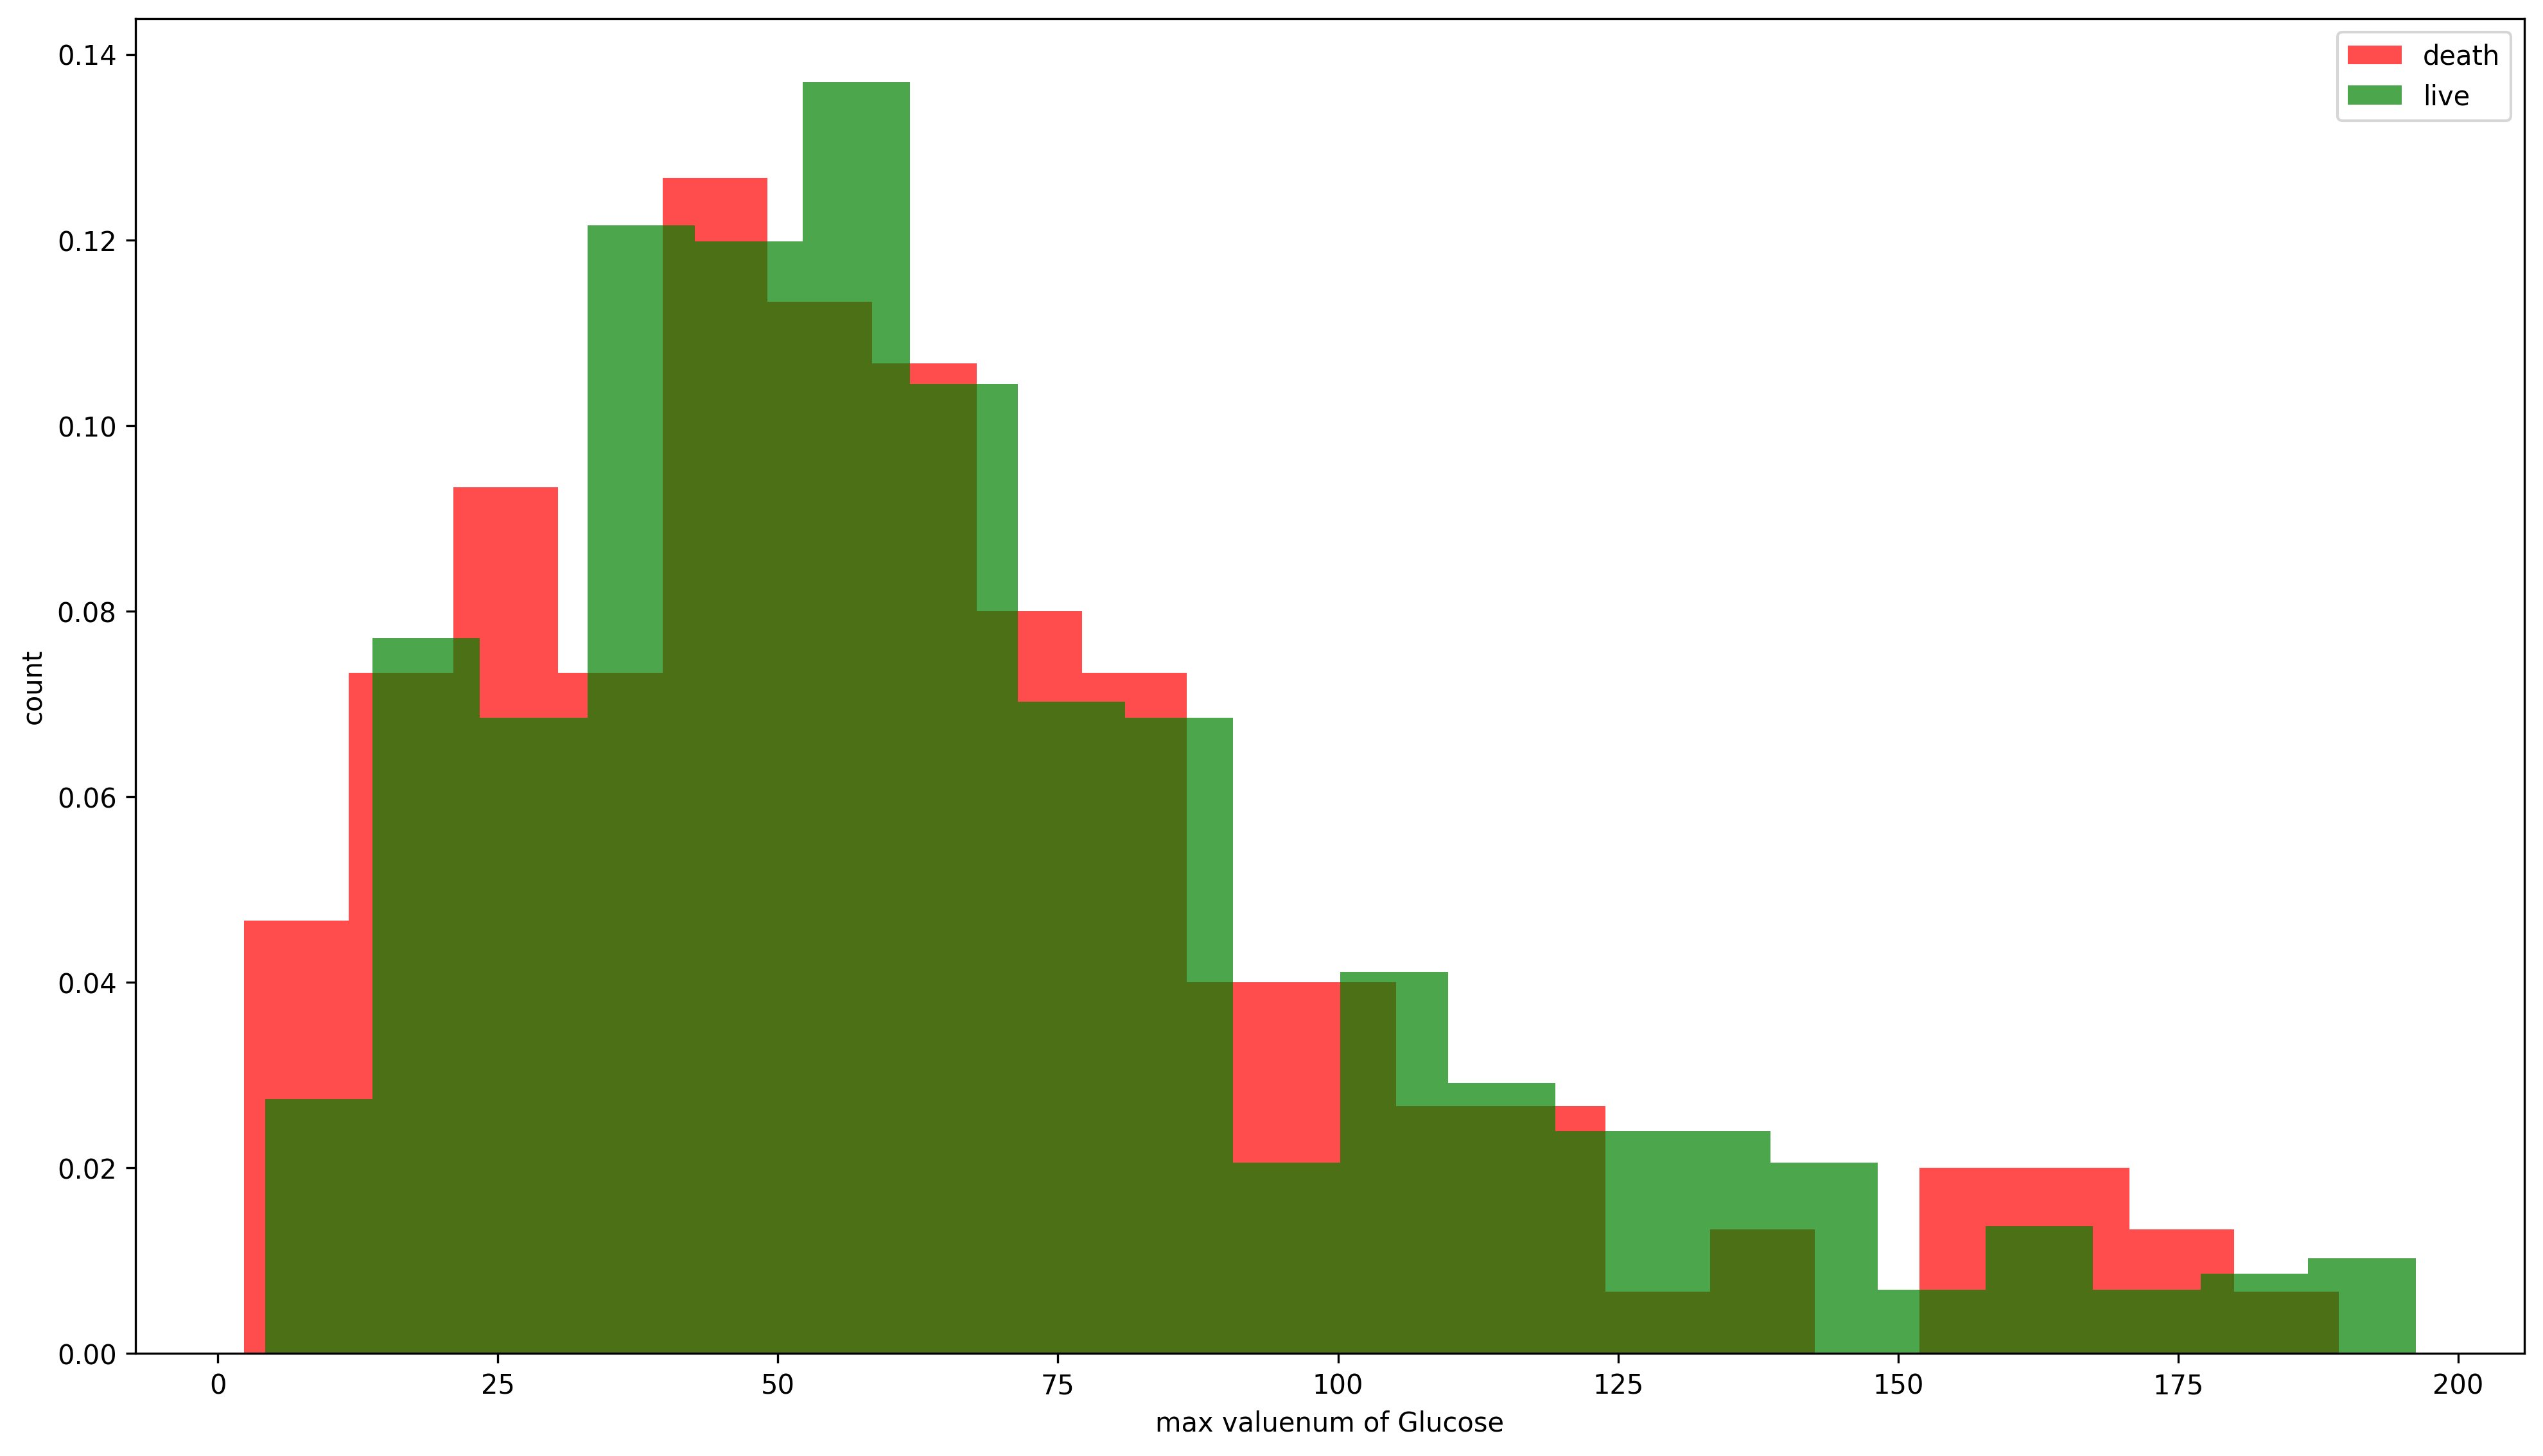

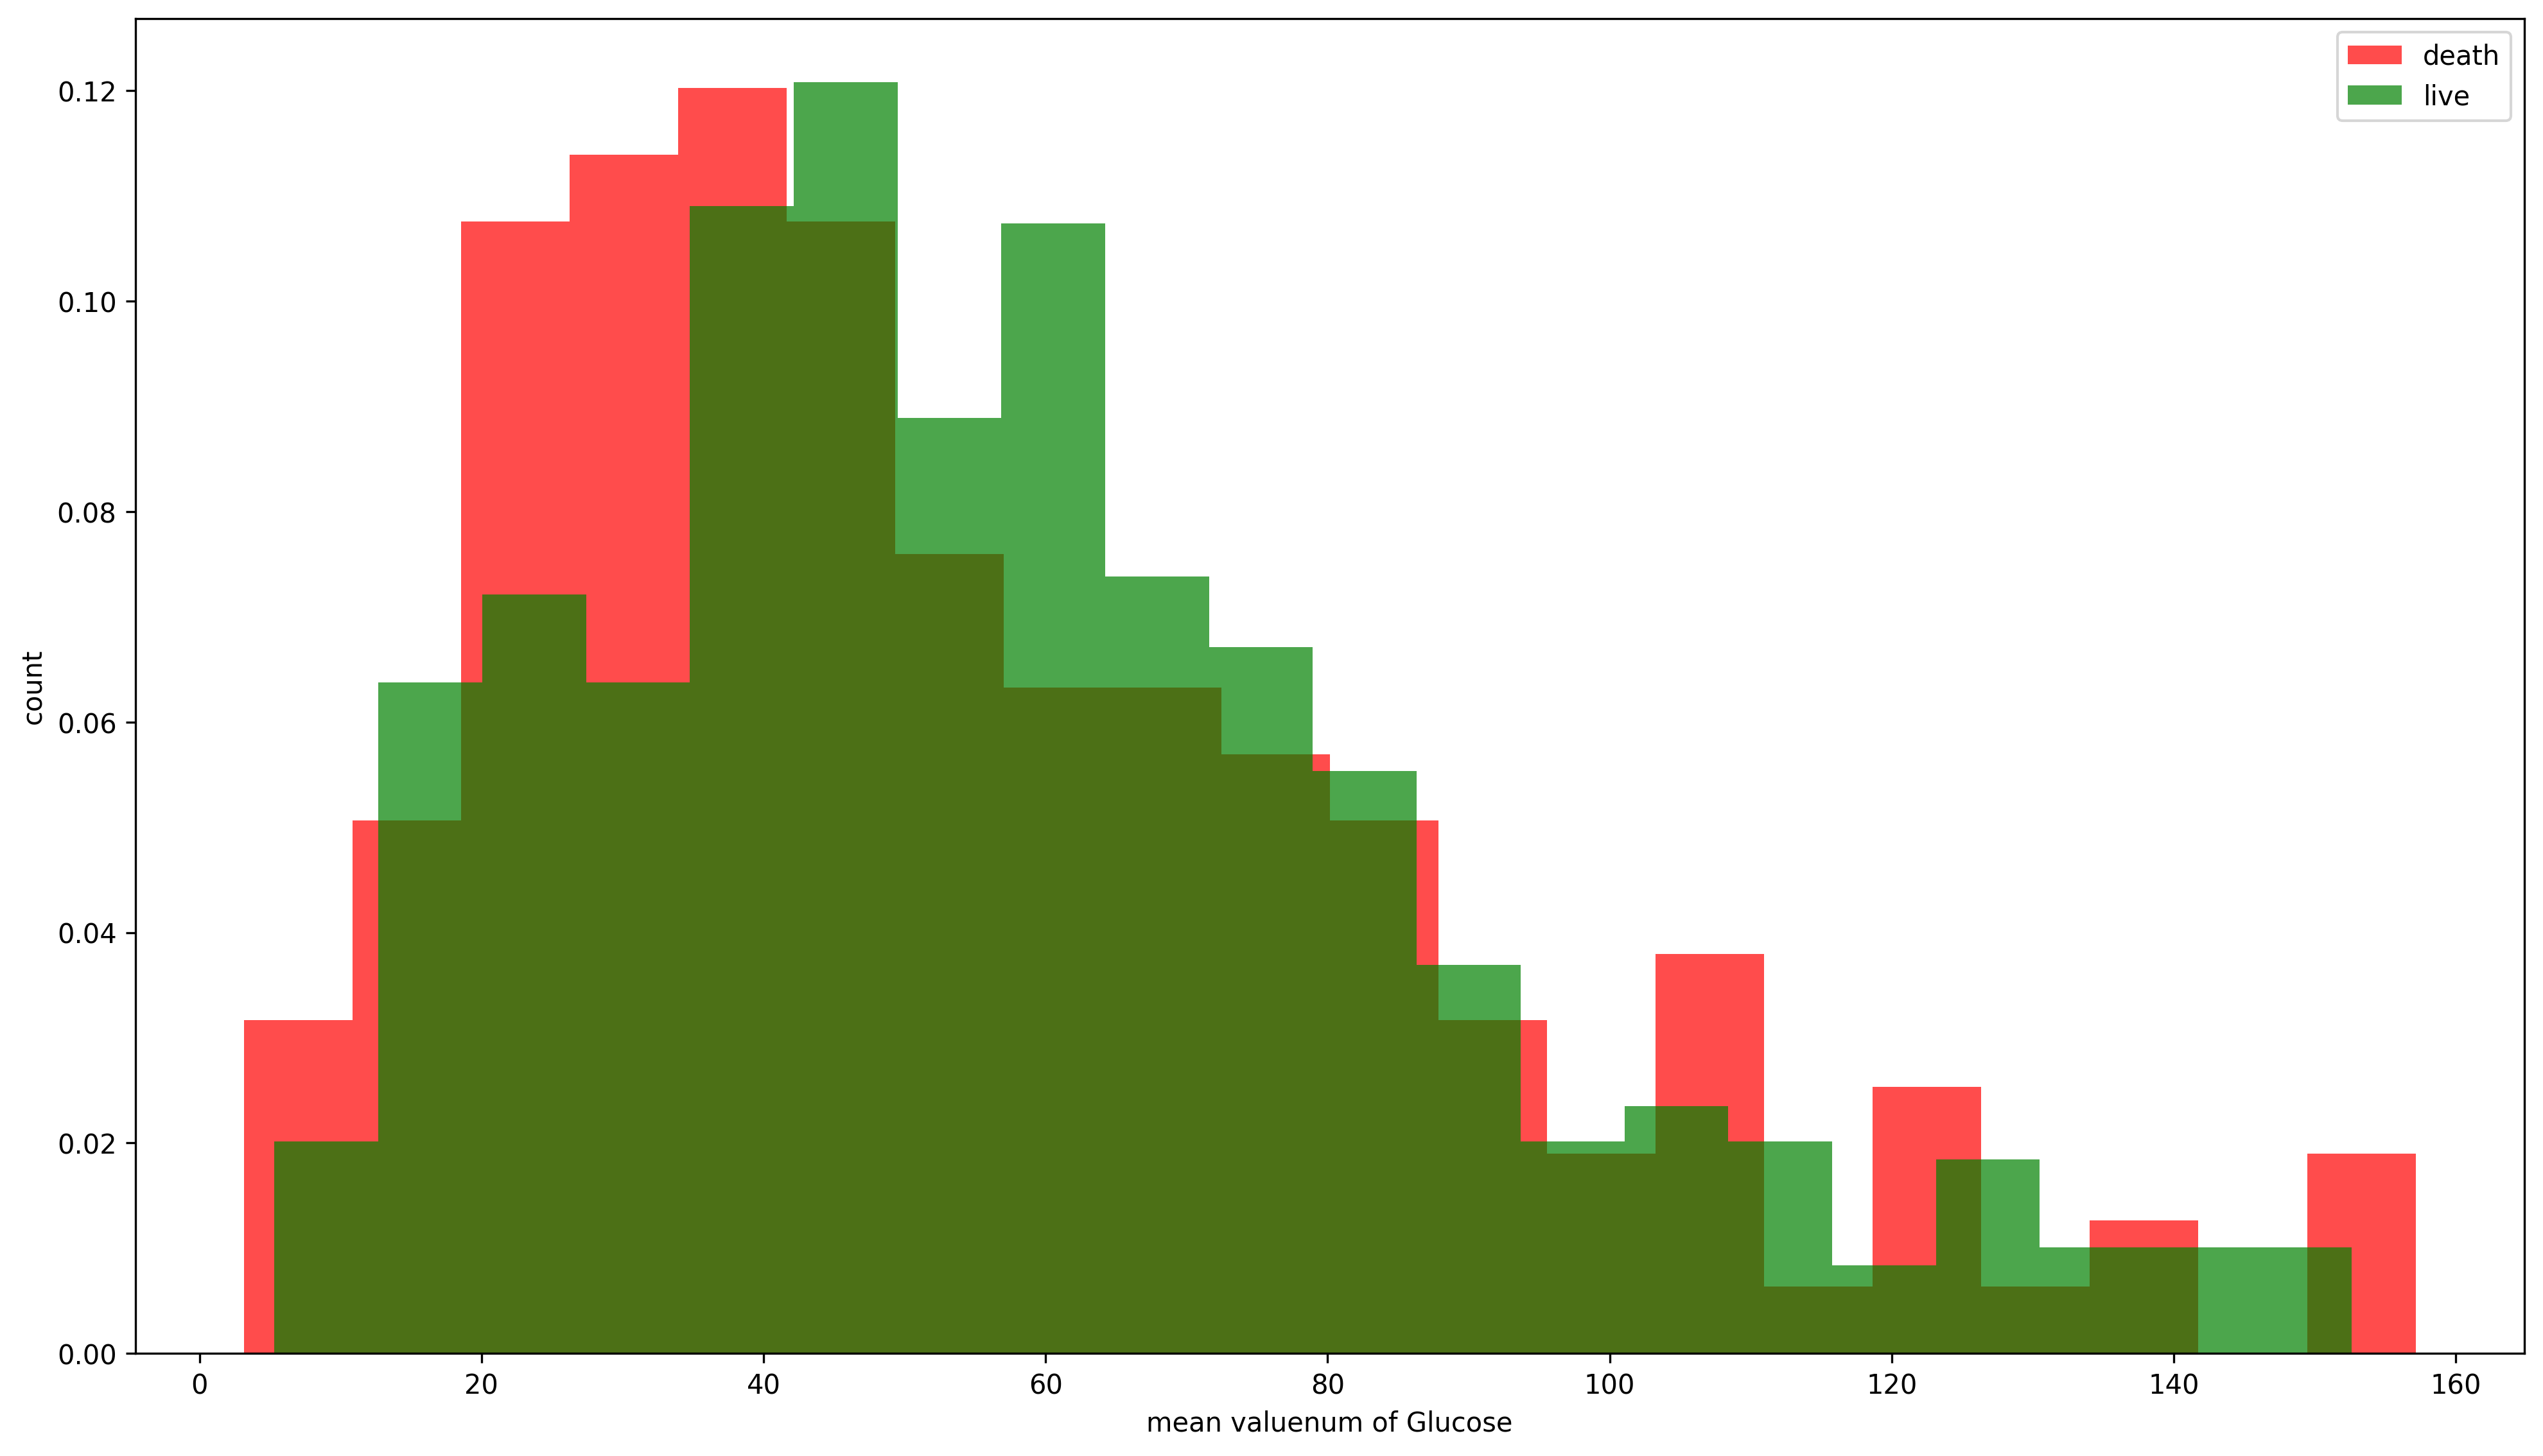

In [43]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of Glucose')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# ALT_Death.csv

In [44]:
df = pd.read_csv(os.path.join(FILE_DIR, 'ALT_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  dod
0    10098672  2140-05-19 11:25:00  2140-05-19 15:08:00      45.0  NaN
1    10098672  2140-11-14 12:48:00  2140-11-14 13:58:00      25.0  NaN
2    10098672  2142-01-20 21:00:00  2142-01-21 00:05:00       8.0  NaN
3    10098672  2142-05-15 17:18:00  2142-05-15 17:55:00      22.0  NaN
4    10098672  2141-04-14 07:55:00  2141-04-14 09:42:00      14.0  NaN

In [45]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                 dod
                  mean   min     max count
subject_id                                
10007174     15.500000  15.0    16.0     0
10018852     15.500000   9.0    22.0     0
10024331    135.340426   3.0  1130.0    94
10025647    102.782609  45.0   210.0    46
10027957     11.750000   5.0    30.0     0

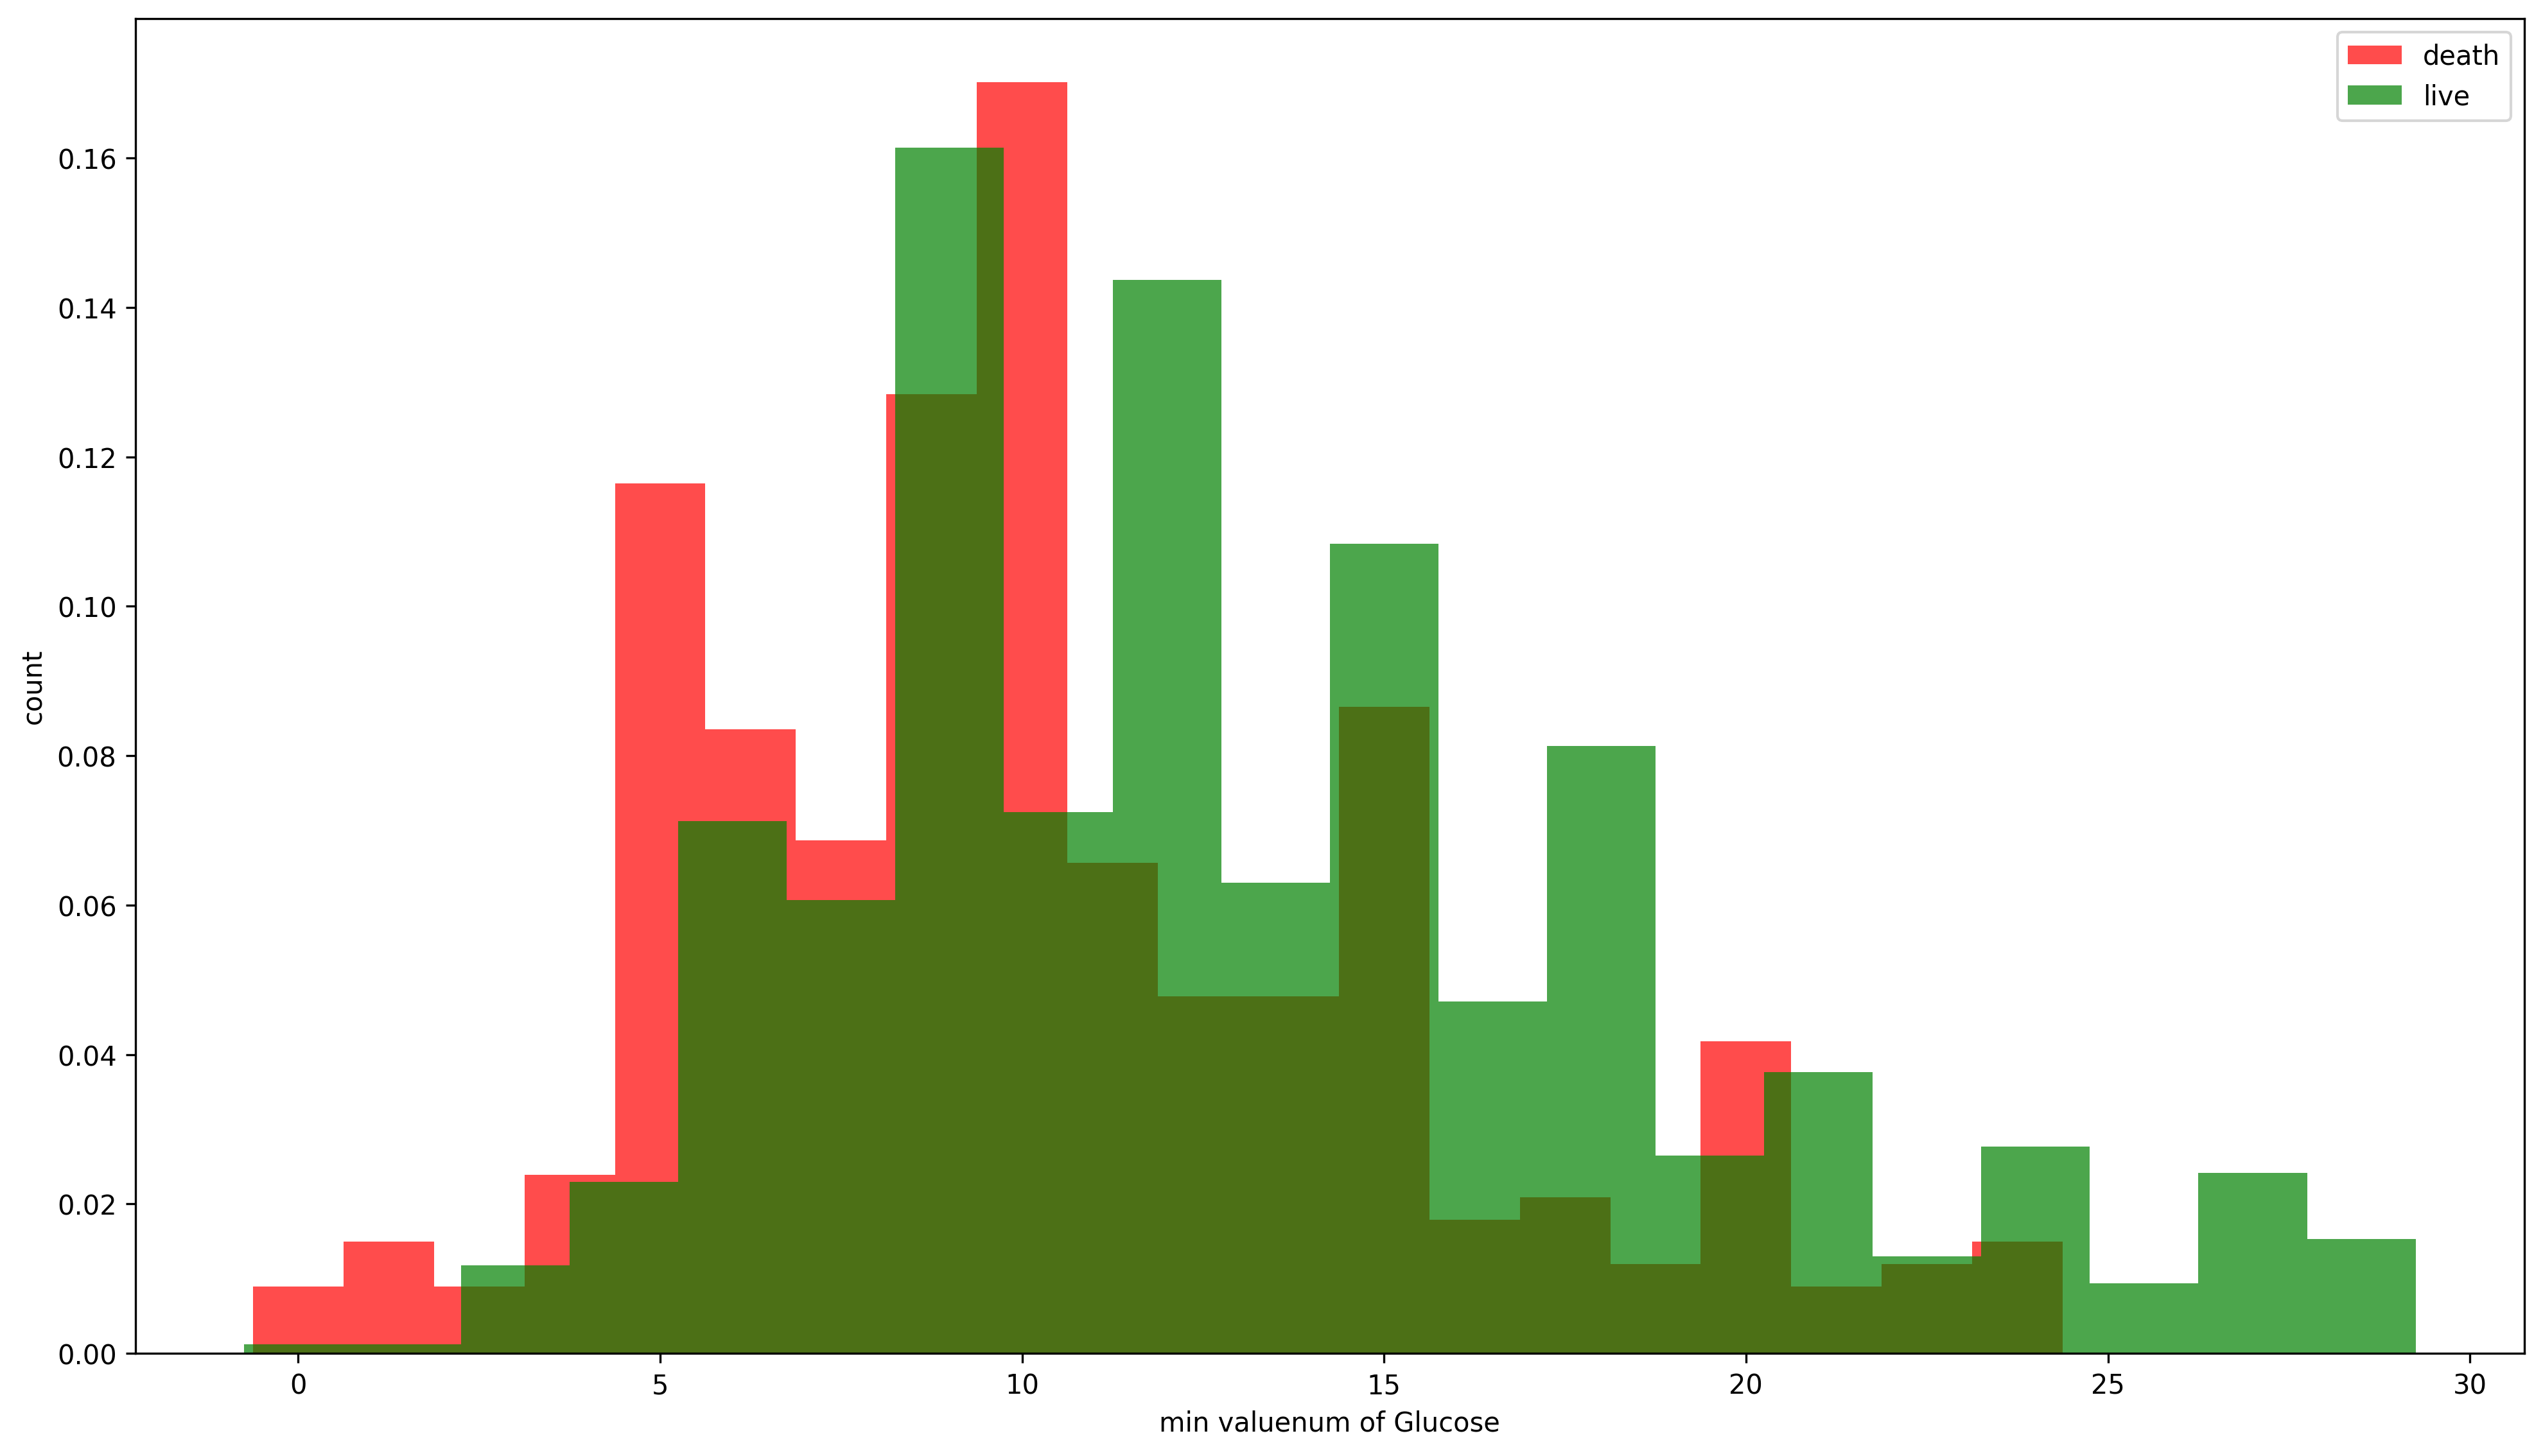

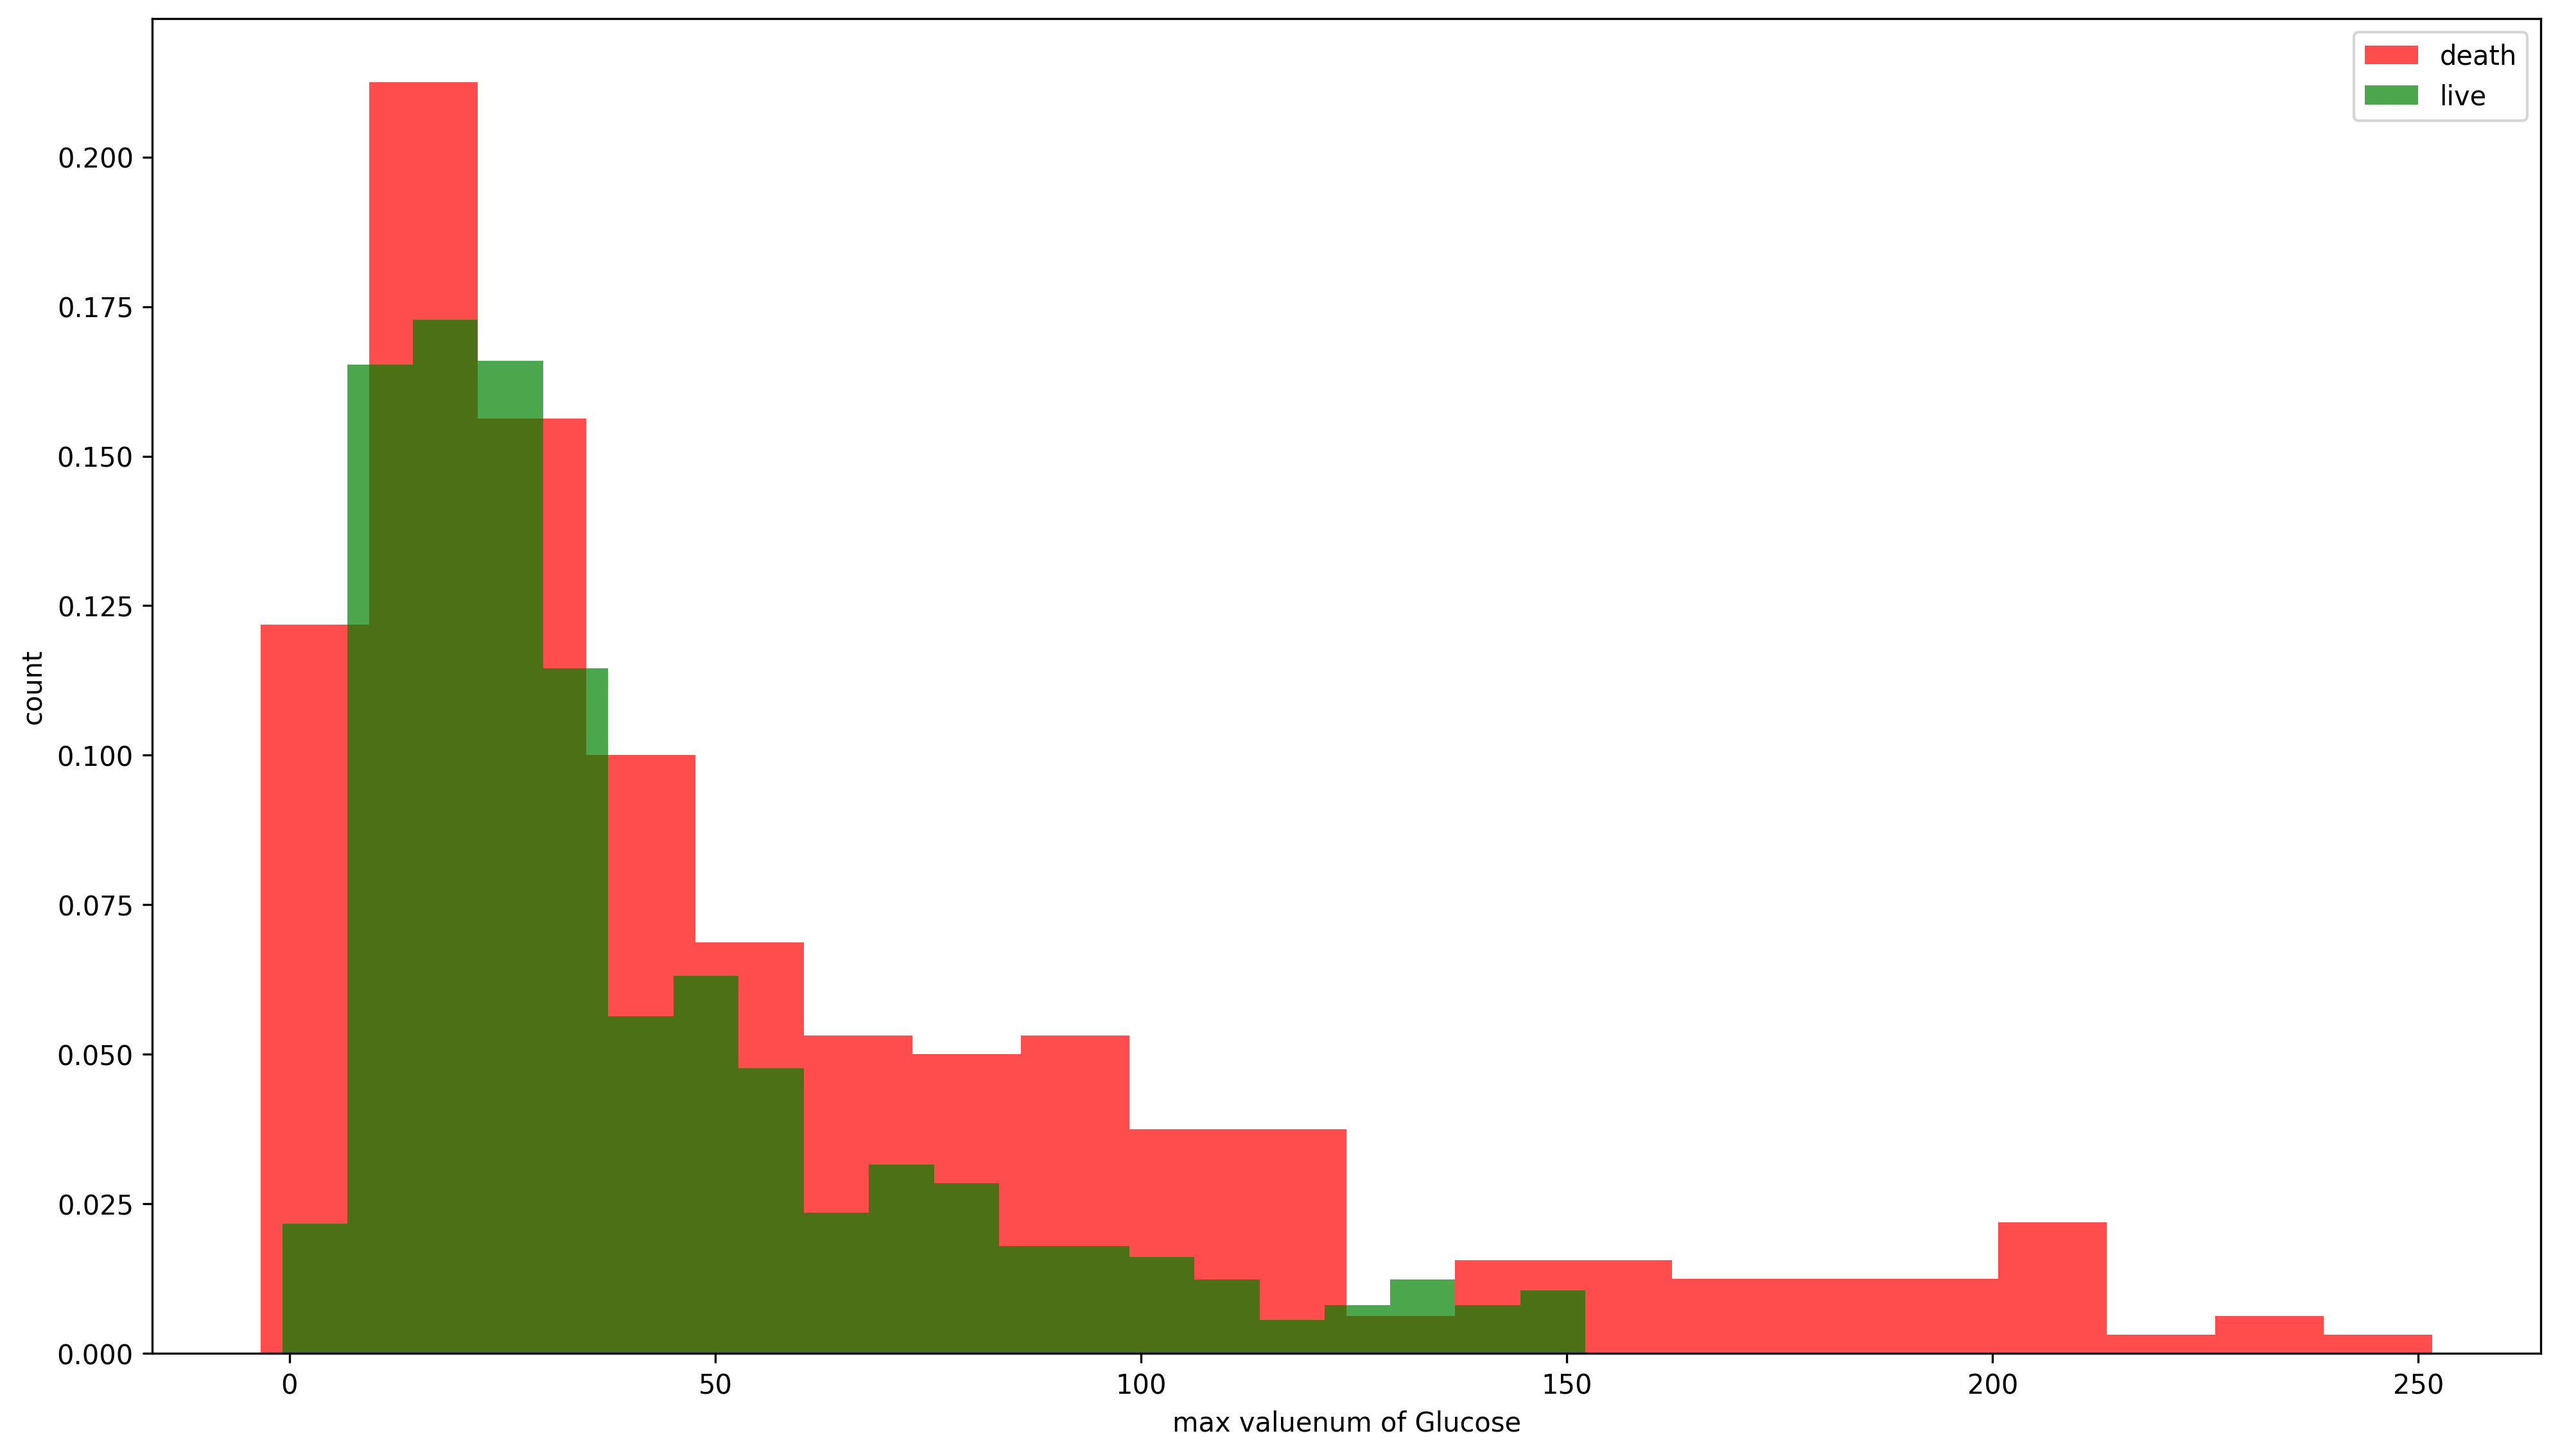

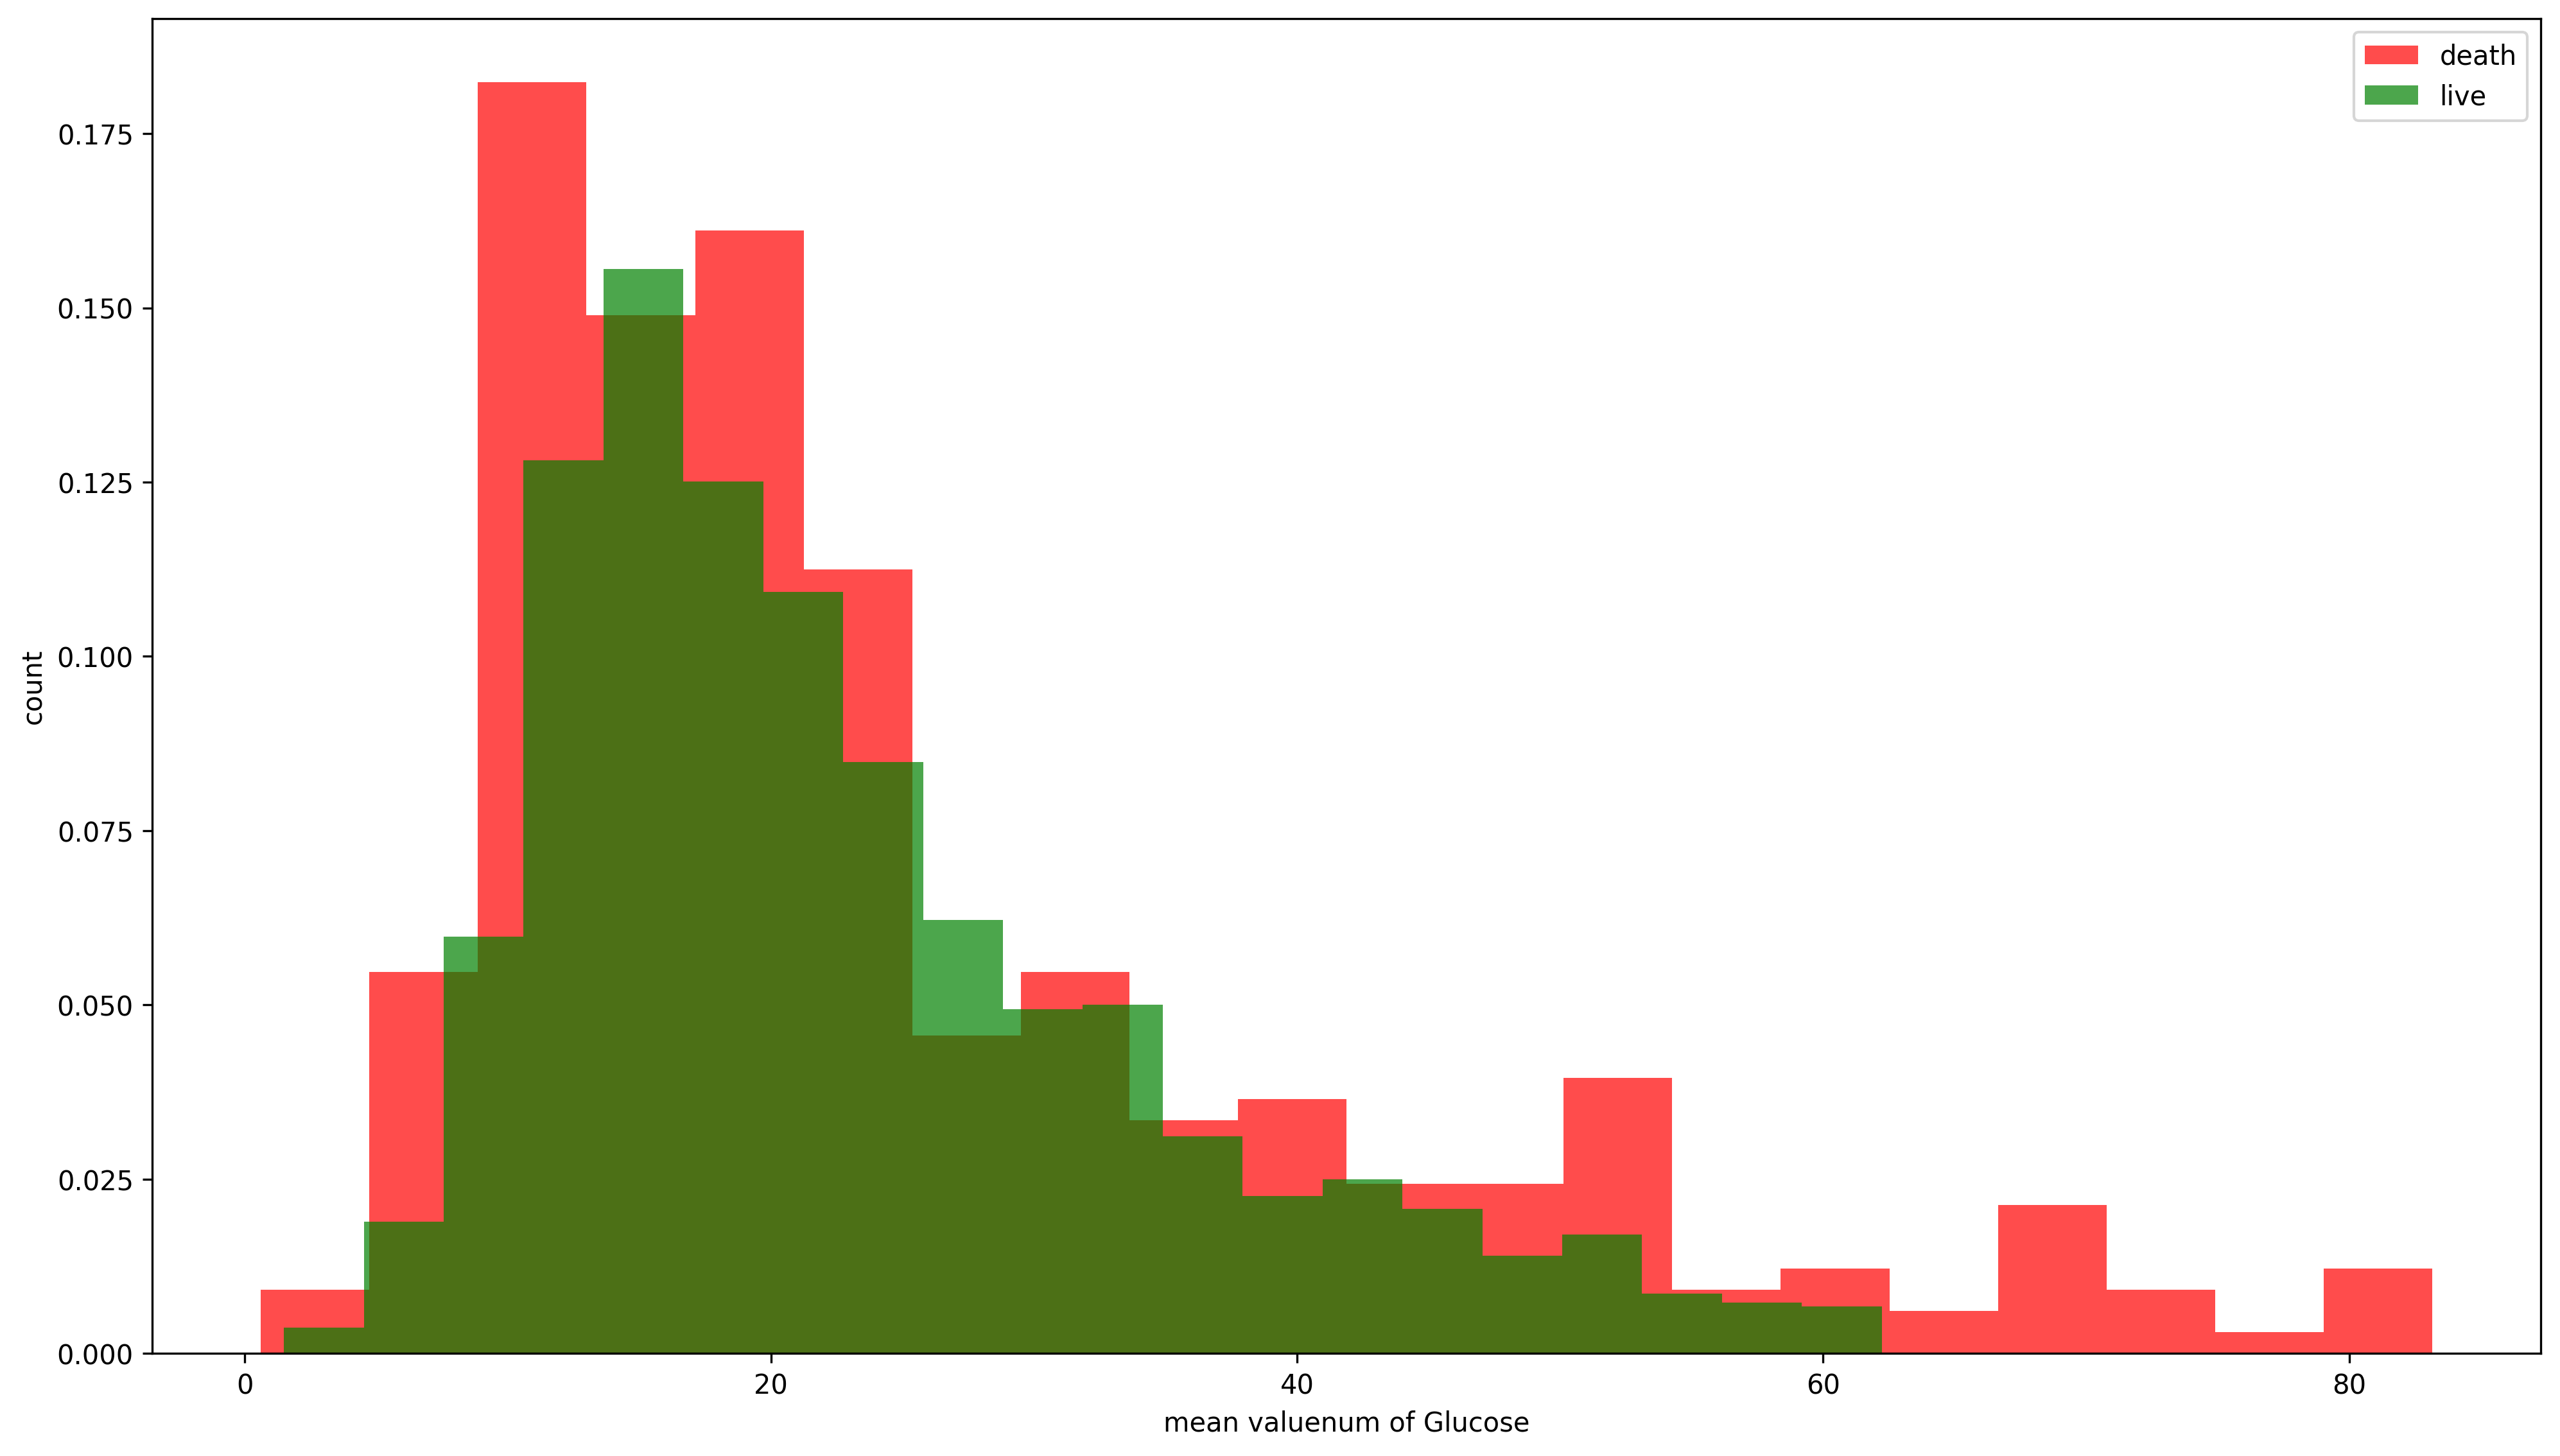

In [46]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of Glucose')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# HCT_Death.csv

In [47]:
df = pd.read_csv(os.path.join(FILE_DIR, 'HCT_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  \
0    10098672  2142-01-20 20:10:00  2142-01-20 20:31:00      43.0   
1    10098672  2142-05-06 15:37:00  2142-05-06 15:42:00      31.0   
2    10098672  2142-05-06 16:37:00  2142-05-06 16:39:00      29.0   
3    10098672  2142-05-06 18:01:00  2142-05-06 18:03:00      30.0   
4    10098672  2140-05-19 11:25:00  2140-05-19 14:19:00      40.5   

                    label    category  dod  
0  Hematocrit, Calculated   Blood Gas  NaN  
1  Hematocrit, Calculated   Blood Gas  NaN  
2  Hematocrit, Calculated   Blood Gas  NaN  
3  Hematocrit, Calculated   Blood Gas  NaN  
4              Hematocrit  Hematology  NaN

In [48]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum               dod
                 mean   min   max count
subject_id                             
10001186    33.400000  30.1  39.1     0
10007174    33.780000  28.8  44.4     0
10018852    31.213333  22.2  49.6     0
10024331    31.409402  25.4  37.3   234
10025647    34.317722  26.4  41.9   158

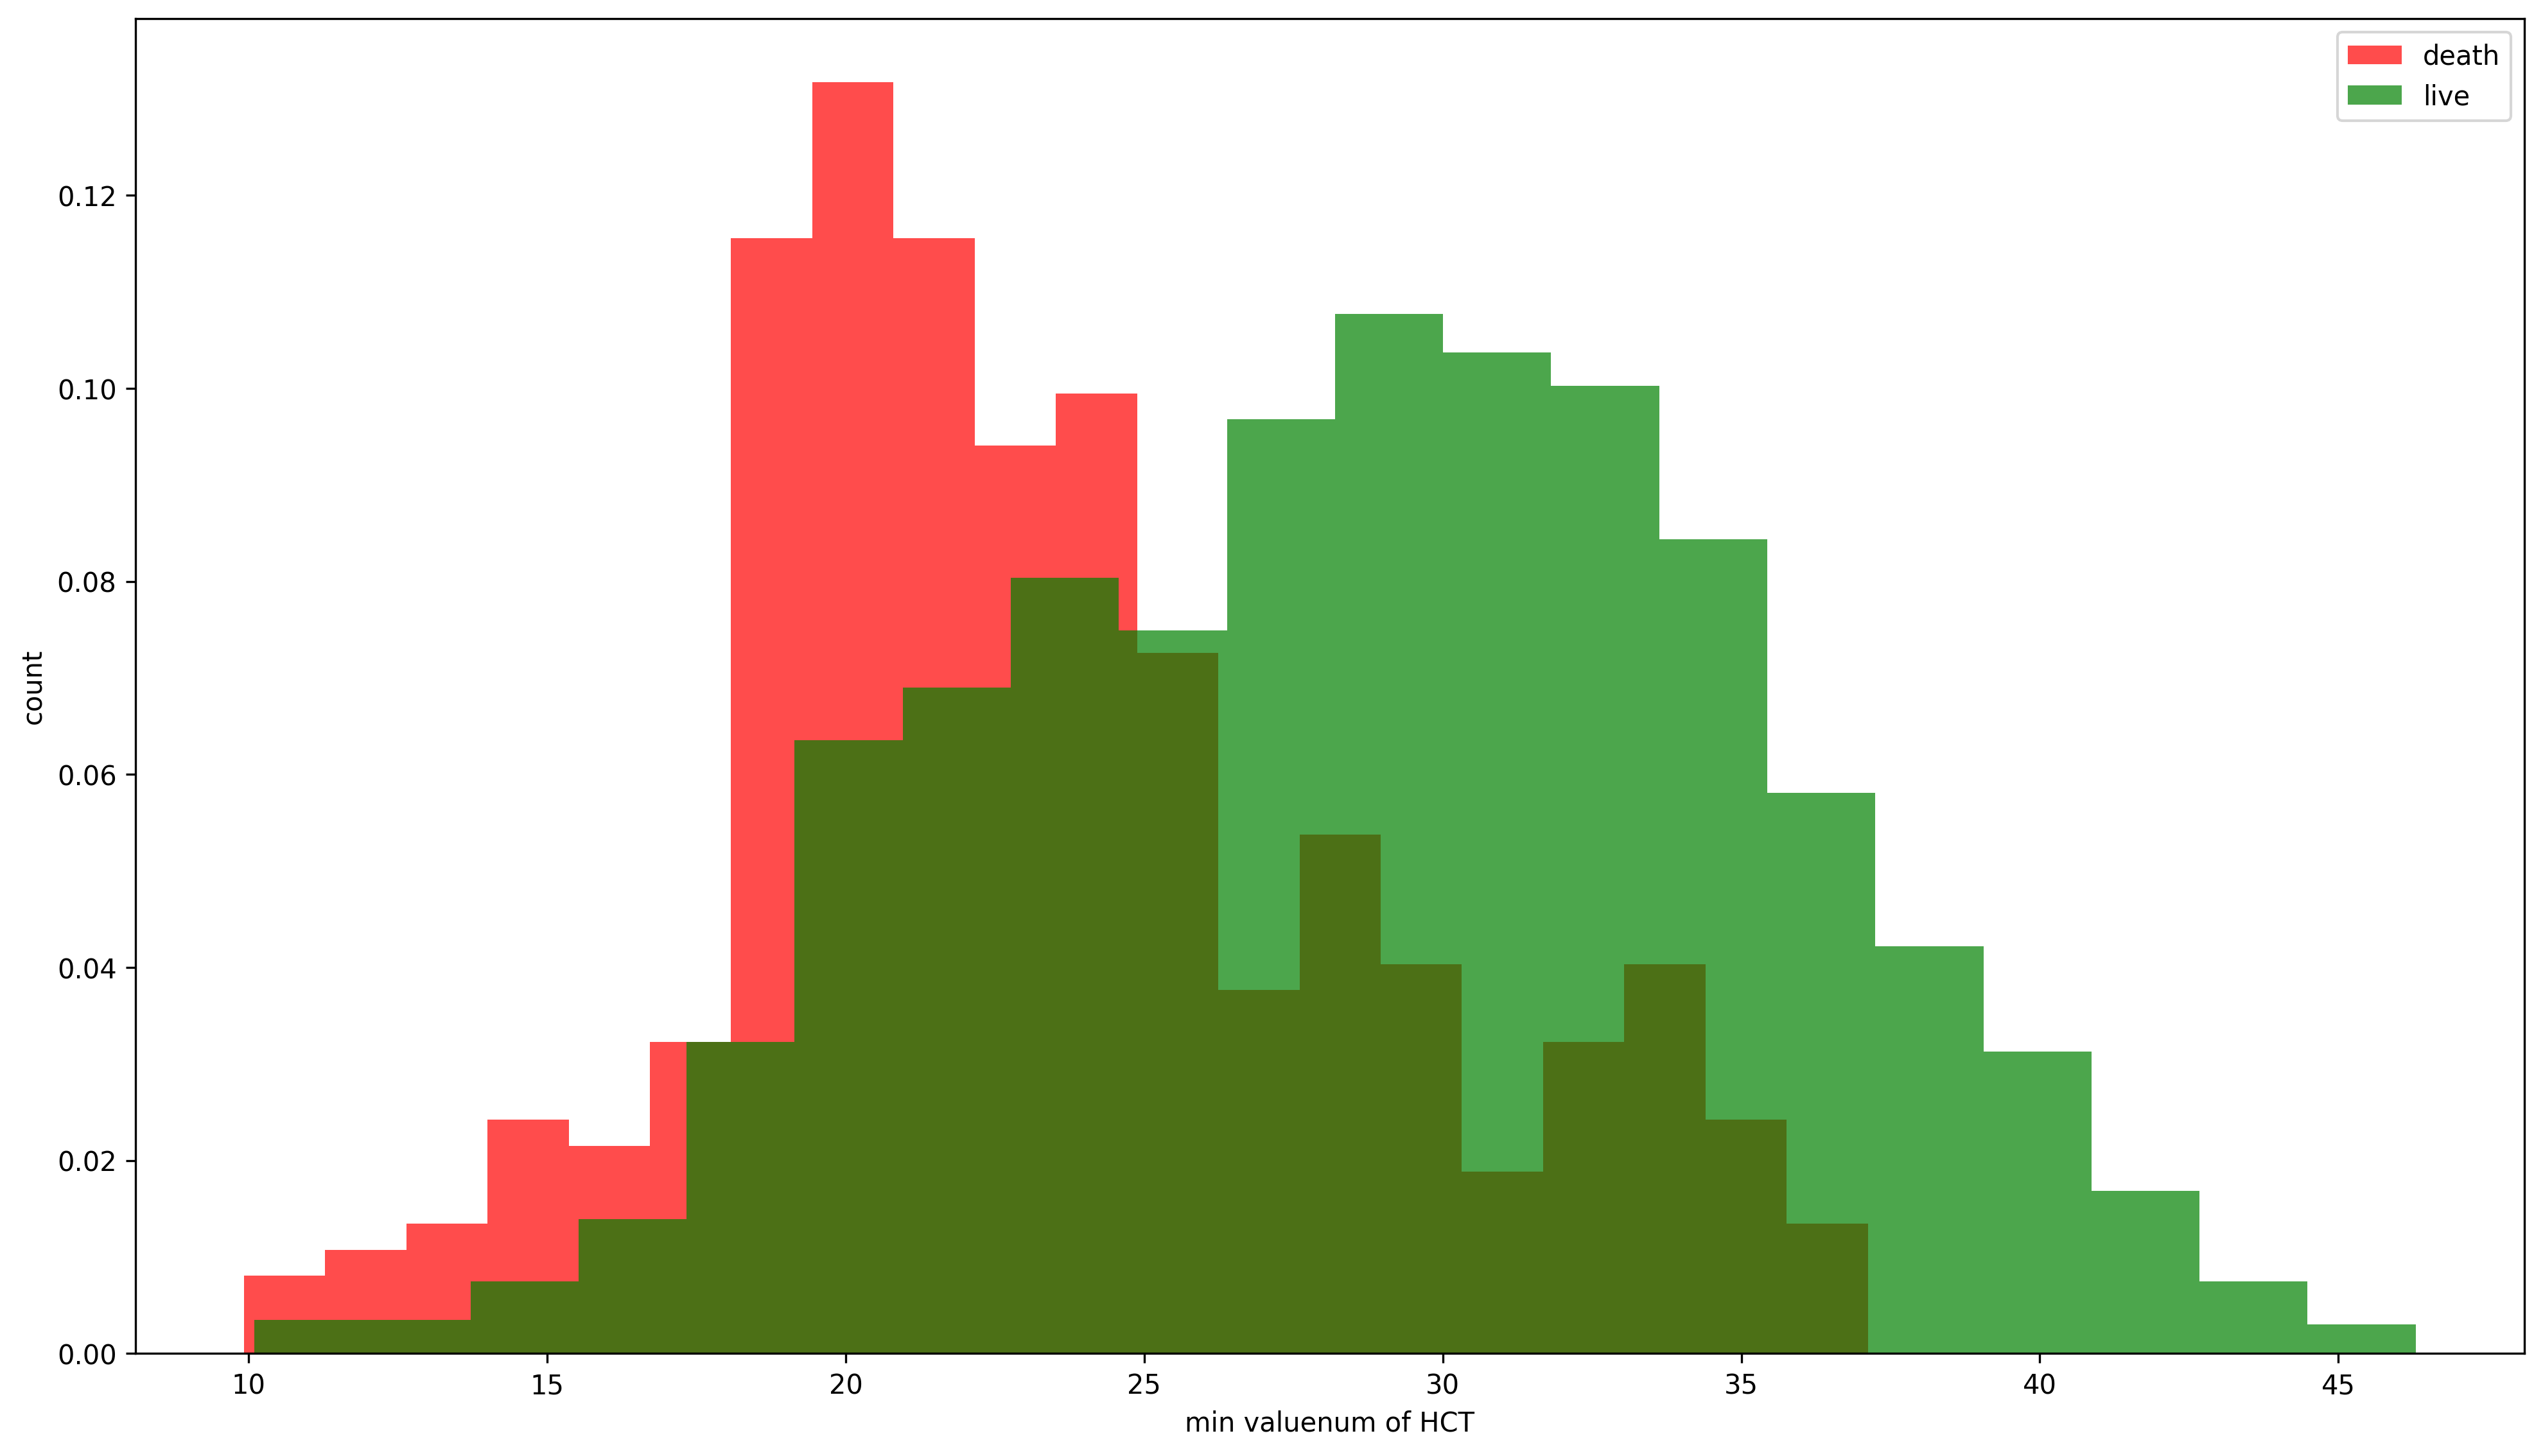

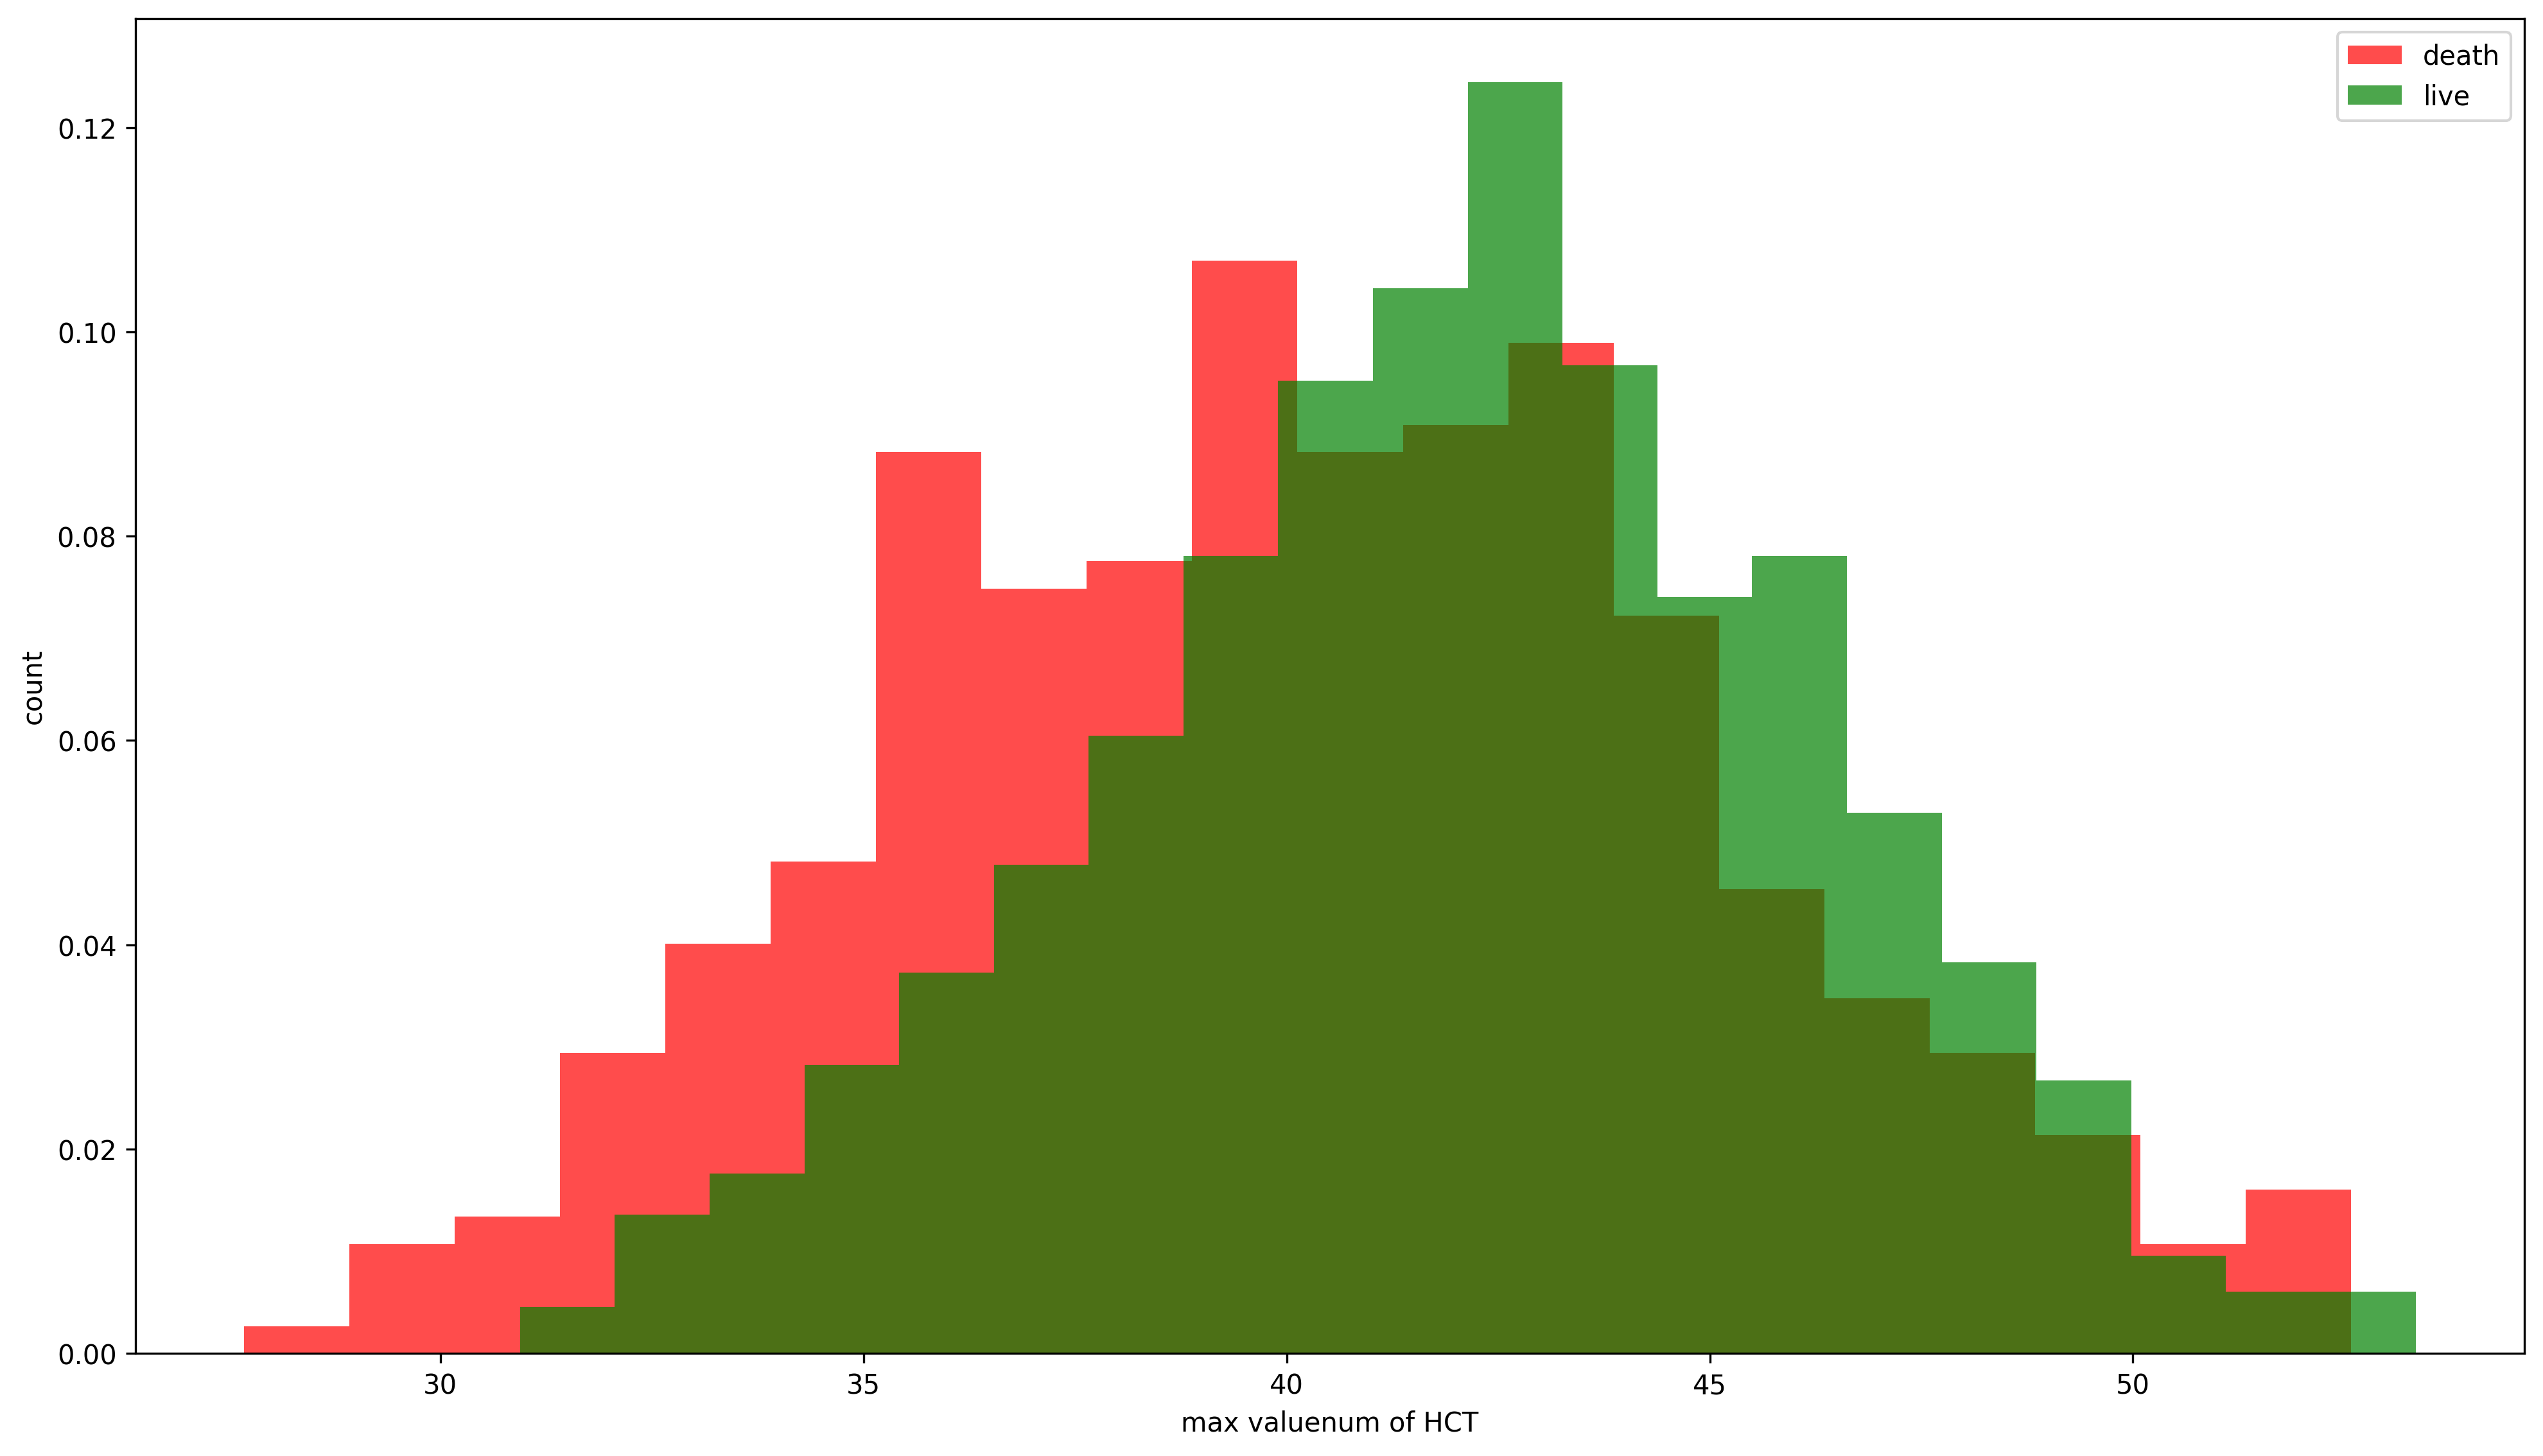

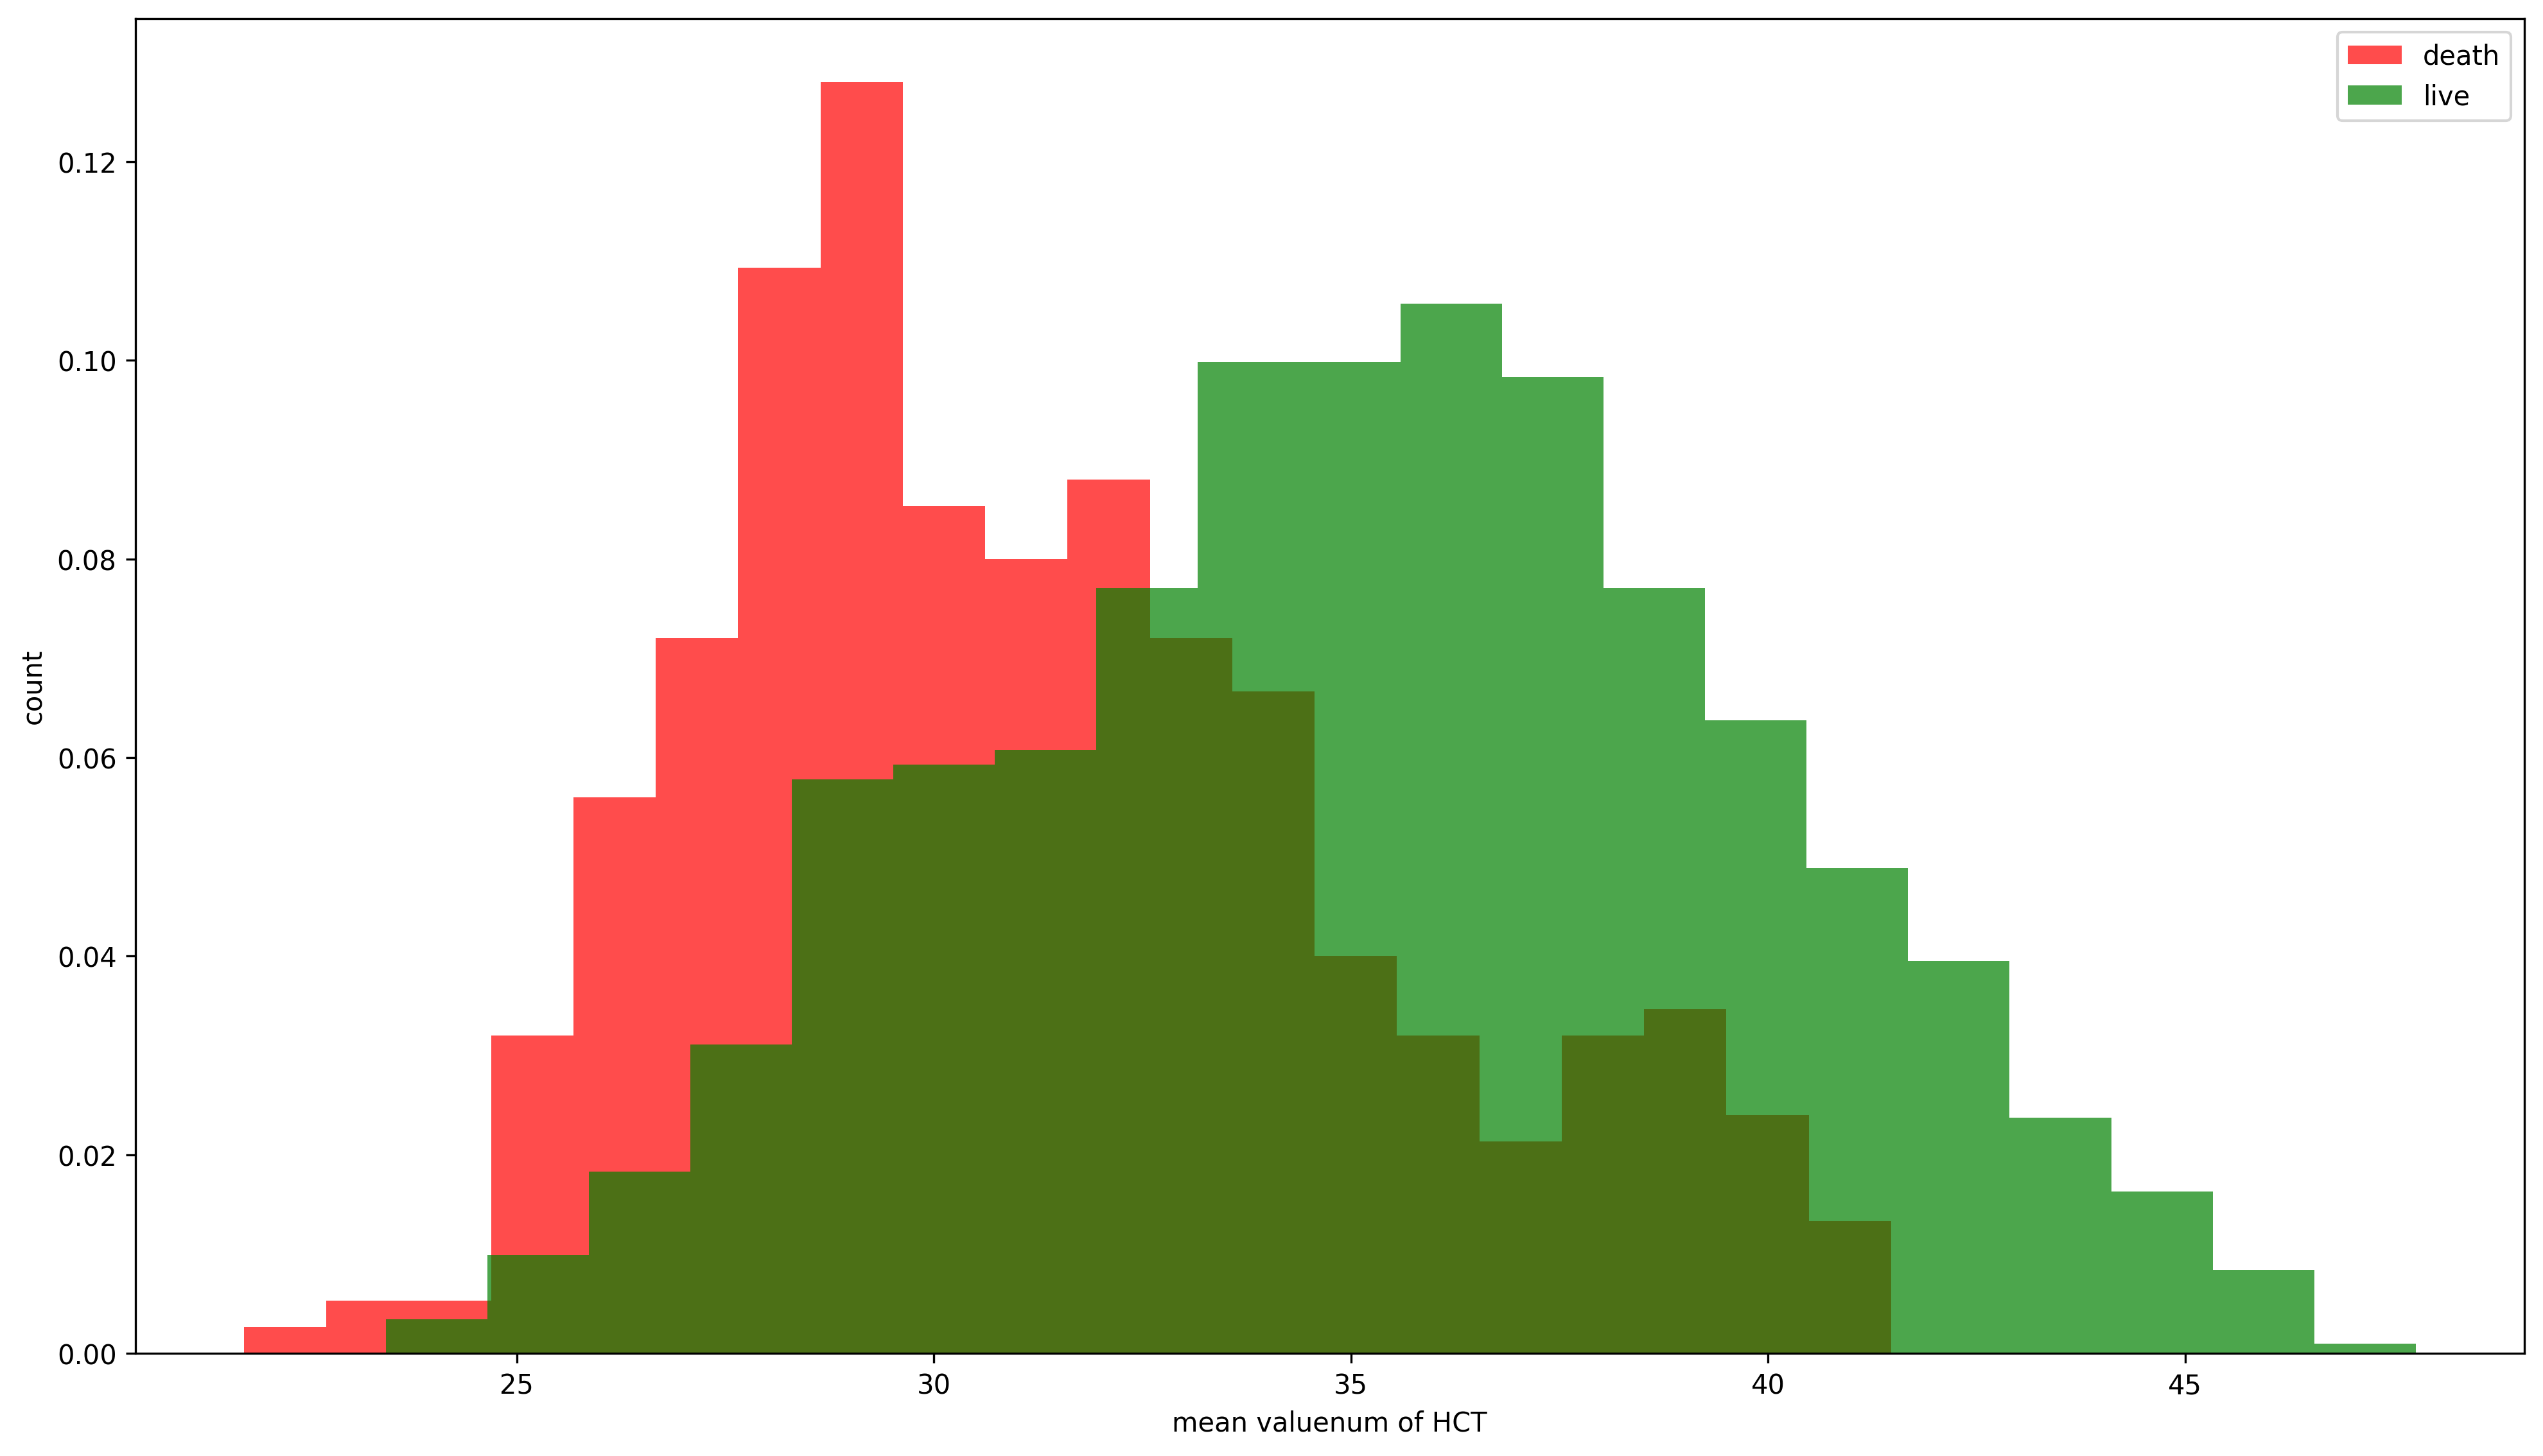

In [50]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of HCT')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# Lipase_Death.csv

In [51]:
df = pd.read_csv(os.path.join(FILE_DIR, 'Lipase_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  dod
0    10098672  2142-01-20 21:00:00  2142-01-21 00:05:00      10.0  NaN
1    10098672  2142-05-15 17:18:00  2142-05-15 17:55:00      13.0  NaN
2    10098672  2140-10-31 06:54:00  2140-10-31 16:53:00      32.0  NaN
3    10303503  2144-06-19 02:25:00  2144-06-19 03:15:00      42.0  NaN
4    10303503  2145-12-29 00:40:00  2145-12-29 01:28:00      24.0  NaN

In [52]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum                 dod
                  mean    min    max count
subject_id                                
10007174    106.500000  105.0  108.0     0
10018852     18.000000   18.0   18.0     0
10024331     34.428571   21.0   48.0    14
10027957     28.600000   25.0   35.0     0
10056223     42.800000   26.0   93.0     0

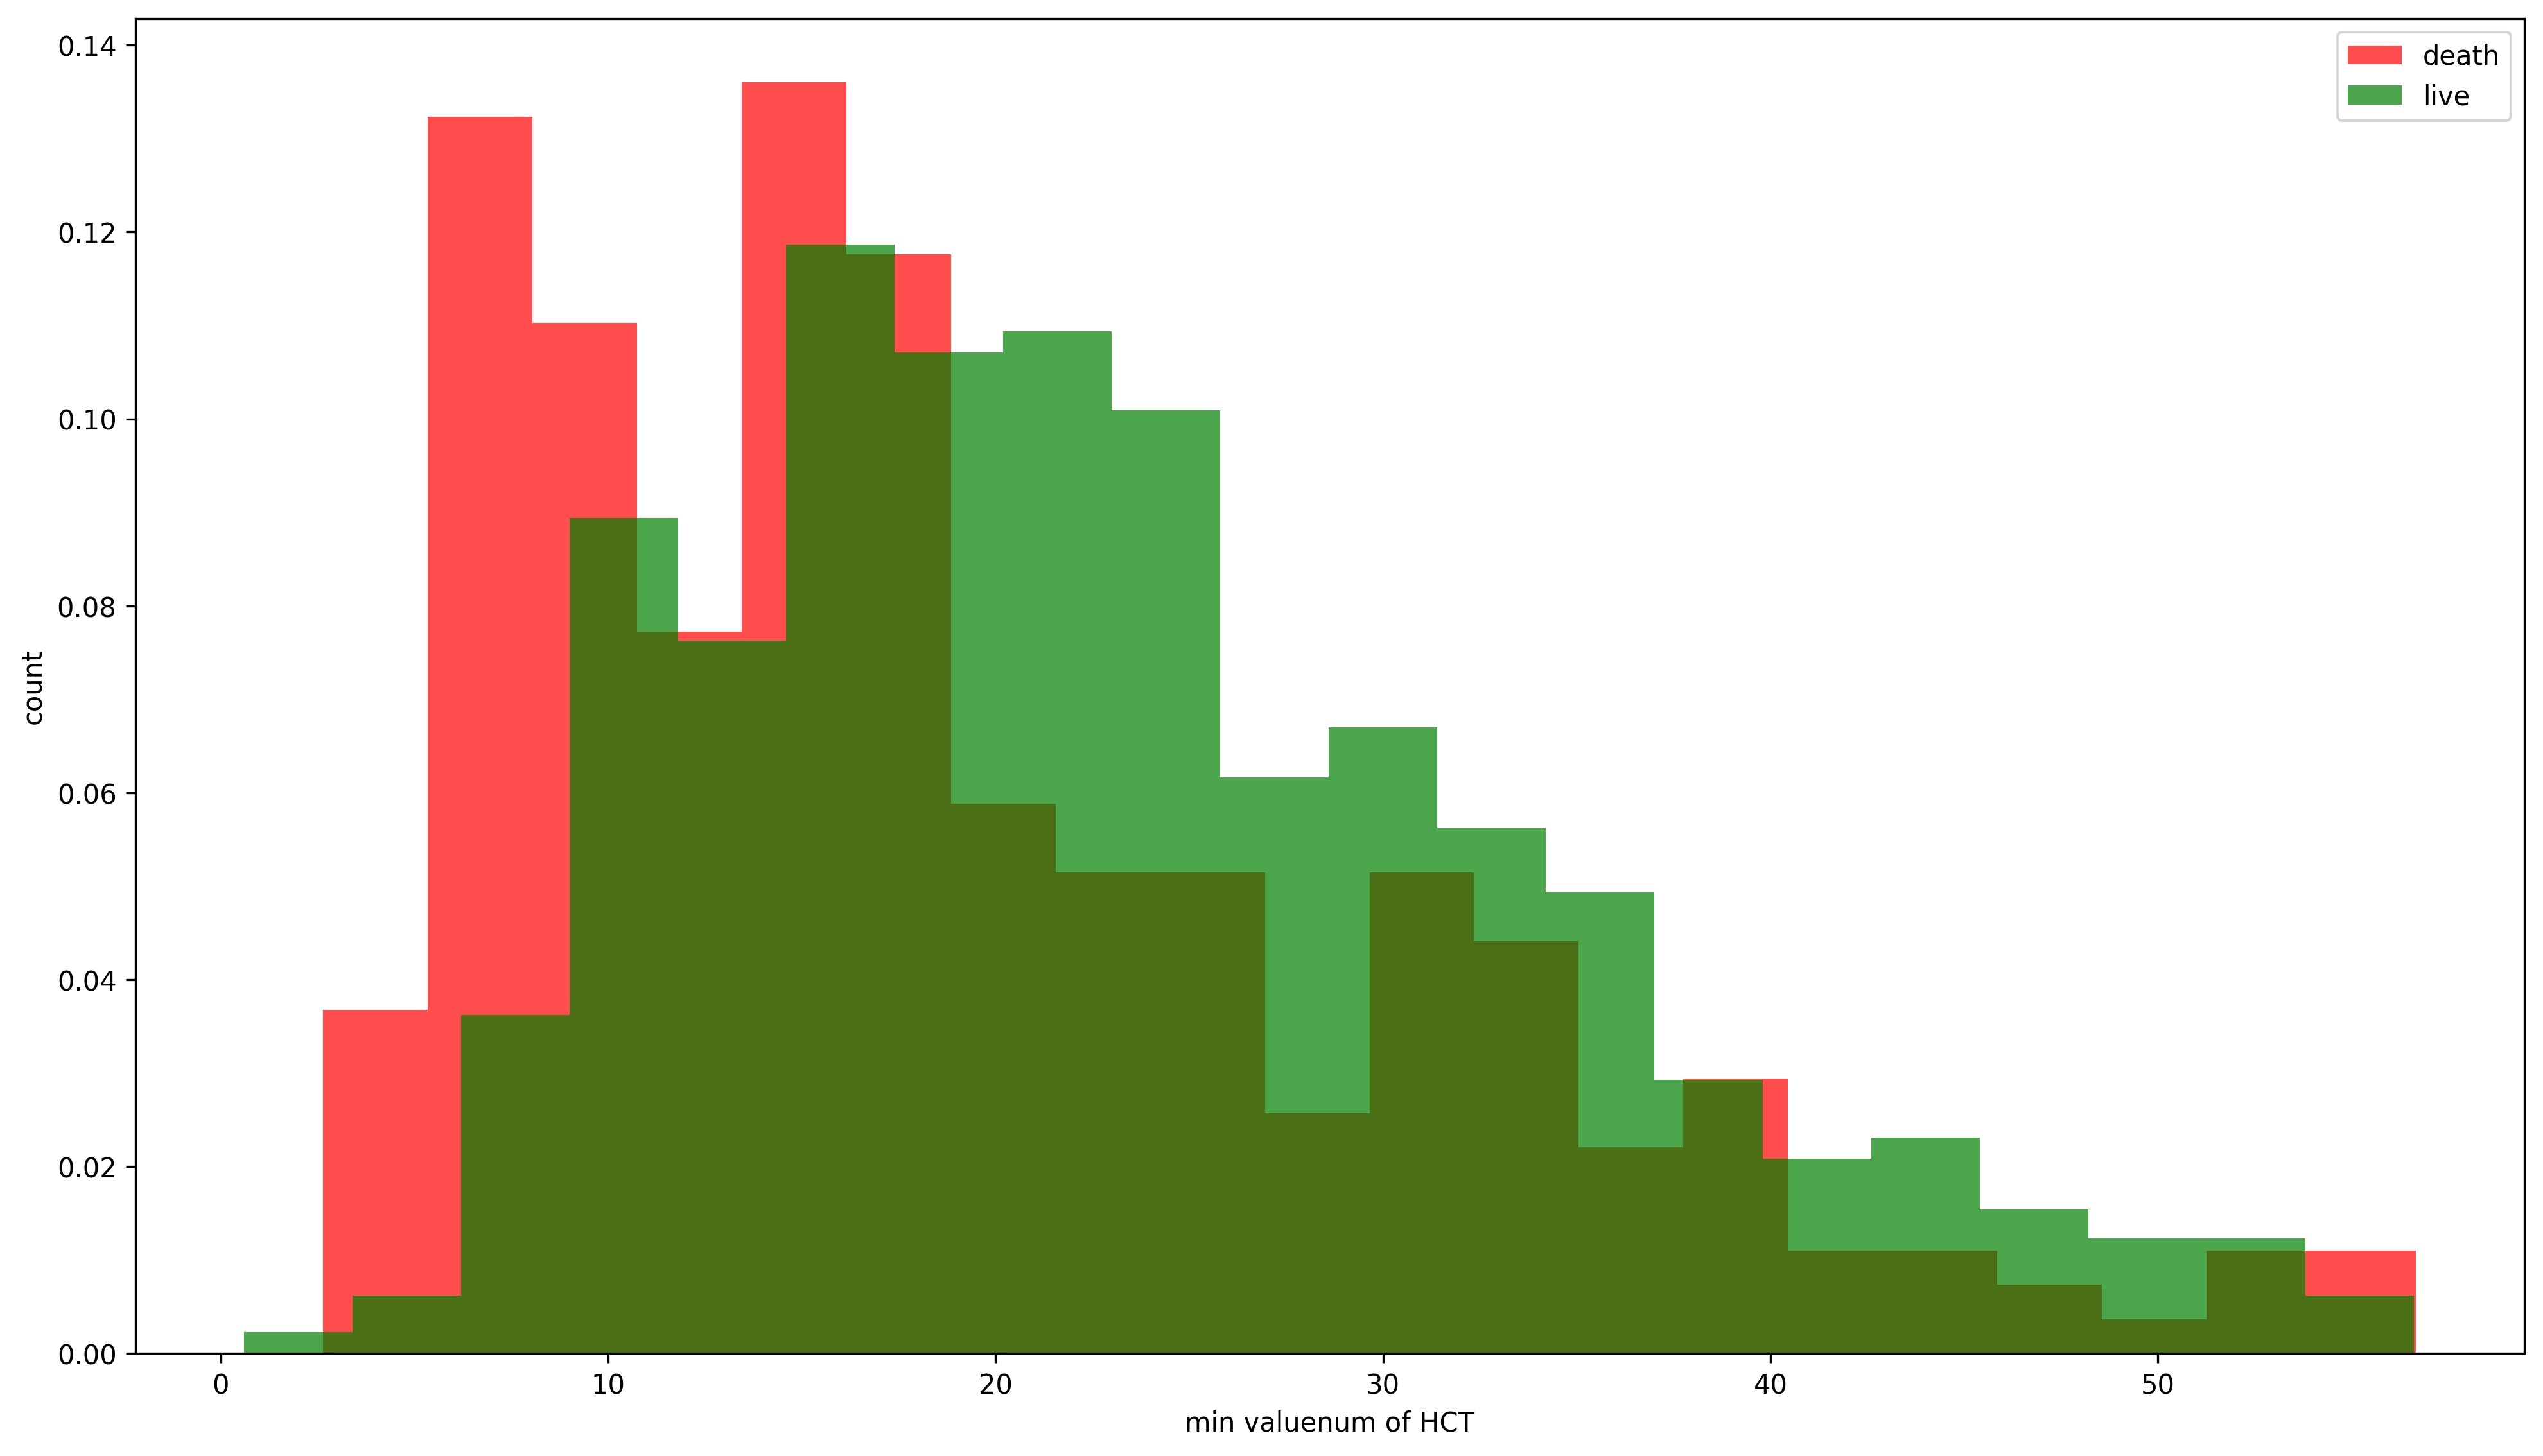

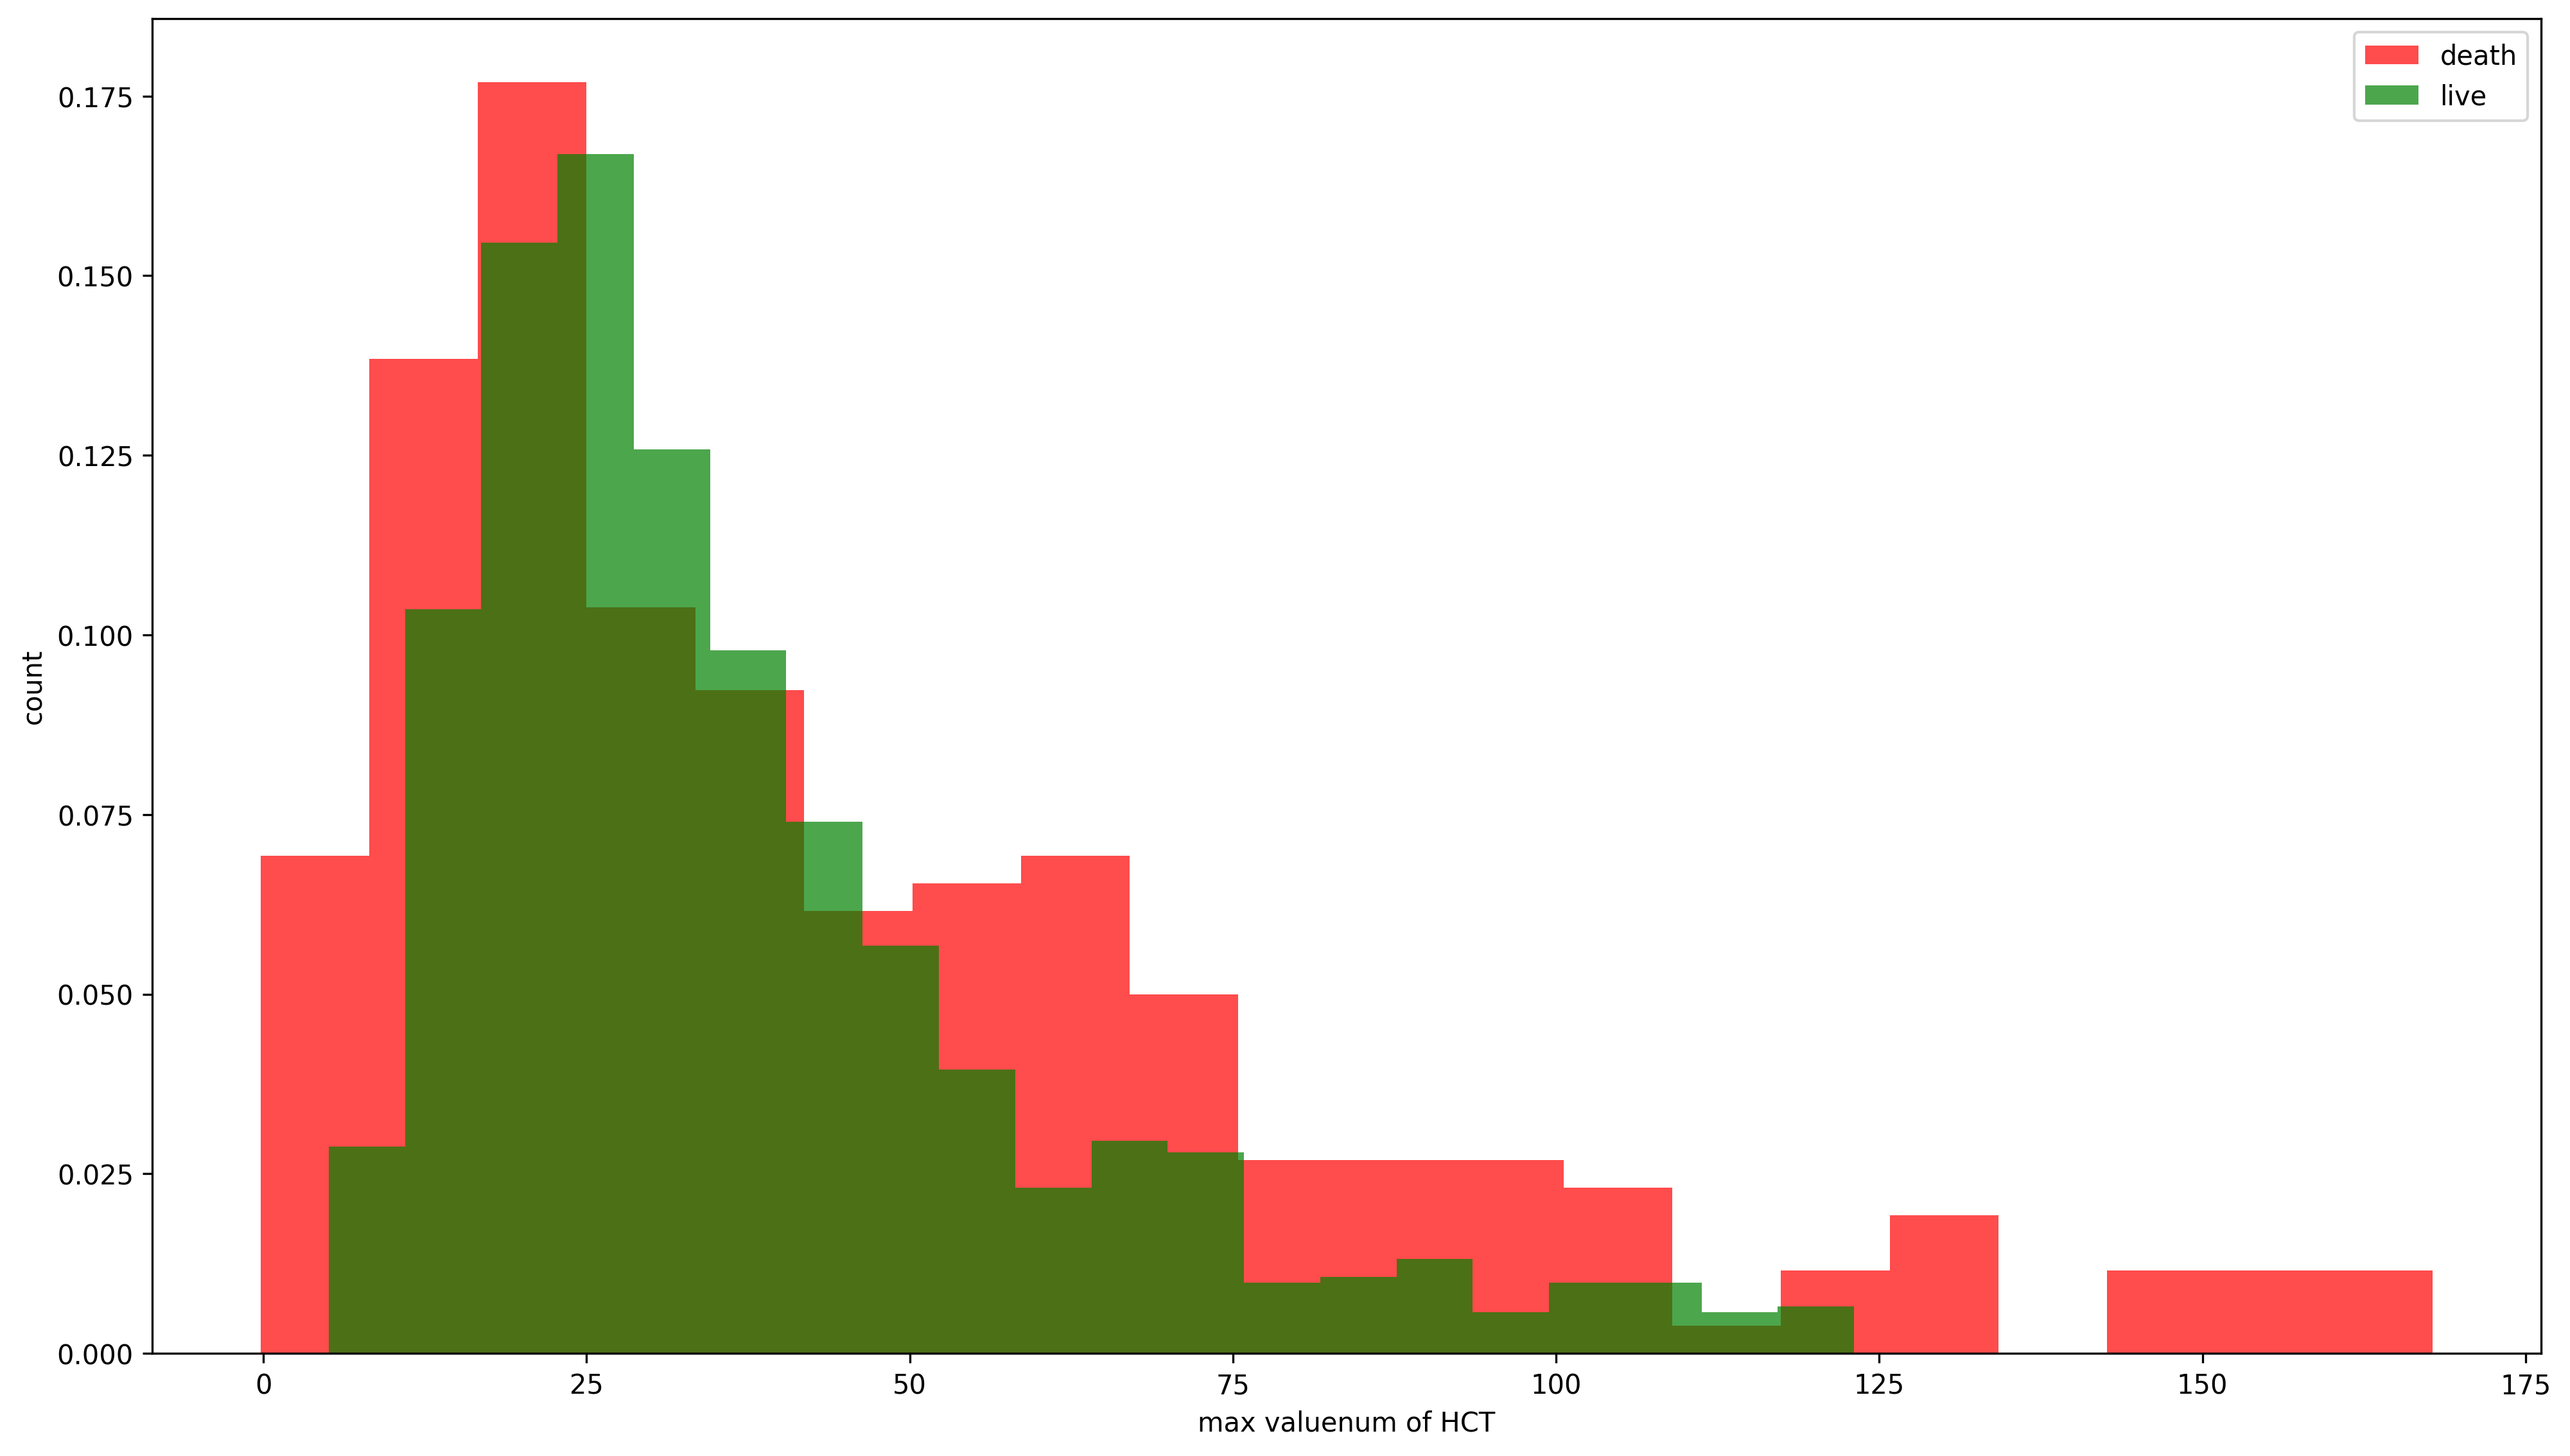

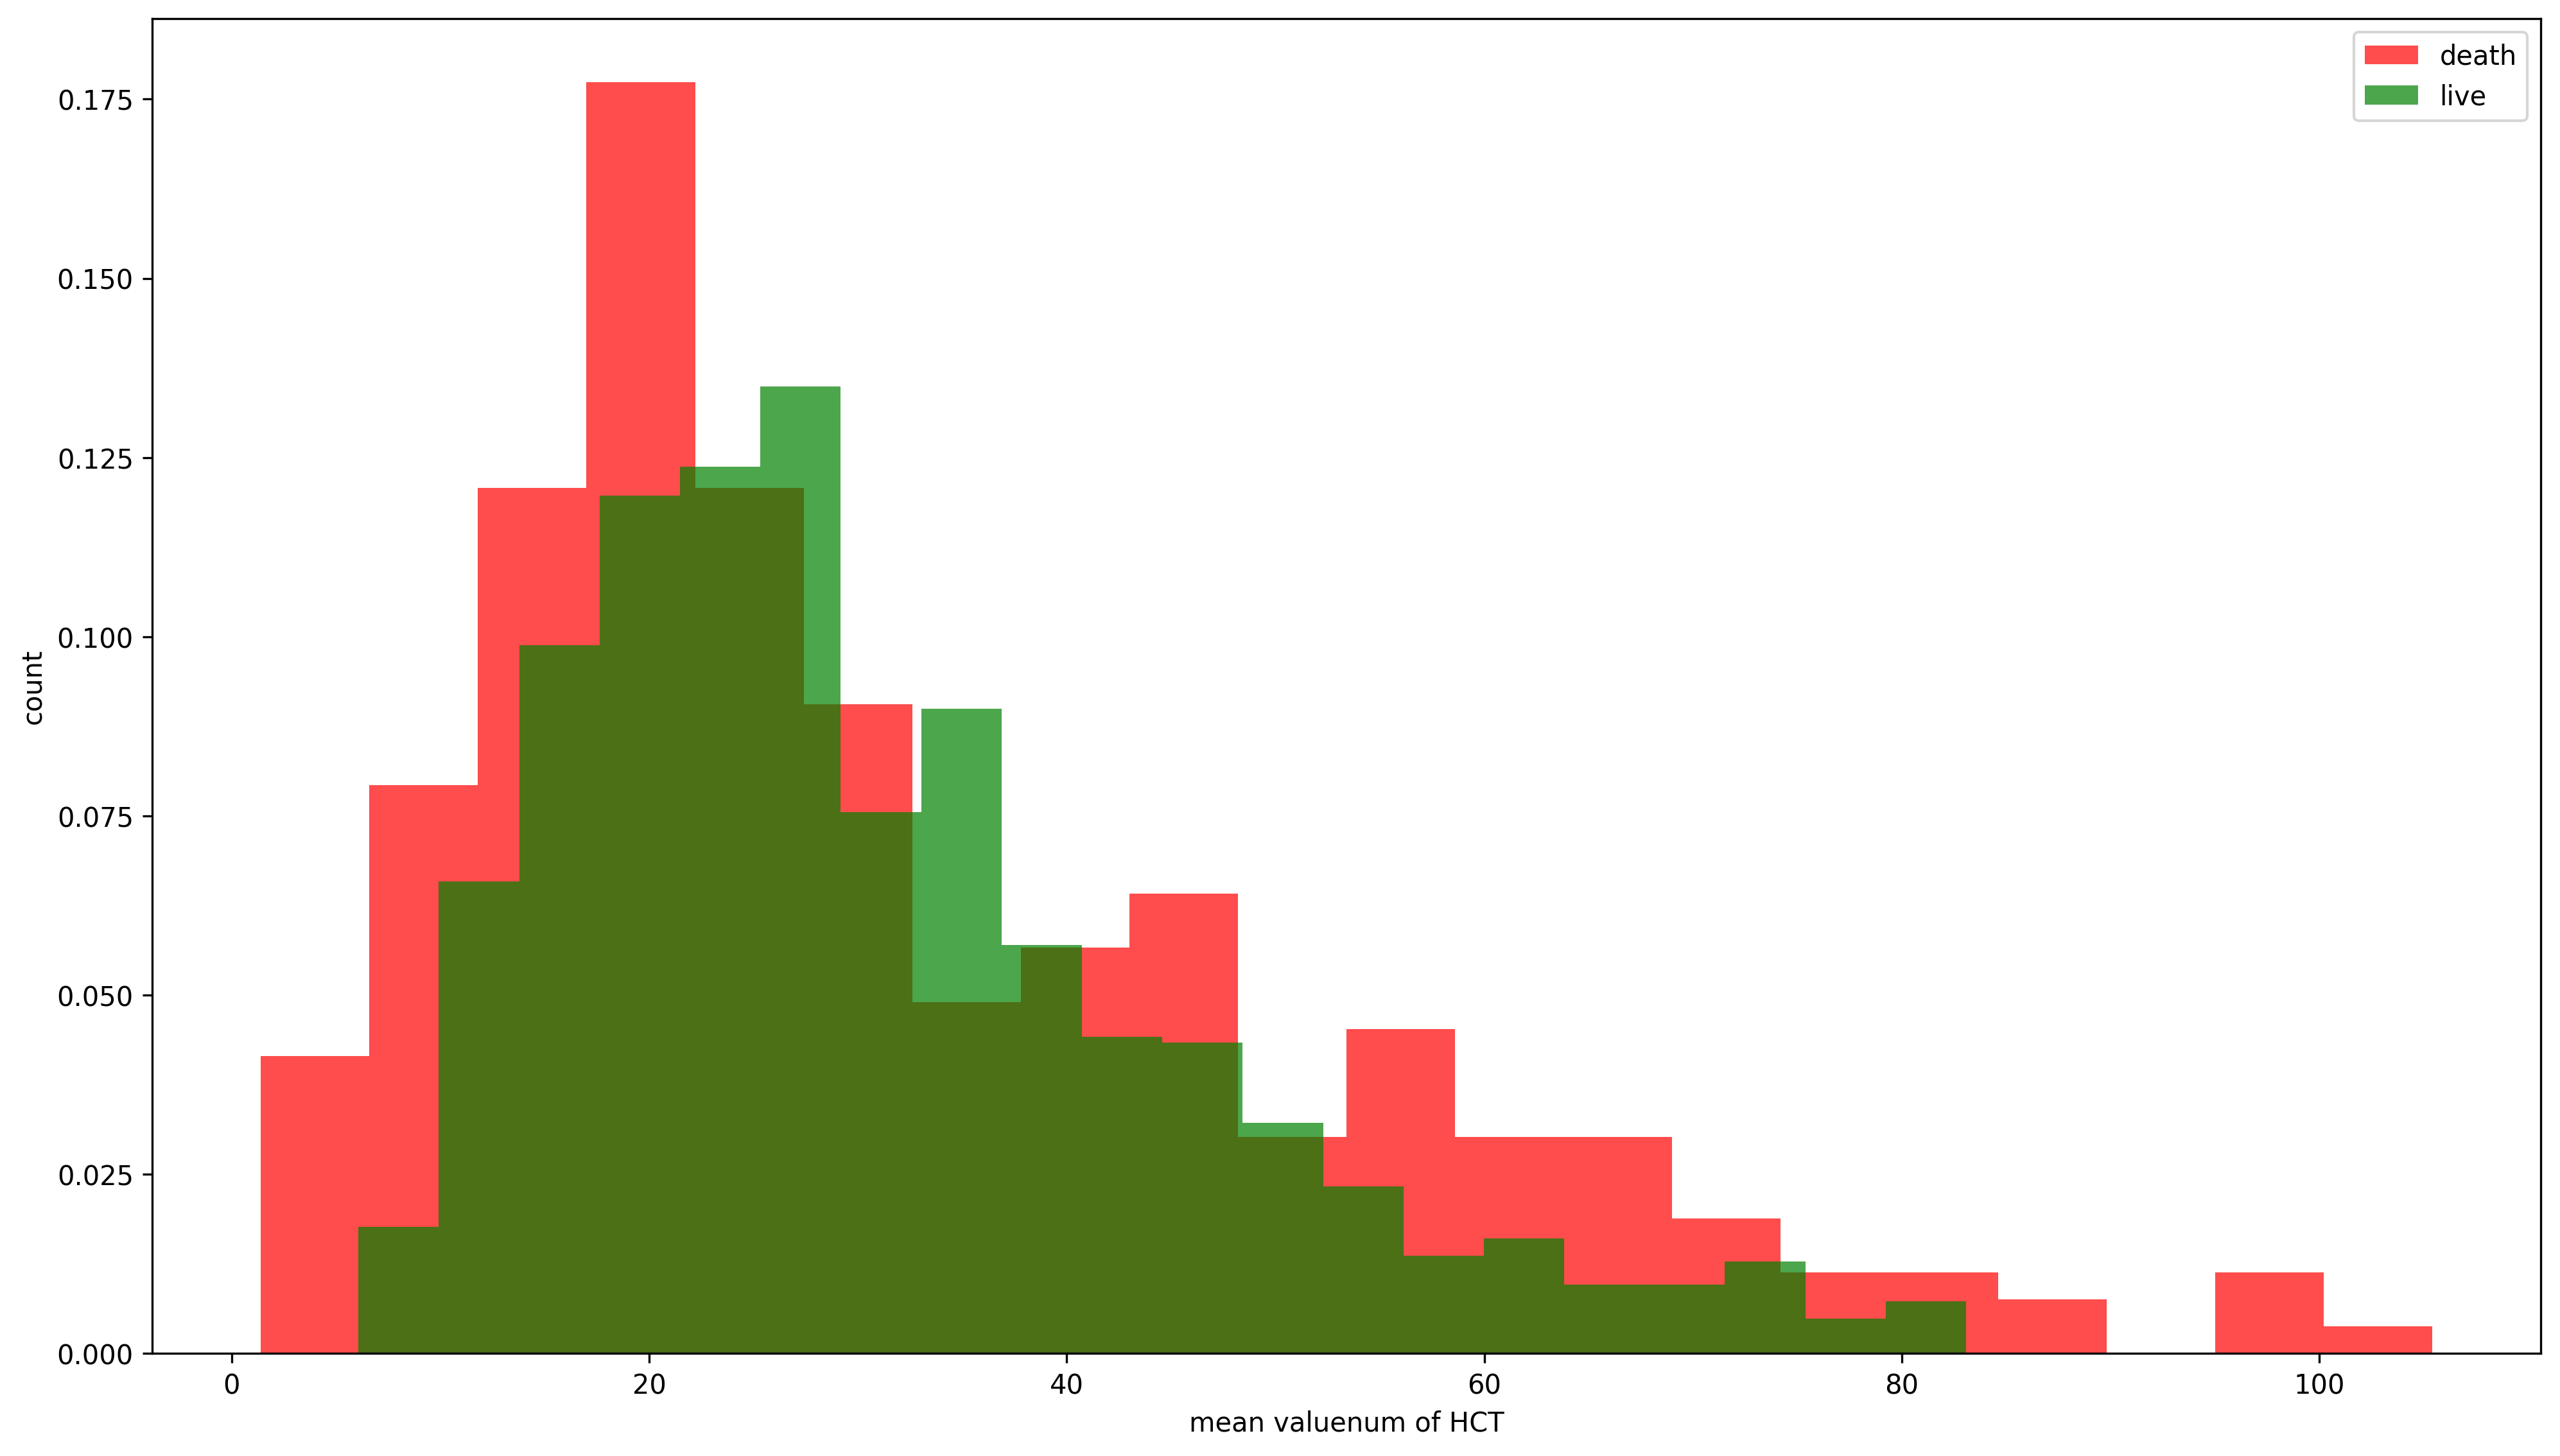

In [53]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of HCT')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

# PT_Death.csv

In [54]:
df = pd.read_csv(os.path.join(FILE_DIR, 'PT_Death.csv'))
df.head()

subject_id            charttime            storetime  valuenum  dod
0    10098672  2141-05-26 12:20:00  2141-05-26 14:04:00      11.4  NaN
1    10098672  2141-08-21 12:50:00  2141-08-21 13:26:00      10.8  NaN
2    10098672  2142-01-20 20:10:00  2142-01-20 20:40:00      14.1  NaN
3    10098672  2142-01-20 21:00:00  2142-01-20 21:36:00      13.2  NaN
4    10098672  2142-05-06 10:30:00  2142-05-06 11:30:00      11.3  NaN

In [55]:
stats = df.groupby('subject_id').agg({
    'valuenum': ['mean', 'min', 'max'],
    'dod': ['count']
})
stats.head()

valuenum               dod
                 mean   min   max count
subject_id                             
10001186    11.833333  10.5  12.5     0
10007174    33.142857  25.9  43.5     0
10018852    12.950000  11.7  14.2     0
10024331    17.055102  11.7  37.2    98
10025647    29.785417  13.3  93.5   192

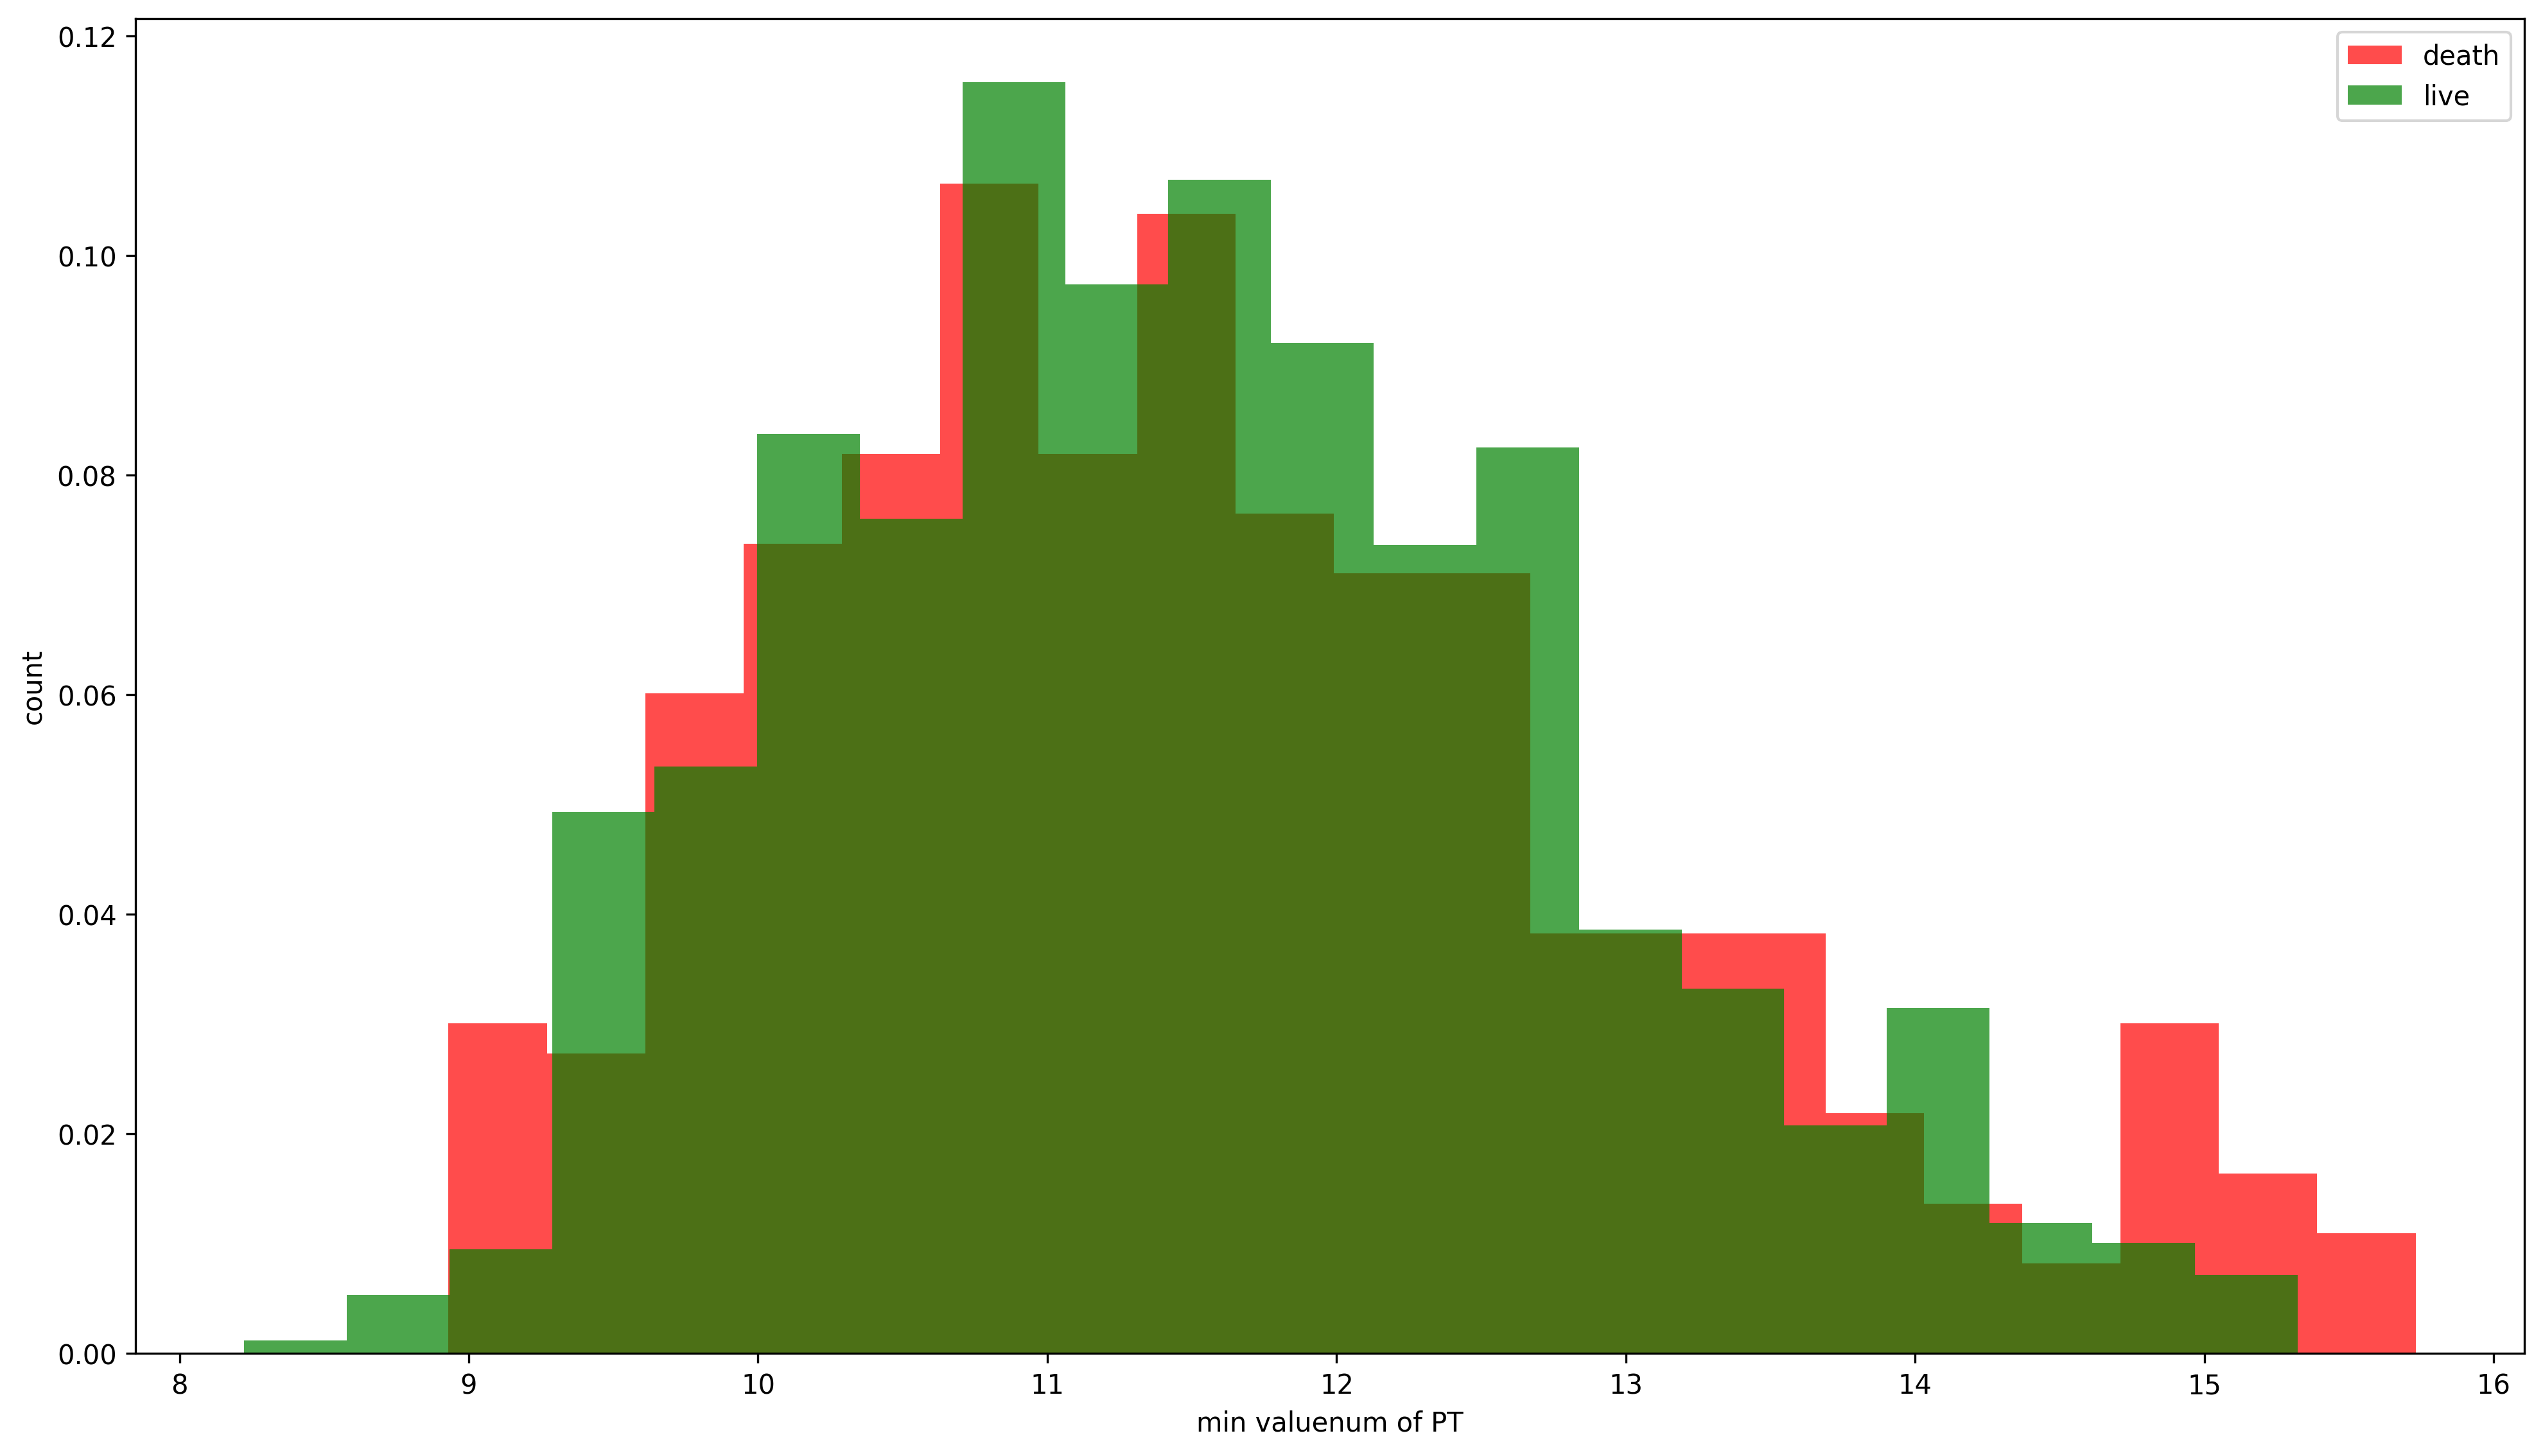

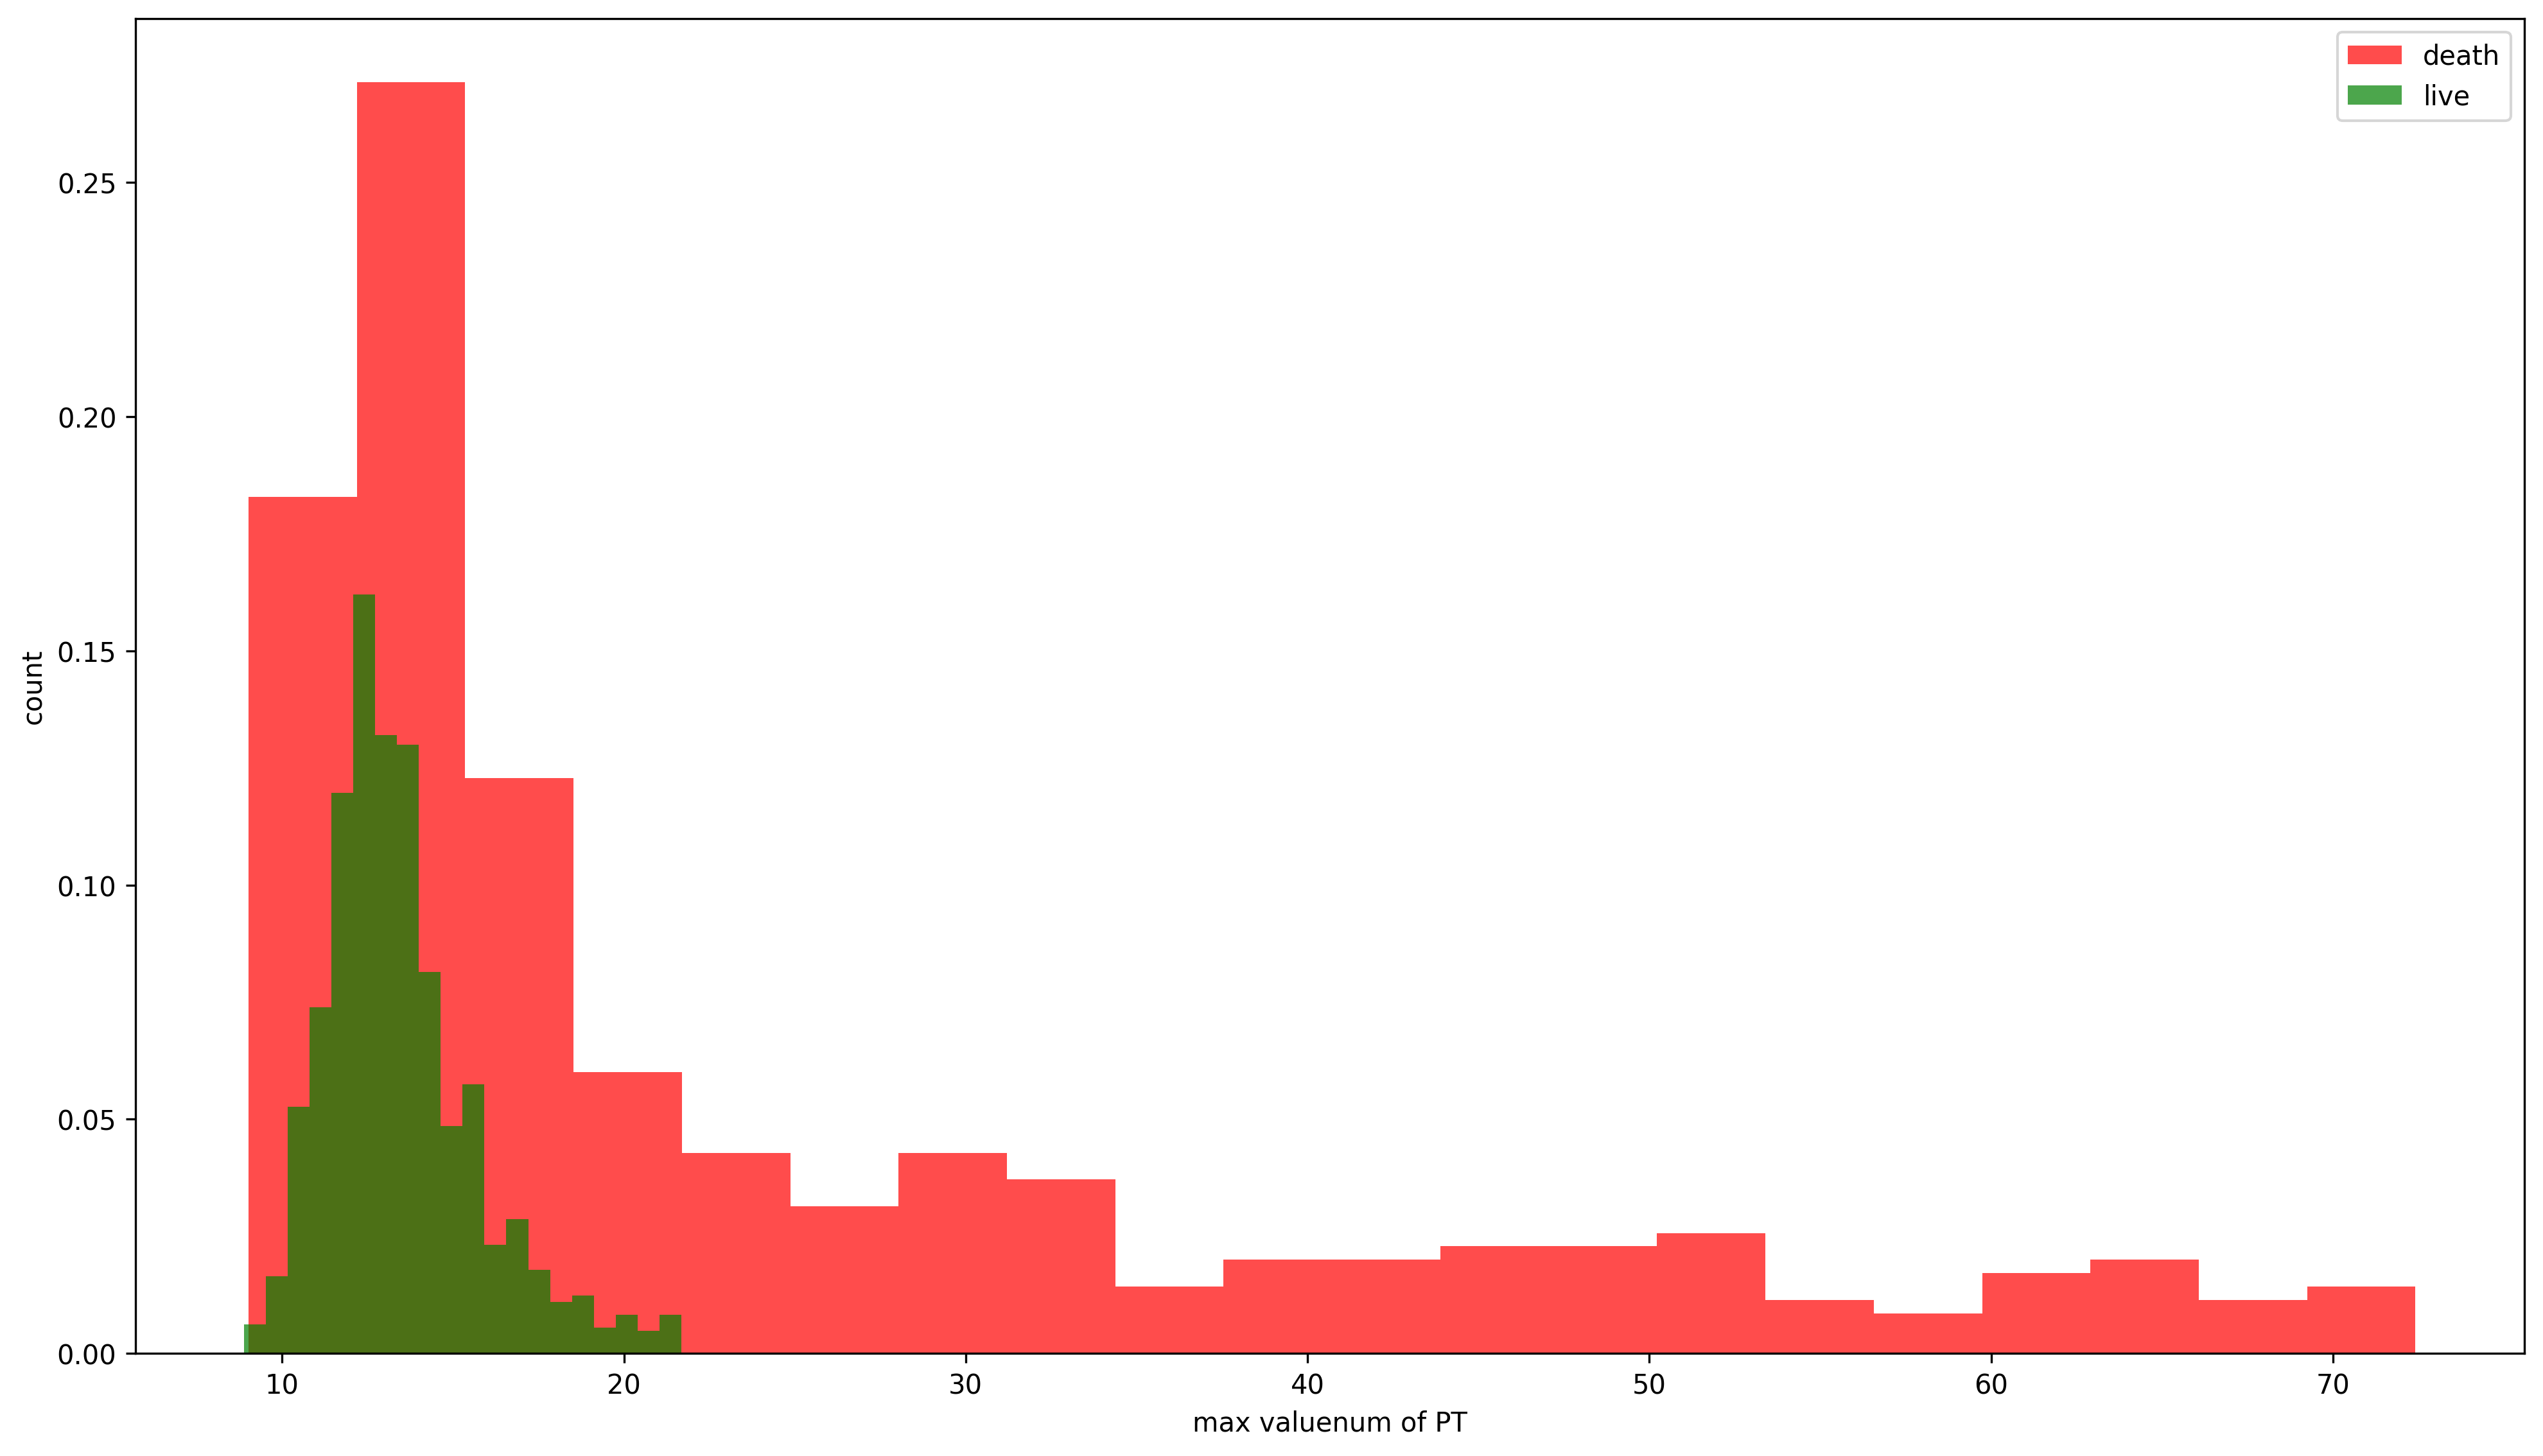

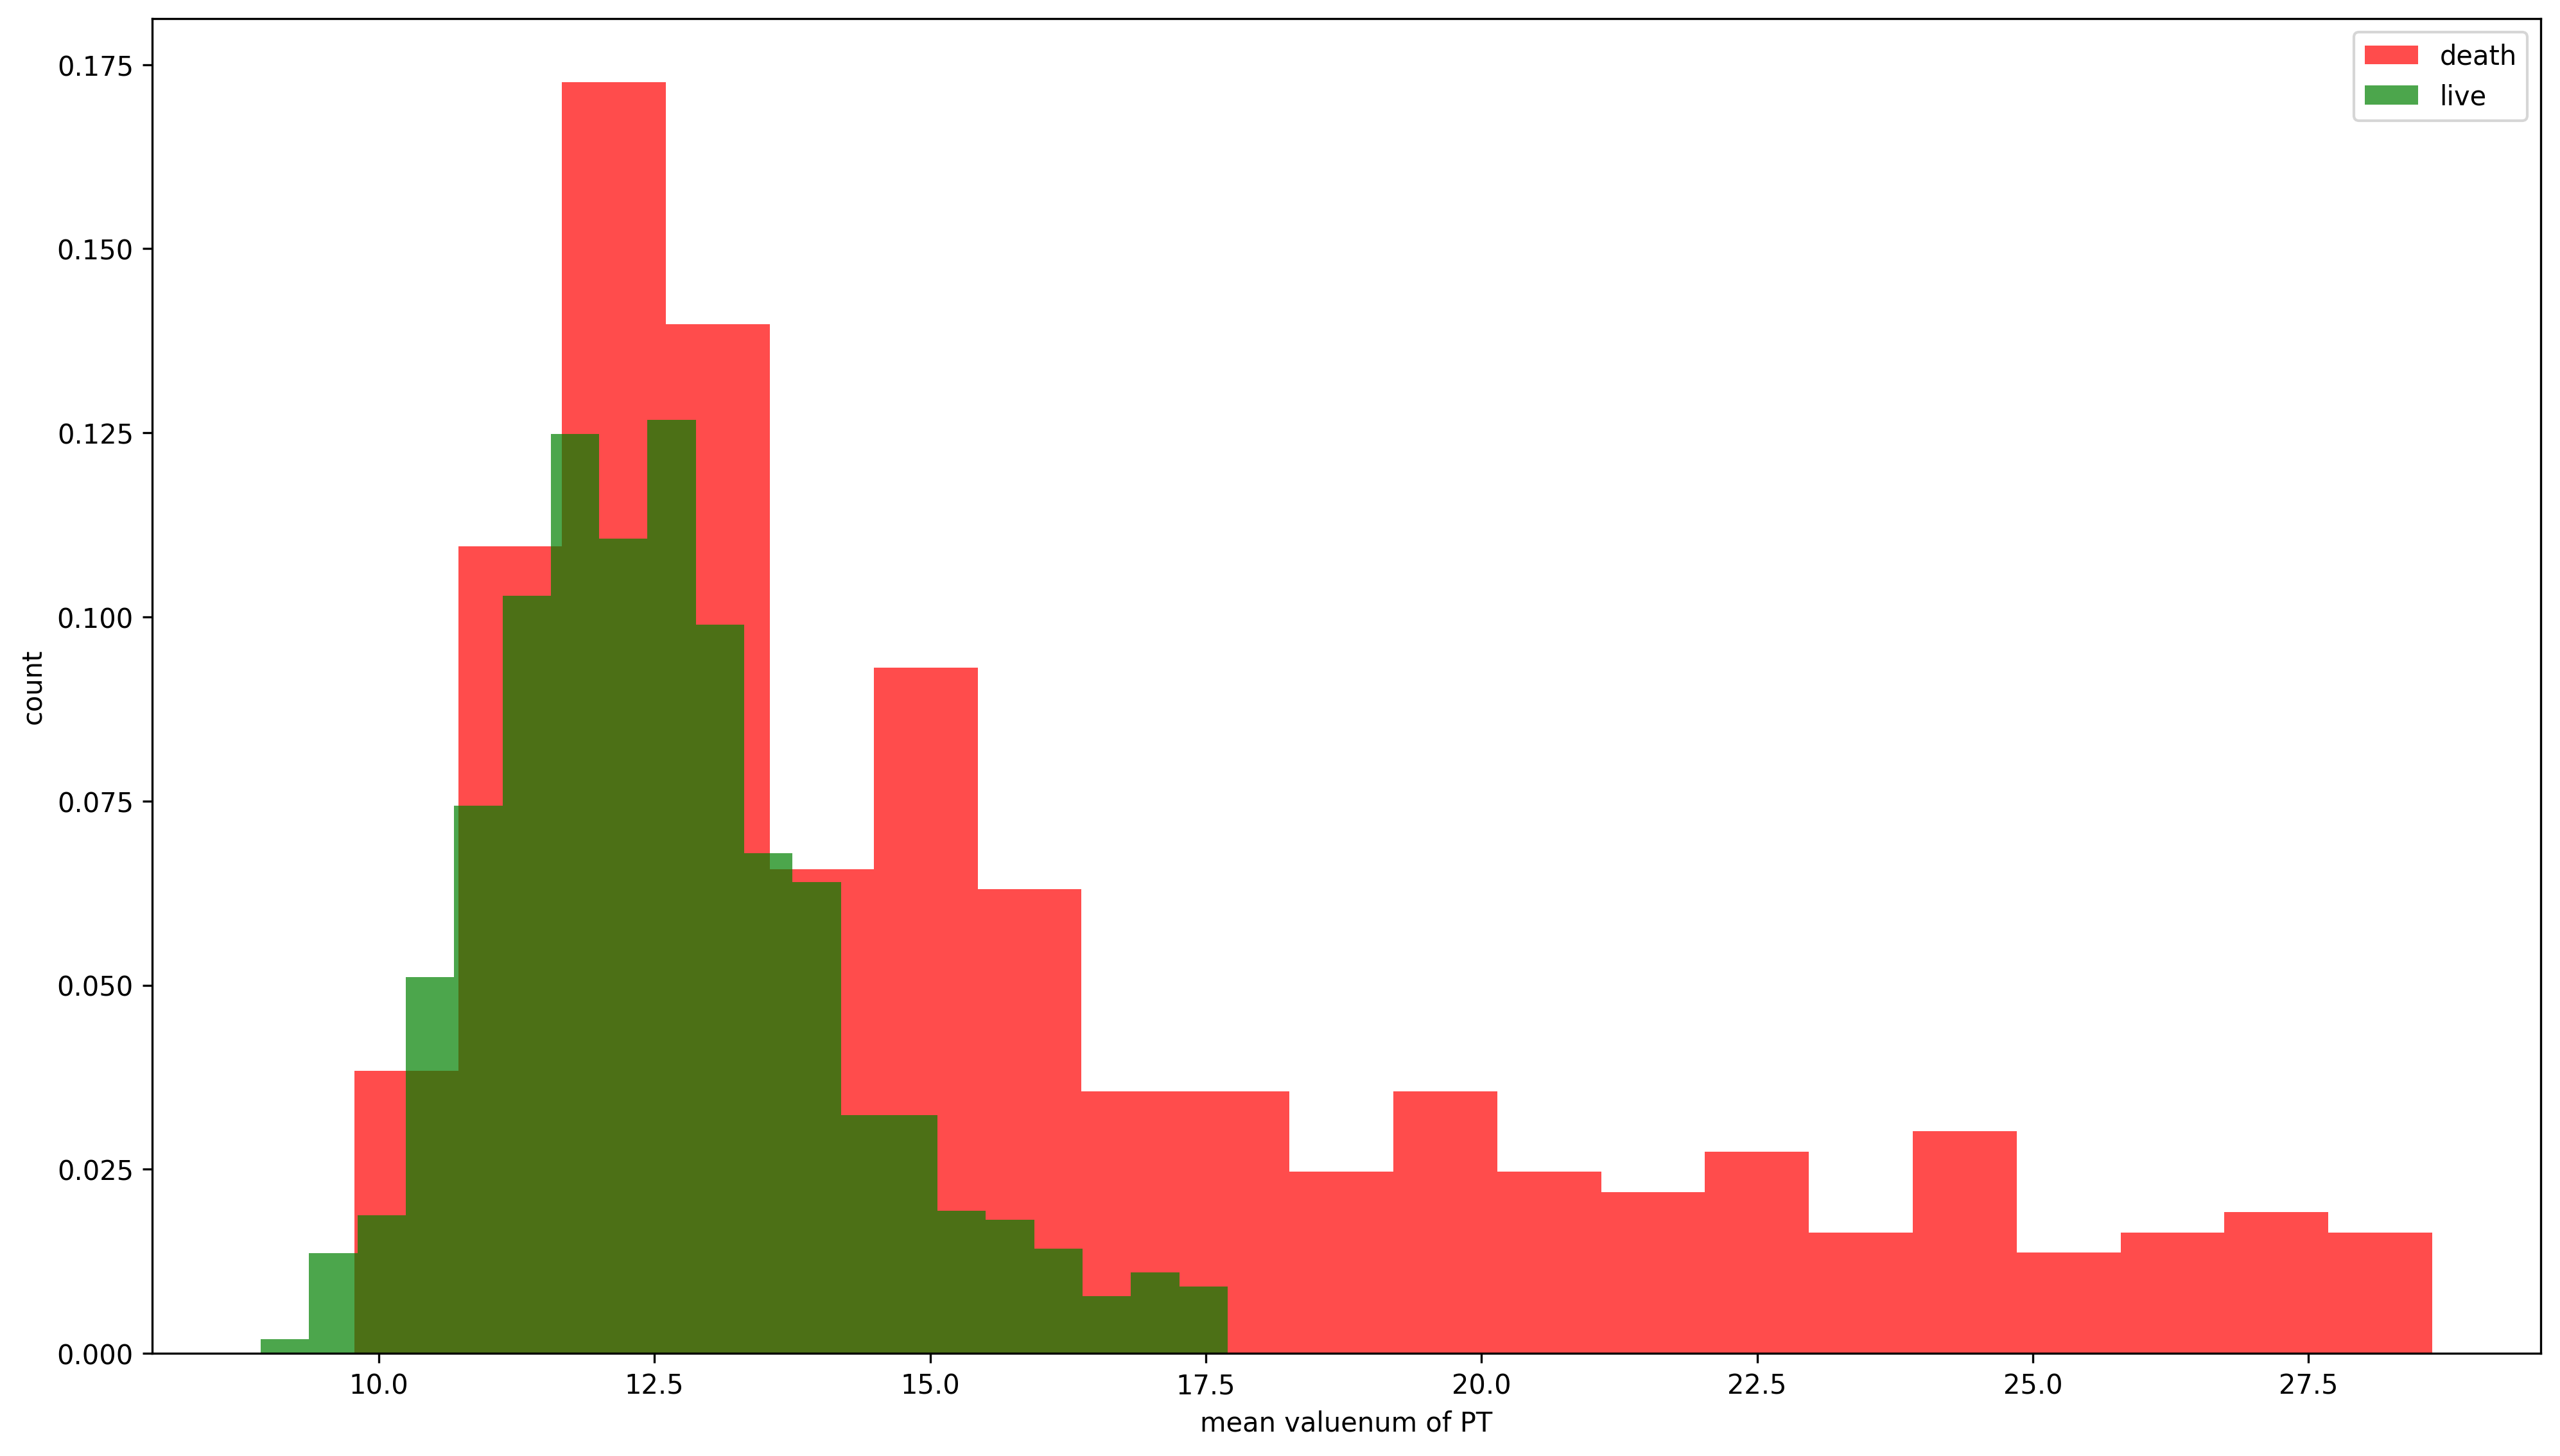

In [57]:
death = stats[stats['dod']['count'] > 0].dropna()
live = stats[stats['dod']['count'] == 0].dropna()



for _ in ['min', 'max', 'mean']:
    data = np.array(death['valuenum'][_])
    data2 = np.array(live['valuenum'][_])

    data = leave_percentile(data)
    data2 = leave_percentile(data2)

    hist, bins = np.histogram(data, bins=20)
    hist2, bins2 = np.histogram(data2, bins=20)

    plt.figure(figsize=(16, 9), dpi=300)
    plt.bar(bins[:-1], hist / len(data), width=np.diff(bins), label='death', alpha=0.7, color='red')
    plt.bar(bins2[:-1], hist2 / len(data2), width=np.diff(bins2), label='live', alpha=0.7, color='green')
    plt.xlabel(f'{_} valuenum of PT')
    plt.ylabel('count')
    plt.legend()
    plt.show()

    # break

In [1]:
import numpy as np

In [12]:
print('{:.2f}'.format(0.0022))

0.00
